# PREDIRE LE PRIX DU DIAMANT A PARTIR DES AUTRES CARACTERISTIQUES

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
diamond = sns.load_dataset("diamonds")

## OBJECTIF :
## III. Prédire le prix du diamant avec une précision de 97%

In [454]:
df = diamond.copy()
#print(df.shape)
#df.head()
df

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

### 1. EXPLORATORY DATA ANALYSIS

In [485]:
df.dtypes.value_counts()

float64     6
category    1
category    1
category    1
int64       1
Name: count, dtype: int64

In [916]:
df.describe(include='all')

carat    cut  color clarity         depth         table  \
count   53940.000000  53940  53940   53940  53940.000000  53940.000000   
unique           NaN      5      7       8           NaN           NaN   
top              NaN  Ideal      G     SI1           NaN           NaN   
freq             NaN  21551  11292   13065           NaN           NaN   
mean        0.797940    NaN    NaN     NaN     61.749405     57.457184   
std         0.474011    NaN    NaN     NaN      1.432621      2.234491   
min         0.200000    NaN    NaN     NaN     43.000000     43.000000   
25%         0.400000    NaN    NaN     NaN     61.000000     56.000000   
50%         0.700000    NaN    NaN     NaN     61.800000     57.000000   
75%         1.040000    NaN    NaN     NaN     62.500000     59.000000   
max         5.010000    NaN    NaN     NaN     79.000000     95.000000   

               price             x             y             z  
count   53940.000000  53940.000000  53940.000000  53940.000000  
unique           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN  
mean     3932.799722      5.731157      5.734526      3.538734  
std      3989.439738      1.121761      1.142135      0.705699  
min       326.000000      0.000000      0.000000      0.000000  
25%       950.000000      4.710000      4.720000      2.910000  
50%      2401.000000      5.700000      5.710000      3.530000  
75%      5324.250000      6.540000      6.540000      4.040000  
max     18823.000000     10.740000     58.900000     31.800000

Présence des valeurs aberrantes telles que les valeurs de x, y et z nulles. Ce qui n'est pas possible dans la vie réelle.

In [917]:
print((data["x"]==0).value_counts())
print((data["y"]==0).value_counts())
print((data["z"]==0).value_counts())

x
False    53932
True         8
Name: count, dtype: int64
y
False    53933
True         7
Name: count, dtype: int64
z
False    53920
True        20
Name: count, dtype: int64


In [487]:
(df.isna().sum()/df.shape[0]*100).sort_values(ascending = True)

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

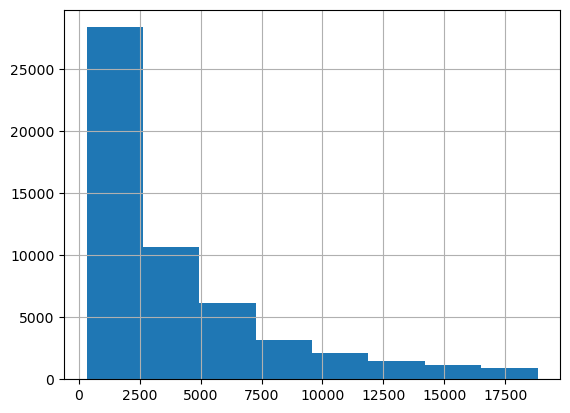

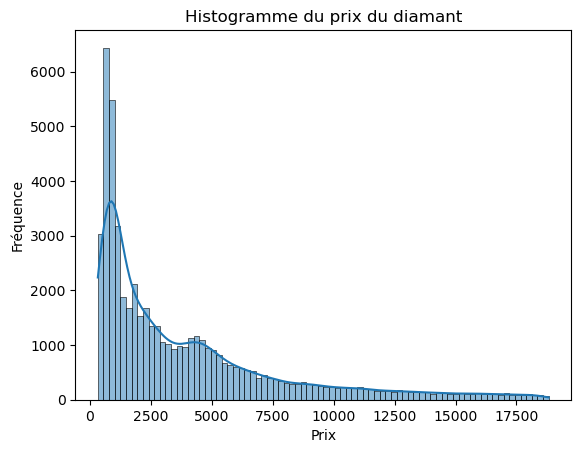

<Axes: >

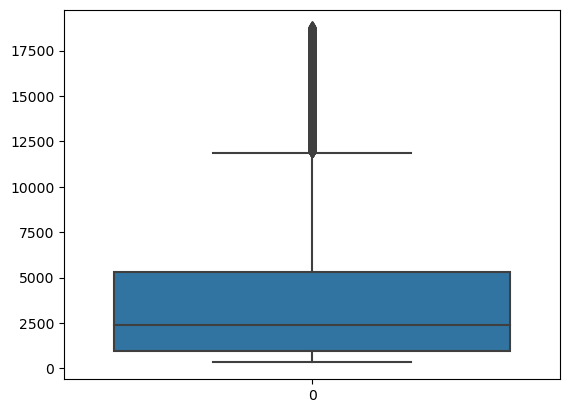

In [488]:
# Histogramme avec pandas
df["price"].hist(bins = 8)
plt.show()

#Choix d'une variable
price = df["price"]

# Histogramme avec seaborn
sns.histplot(x=price, kde=True)
plt.title("Histogramme du prix du diamant")
plt.xlabel("Prix")
plt.ylabel("Fréquence")
plt.show()

#boxplot avec seaborn
sns.boxplot(df["price"])

La variable 'price' **n'a pas une distribution normale** et il y'a **beaucoup de valeurs extrêmes.**

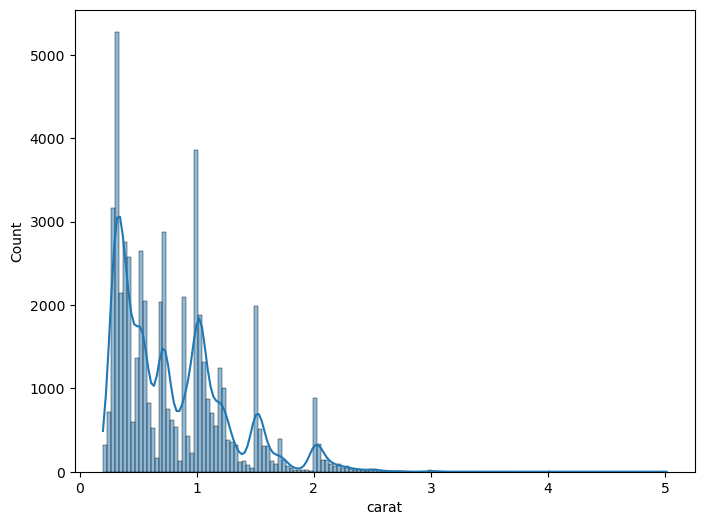

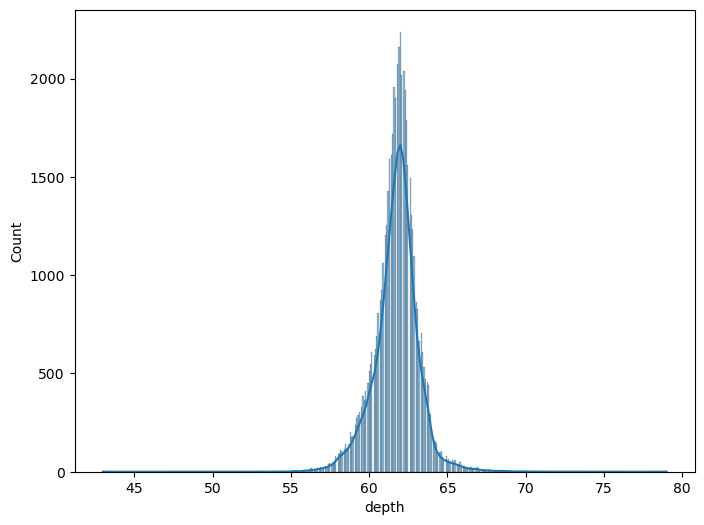

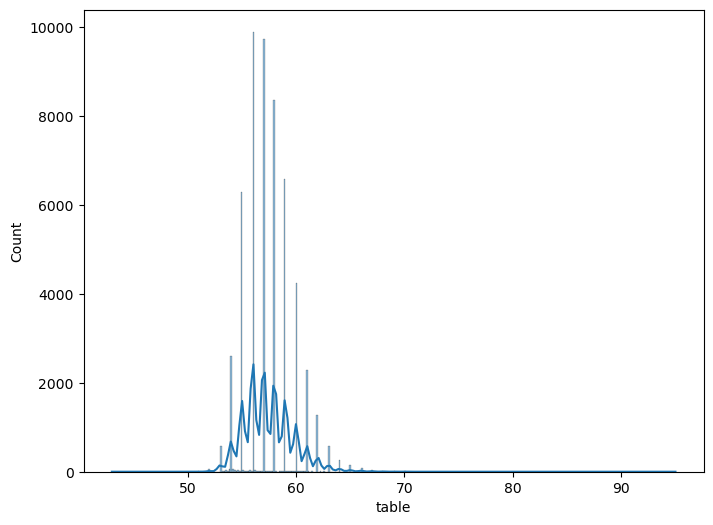

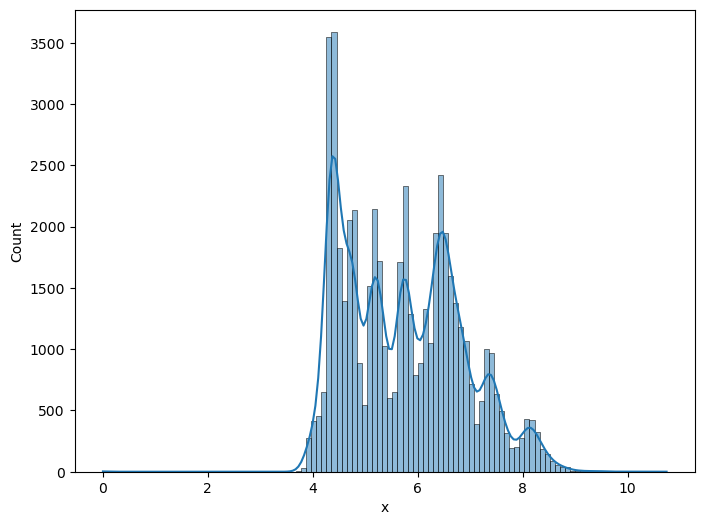

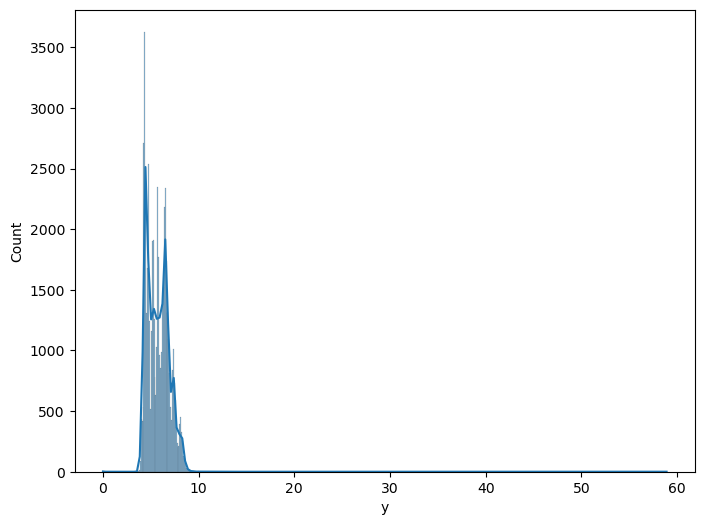

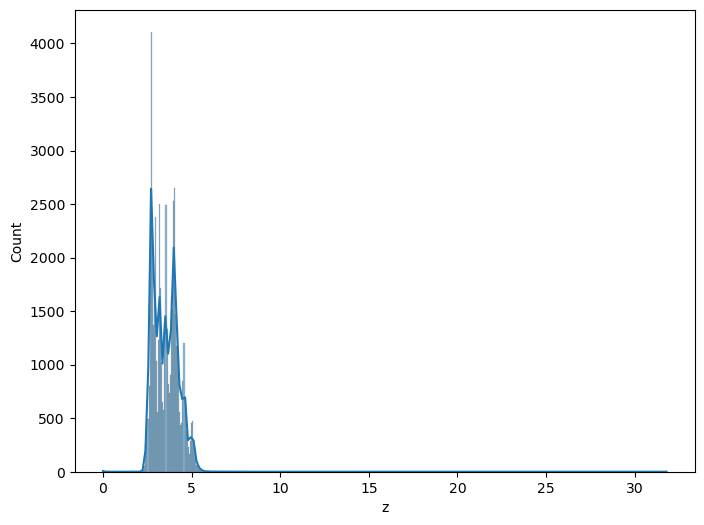

In [489]:
for col in df.select_dtypes('float') :
    #print(col)
    plt.figure(figsize=(8,6))
    if (col != 'price'):
        sns.histplot(df[col], kde=True)      # pour afficher la distribution des variables

- **carat :** il y a beaucoup plus de diamants de faible masse (75% inférieure à 1 carat). Il va falloir en tenir compte
- **x, y, z :** les diamants ont des formes qui ne varient pas beaucoupe (std : proche de 1) avec quelques valeurs aberrantes
- **depht :** je dois regarder s'il y a une véritable corrélation entre cette feature et la targuet
- **table :** même conclusions que pour la feature "depht"

In [522]:
for col in data.select_dtypes('category') :
    print(f'{col} ---------------> {df[col].cat.categories}')

cut ---------------> Index(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype='object')
color ---------------> Index(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='object')
clarity ---------------> Index(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'], dtype='object')


         cut  count
0      Ideal  21551
1    Premium  13791
2  Very Good  12082
3       Good   4906
4       Fair   1610


<Figure size 640x480 with 0 Axes>

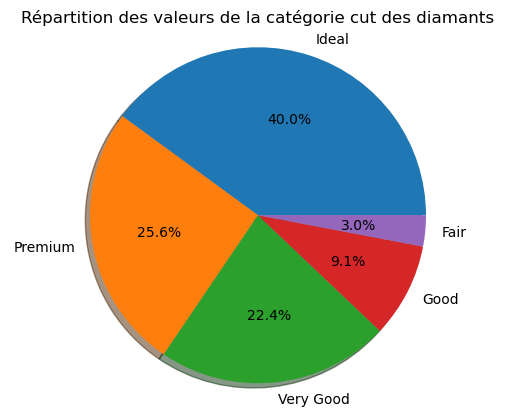

  color  count
0     G  11292
1     E   9797
2     F   9542
3     H   8304
4     D   6775
5     I   5422
6     J   2808


<Figure size 640x480 with 0 Axes>

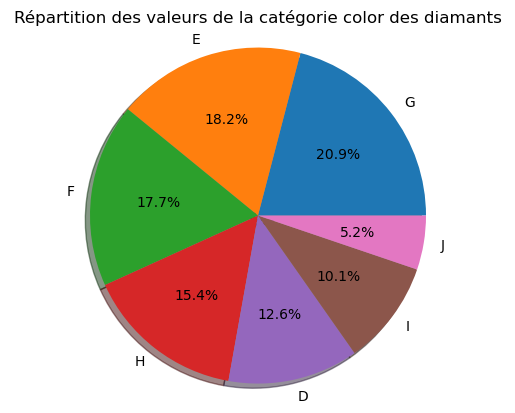

  clarity  count
0     SI1  13065
1     VS2  12258
2     SI2   9194
3     VS1   8171
4    VVS2   5066
5    VVS1   3655
6      IF   1790
7      I1    741


<Figure size 640x480 with 0 Axes>

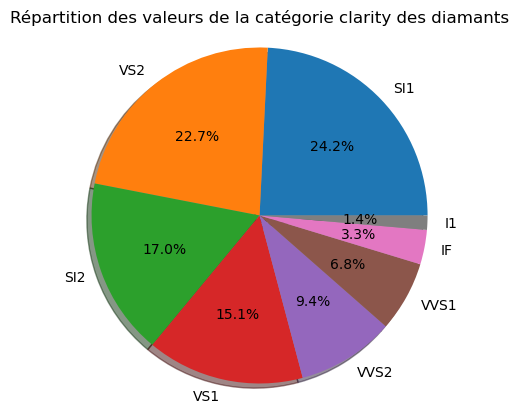

In [500]:
for col in data.select_dtypes('category') :
    plt.figure()
    #data[col].value_counts().plot.pie()
    #Nombre de valeurs par modalité
    valeur = df[col].value_counts().reset_index()
    print(valeur)

    #visualisation sous matplotlib

    fig1, ax1 = plt.subplots()
    ax1.pie(valeur["count"], labels=valeur[col],  autopct='%1.1f%%',
            shadow=True, startangle=0)
    ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'Répartition des valeurs de la catégorie {col} des diamants')
    plt.show()

Les variables catégorielles sont inégalement réparties. Il y a beaucoup moins de diamants de mauvaise qualité. il va falloir régarder si cela affecte le prix

C:\Users\SOP TELECOM\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


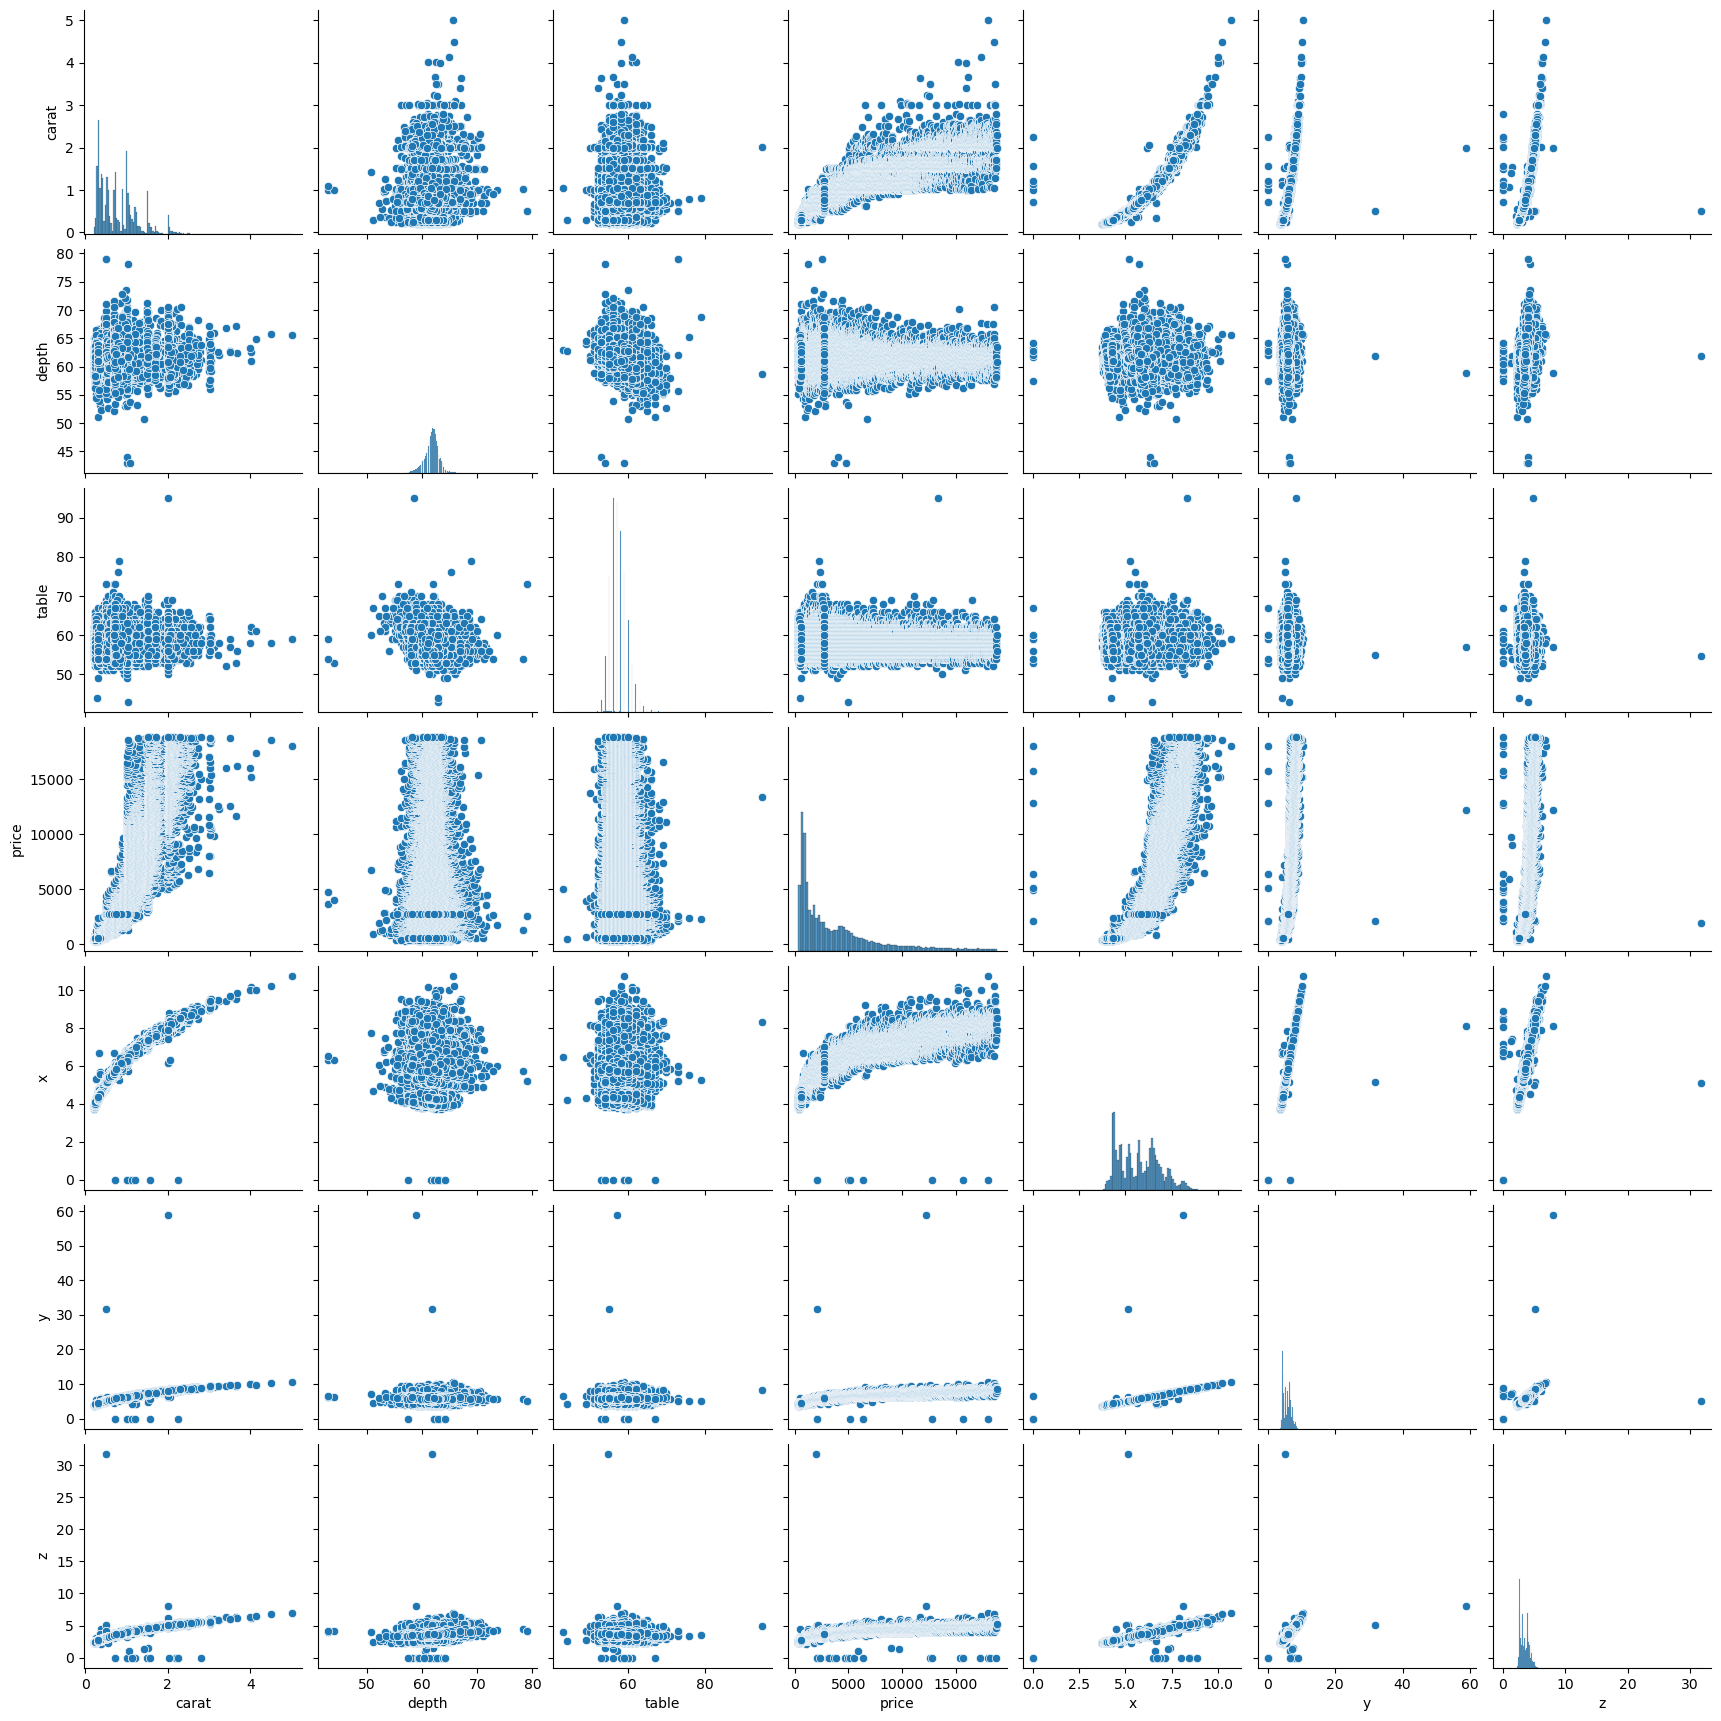

In [502]:
sns.pairplot(df)

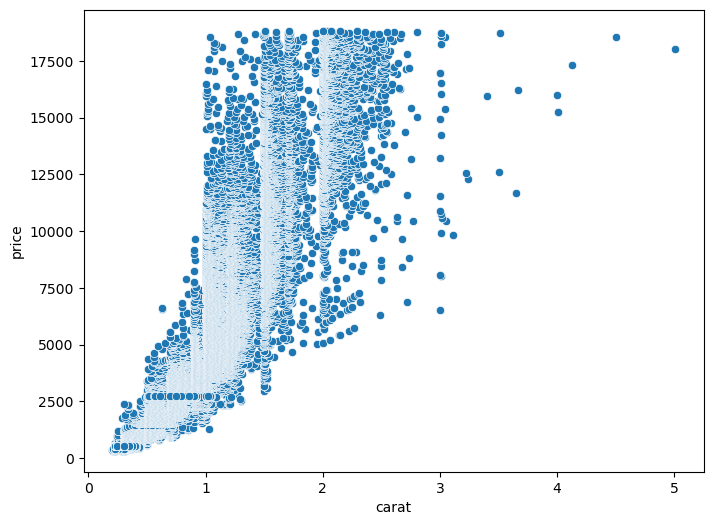

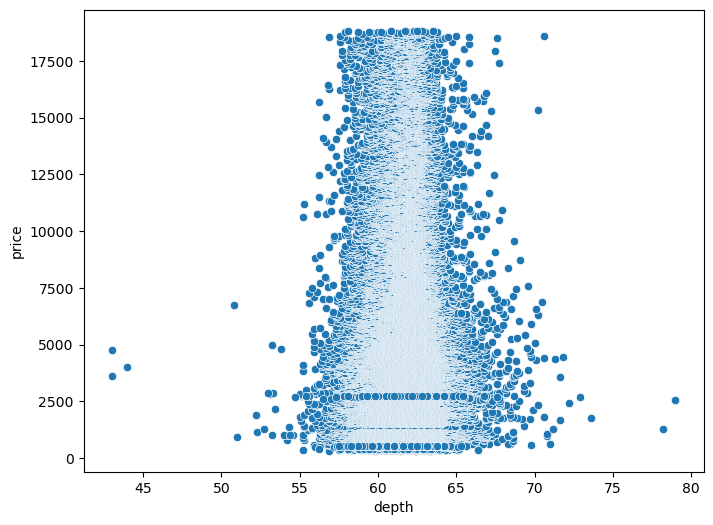

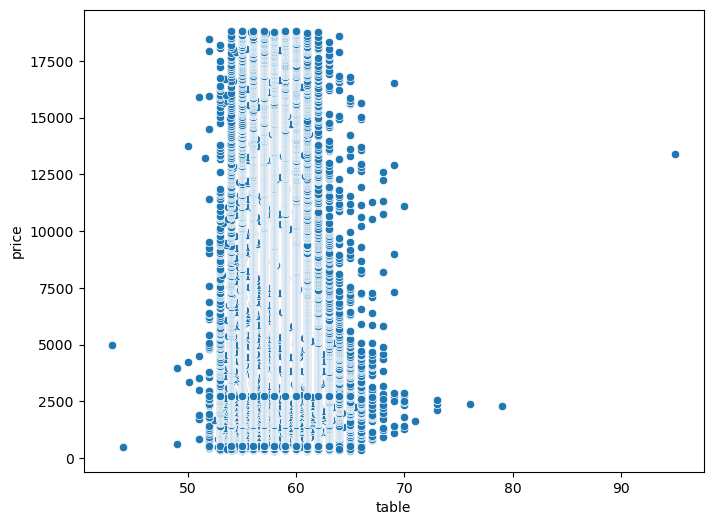

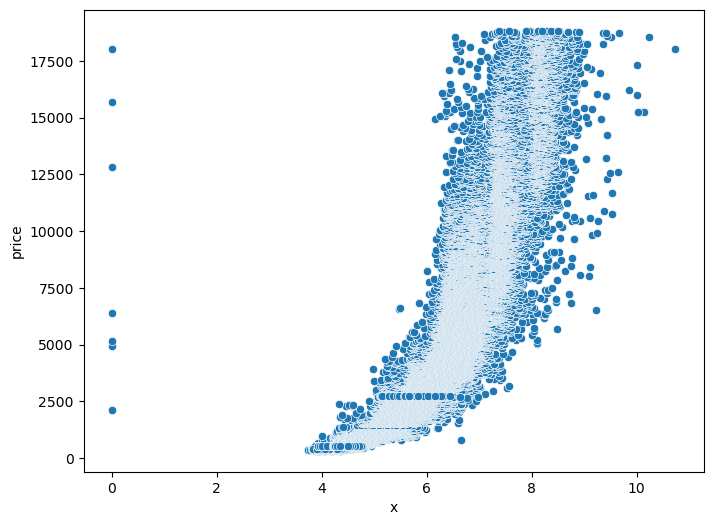

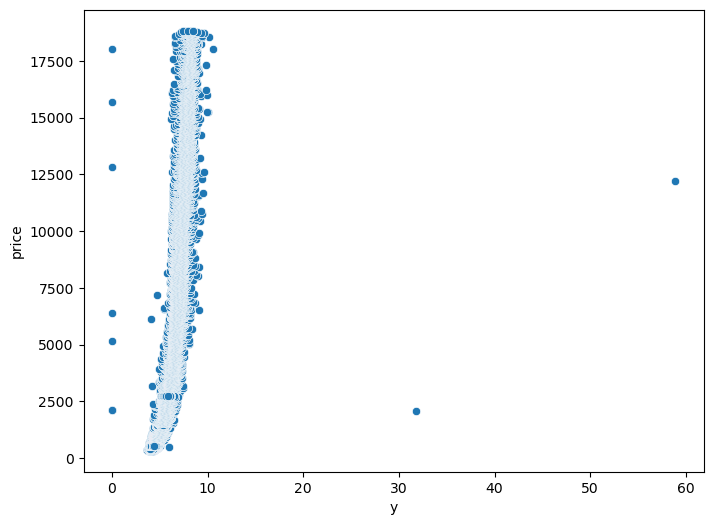

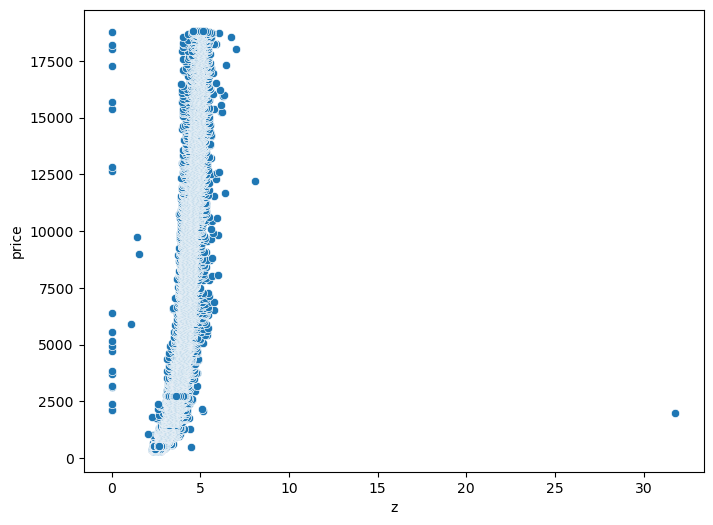

In [507]:
for col in df.select_dtypes('float') :
    #print(col)
    plt.figure(figsize=(8,6))
    if (col != 'price'):
        sns.scatterplot(x=df[col], y=df['price']) 

<Axes: >

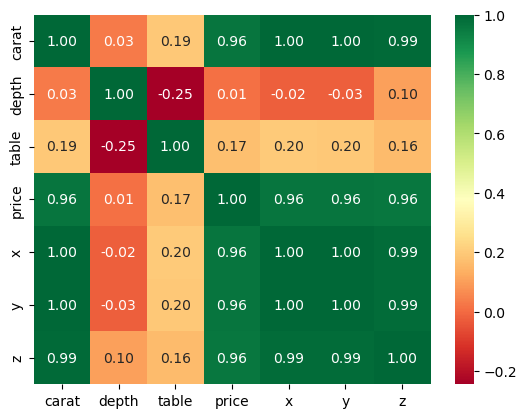

In [504]:
quant_var = ['carat', "depth", "table",'price', 'x','y','z']
#diamond_quant = diamond[quant_var]
sns.heatmap(df[quant_var].corr(method='spearman'), annot = True, cmap="RdYlGn", fmt='.2f')

**Vérifions la multicolinéarité entre les variables**

In [922]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

quant_var = ['carat', "depth", "table", 'x','y','z']
df_num = df[quant_var]

vif_data = pd.DataFrame()
vif_data['feature'] = df_num.columns
vif_data['VIF'] = [variance_inflation_factor(df_num.values, i) for i in range(len(df_num.columns))]

print(vif_data)

vif_threshold = 10

vif_max = vif_data[vif_data["VIF"] > vif_threshold]["feature"].tolist()

print(f"\nFeatures with VIF > {vif_threshold} : {vif_max}")

  feature          VIF
0   carat    70.132799
1   depth   515.146274
2   table   500.595341
3       x  1284.949828
4       y   530.998218
5       z   540.677349

Features with VIF > 10 : ['carat', 'depth', 'table', 'x', 'y', 'z']


D'après cette matrice de corrélation, il y a très peu de corrélation entre le prix et la profondeur du diamant, c'est pareil pour la table du diamant. Par contre, il y a une forte corrélation entre le prix et les autres features.

**Verification de la linéarité entre les ariables et la targuet**

Linear Regression results for carat vs Price
Slope: 7756.425617968445
Intercept: -2256.360580045411
R-squared: 0.9215913011934779
P_value: 0.0
Standard error: 14.06657872756124
--------------------


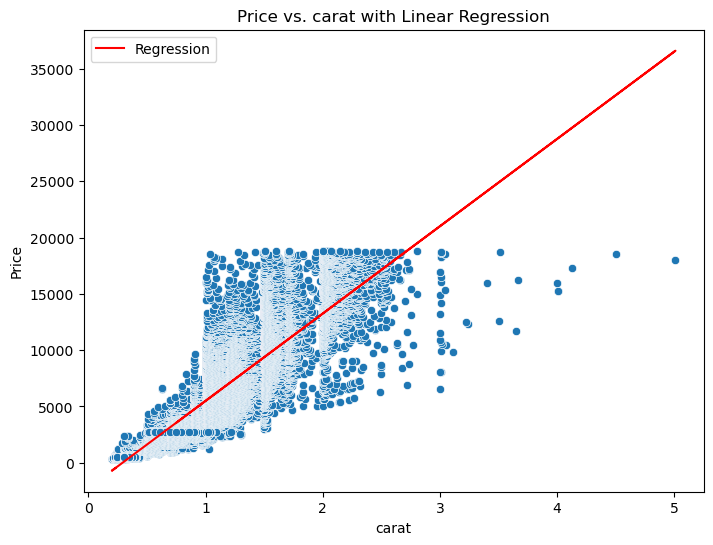

Linear Regression results for depth vs Price
Slope: -29.649969882260187
Intercept: 5763.6677172775235
R-squared: -0.010647404584142978
P_value: 0.013403249012606503
Standard error: 11.989704000089983
--------------------


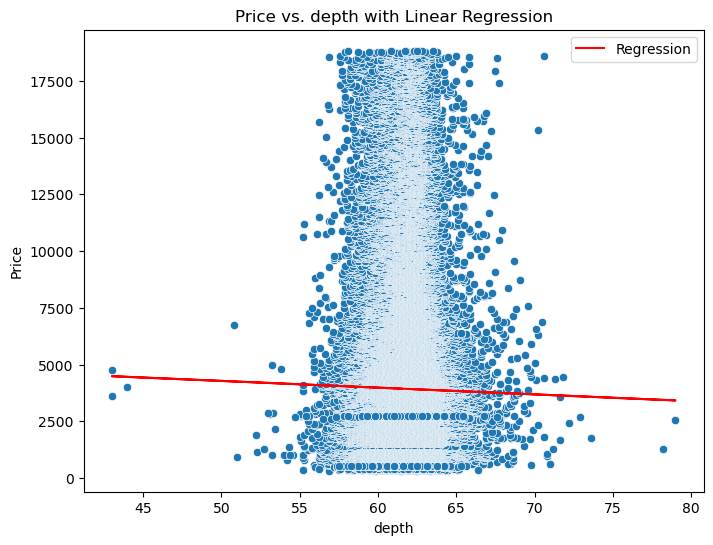

Linear Regression results for table vs Price
Slope: 226.98374727065072
Intercept: -9109.047189153971
R-squared: 0.127133902121742
P_value: 3.761533913461716e-193
Standard error: 7.625134951131455
--------------------


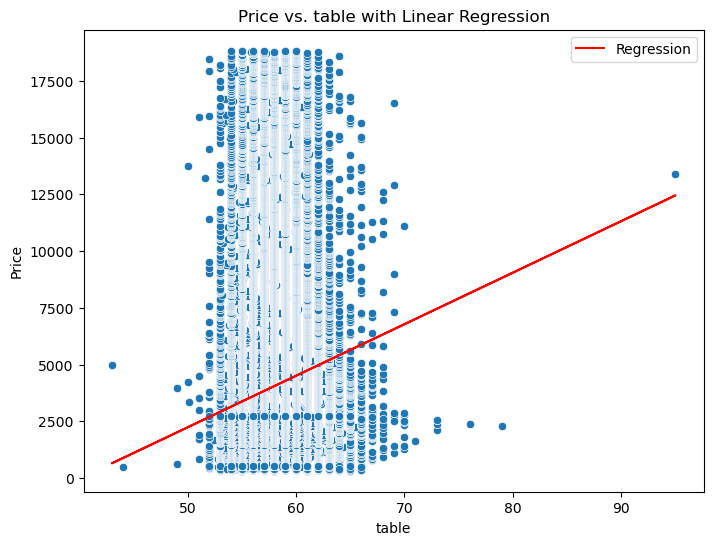

Linear Regression results for x vs Price
Slope: 3145.412947690108
Intercept: -14094.056377068078
R-squared: 0.8844351610161277
P_value: 0.0
Standard error: 7.146077299651613
--------------------


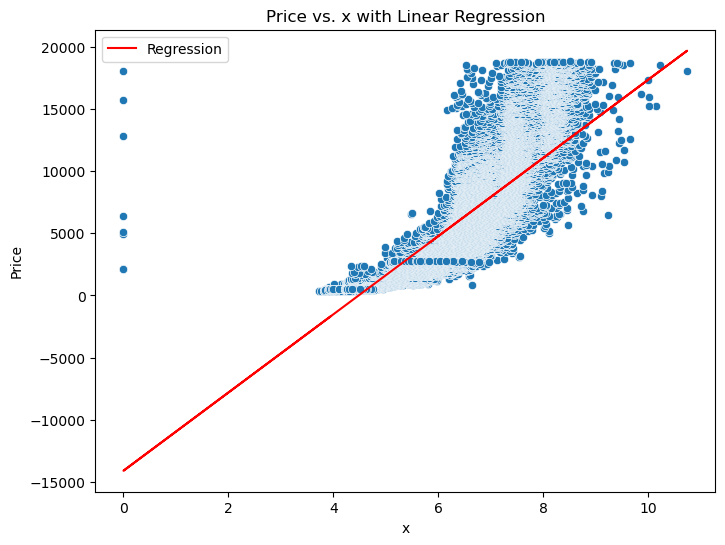

Linear Regression results for y vs Price
Slope: 3022.8874040717665
Intercept: -13402.02655506715
R-squared: 0.8654208978641872
P_value: 0.0
Standard error: 7.535713964634979
--------------------


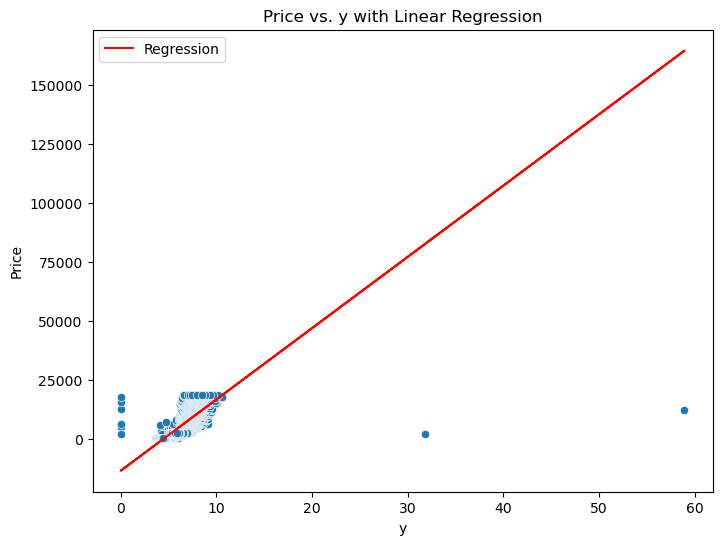

Linear Regression results for z vs Price
Slope: 4868.794629050748
Intercept: -13296.568291378688
R-squared: 0.8612494438514482
P_value: 0.0
Standard error: 12.369858700516641
--------------------


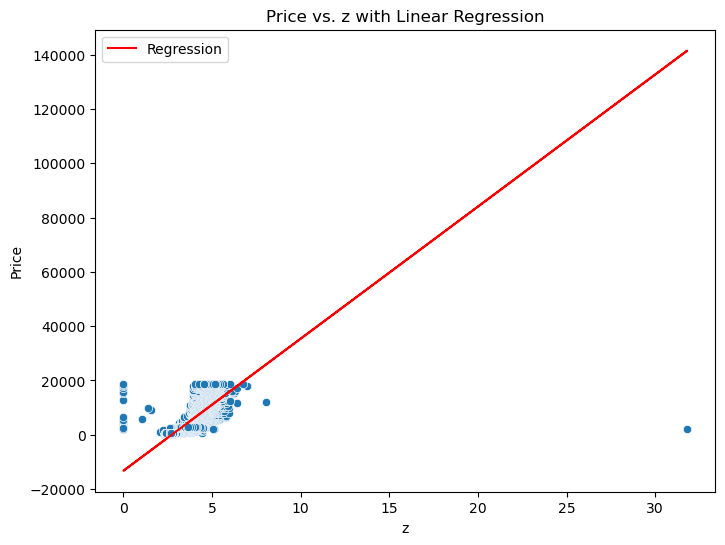

In [920]:
from scipy.stats import linregress

for col in df.select_dtypes('float'):
    if (col != 'price') :
        slope, intercept, r_value, p_value, std_err = linregress(df[col], df['price'])
        
        print(f"Linear Regression results for {col} vs Price")
        print(f"Slope: {slope}")
        print(f"Intercept: {intercept}")
        print(f"R-squared: {r_value}")
        print(f"P_value: {p_value}")
        print(f"Standard error: {std_err}")
        print(f"-" * 20)
        
        plt.figure(figsize=(8,6))
        sns.scatterplot(x=col, y='price', data=df)
        plt.plot(df[col], slope*df[col]+intercept, color='red', label = 'Regression')
        plt.title(f'Price vs. {col} with Linear Regression')
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.legend()
        plt.show()

Les variables x, y, z et carat presentent une progression lieaire en fonction du prix du diamant

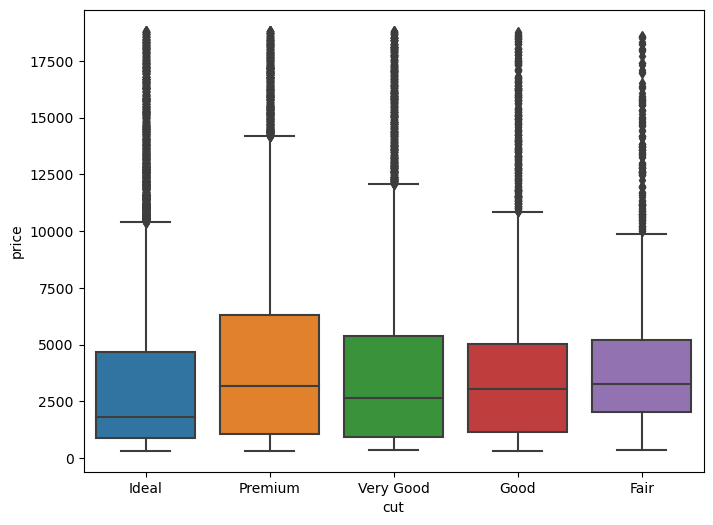

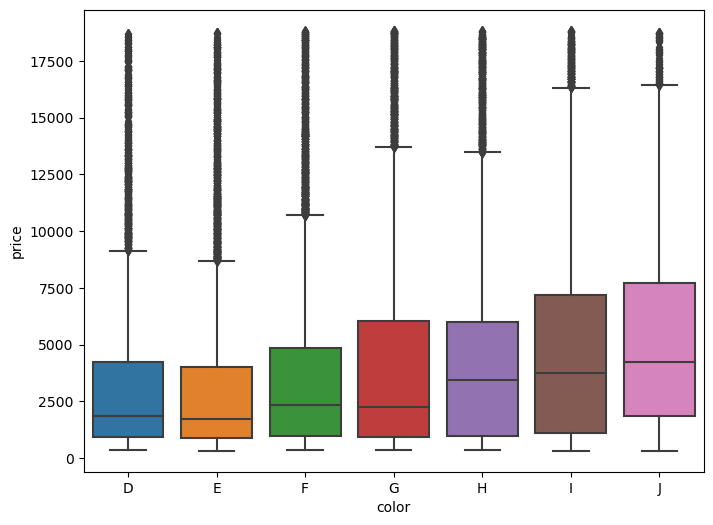

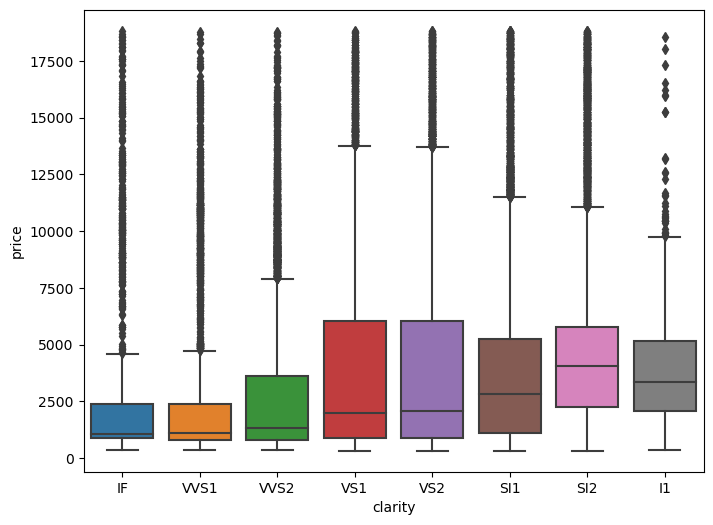

In [511]:
for col in df.select_dtypes('category') :
    #print(col)
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[col], y=df['price']) 

Il y a énormémant de valeurs abberrantes pour chaque classe des différentes variables. Peut-être qu'en supprimant les valeurs extrêmes j'aurai de meilleurs rendements

In [515]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(upper_bound)
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

In [516]:
# Trouver les outliers pour la colonne 'PRICE'
outliers = detect_outliers_iqr(df, 'price')

outliers

11885.625


carat        cut color clarity  depth  table  price     x     y     z
23820   1.17      Ideal     F    VVS1   62.1   57.0  11886  6.82  6.73  4.21
23821   2.08      Ideal     I     SI2   62.0   56.0  11886  8.21  8.10  5.06
23822   1.70    Premium     I     VS2   62.2   58.0  11888  7.65  7.60  4.74
23823   1.09      Ideal     F      IF   61.6   55.0  11888  6.59  6.65  4.08
23824   1.68      Ideal     E     SI2   60.4   55.0  11888  7.79  7.70  4.68
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
27745   2.00  Very Good     H     SI1   62.8   57.0  18803  7.95  8.00  5.01
27746   2.07      Ideal     G     SI2   62.5   55.0  18804  8.20  8.13  5.11
27747   1.51      Ideal     G      IF   61.7   55.0  18806  7.37  7.41  4.56
27748   2.00  Very Good     G     SI1   63.5   56.0  18818  7.90  7.97  5.04
27749   2.29    Premium     I     VS2   60.8   60.0  18823  8.50  8.47  5.16

[3540 rows x 10 columns]

- **IDENTIFICATION DE LA TARGET :** "price"

- **NOMBRES DE LIGNES ET DE COLONNES :** (53940, 10)


- **TYPE DE VARIABLES :** 
    - float64 =    6, category  =  1, category =   1, category   = 1, int64  =     1,
    - Présence des valeurs aberrantes telles que les valeurs de x, y et z nulles. Ce qui n'est pas possible dans la vie réelle.

- **IDENTIFIER LES VALEURS MANQUANTES :** Aucune valeurs manquantes

- **VISUALISER LA TARGUET :**
    - elle n'a pas une distribution normale
    - 75% des diamants ont des prix inférieurs à 6540
    - présence de beaucoup de valeurs extrêmes.

- **COMPREHENSION DES VARIABLES :**  
    - **carat :** il y a beaucoup plus de diamants de faible masse (75% inférieure à 1 carat). Il va falloir en tenir compte
    - **x, y, z :** les diamants ont des formes qui ne varient pas beaucoupe (std : proche de 1) avec quelques valeurs aberrantes
    - **depht :** je dois regarder s'il y a une véritable corrélation entre cette feature et la targuet
    - **table :** même conclusions que pour la feature "depht"
    - **cut, clarity; color :** Ces variables sont inégalement réparties. Il y a beaucoup moins de diamants de mauvaises qualité. Il va falloir régarder si cela affecte le prix.
- **VISUALISATION DES RELATIONS FEATURES-TARGUET :**
    - **price/depht, table :** aucune corrélation entre le prix et ces features
    - **price/x,y,z, carat:** très forte corrélation entre ces variables et le prix. je pourrais en faire une features engineering pour ne garder que quelques variables. De plus elles presentent une progression lieaire en fonction du prix du diamant
    - **price/cut, clarity, color :** beaucoup de valeurs aberrantes sans véritable lien avec la qualité du diamant.

- **IDENTIFICATION DES OUTLIERS :** 
    - présence de **3540 diamants** dont les prix sont extrêmes (compris entre [11,886 ; 18,823])
    - il y a beaucoup de valeurs extrêmes qui n'ont parfois aucun lien avec la qualité du diamant.

### 2. PREPROCESSING

**modèles à utiliser :** régression linéaire, regression de ridge, lasso regression, regression polynomiale, SGDRegressor, Gradient Descent, Elastic Net

In [455]:
df_p = diamond.copy()

# Rétirer les valeurs aberrantes
df_p = df_p.drop(df_p[df_p["z"]==0].index)
df_p

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53920 rows x 10 columns]

In [456]:
df_p.describe()

carat         depth         table         price             x  \
count  53920.000000  53920.000000  53920.000000  53920.000000  53920.000000   
mean       0.797698     61.749514     57.456834   3930.993231      5.731627   
std        0.473795      1.432331      2.234064   3987.280446      1.119423   
min        0.200000     43.000000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    949.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5323.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53920.000000  53920.000000  
mean       5.734887      3.540046  
std        1.140126      0.702530  
min        3.680000      1.070000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [457]:
def imputation(df):
    return df.dropna(axis=0)

def encodage(df):
    codes = {
        'I1' : 1,
        'SI2' : 2,
        'SI1' : 3,
        'VS2' : 4,
        'VS1' : 5,
        'VVS2': 6,
        'VVS1' : 7,
        'IF' : 8,
        'Fair' : 1,
        'Good' : 2,
        'Very Good' : 3,
        'Premium' : 4,
        'Ideal' : 5,
        'J' : 1,
        'I' : 2,
        'H' : 3,
        'G' : 4,
        'F' : 5,
        'E' : 6,
        'D' : 7}
    
    for col in df.select_dtypes('category') :
        df[col] = df[col].map(codes)
        
    return df

def feature_engineering(df):
    df['volume'] = df['x']*df['y']*df['z']
    return df.drop(['x', 'y', 'z'], axis=1)

def preprocessing(df):
    
    df = encodage(df)
    df = imputation(df)
    #df = feature_engineering(df)
    
    X = df.drop('price', axis=1)
    y = df['price']
    
    #print(y.value_counts())
    
    return X, y

Dimension du train set : (43136, 10)
Dimension du test set : (10784, 10)


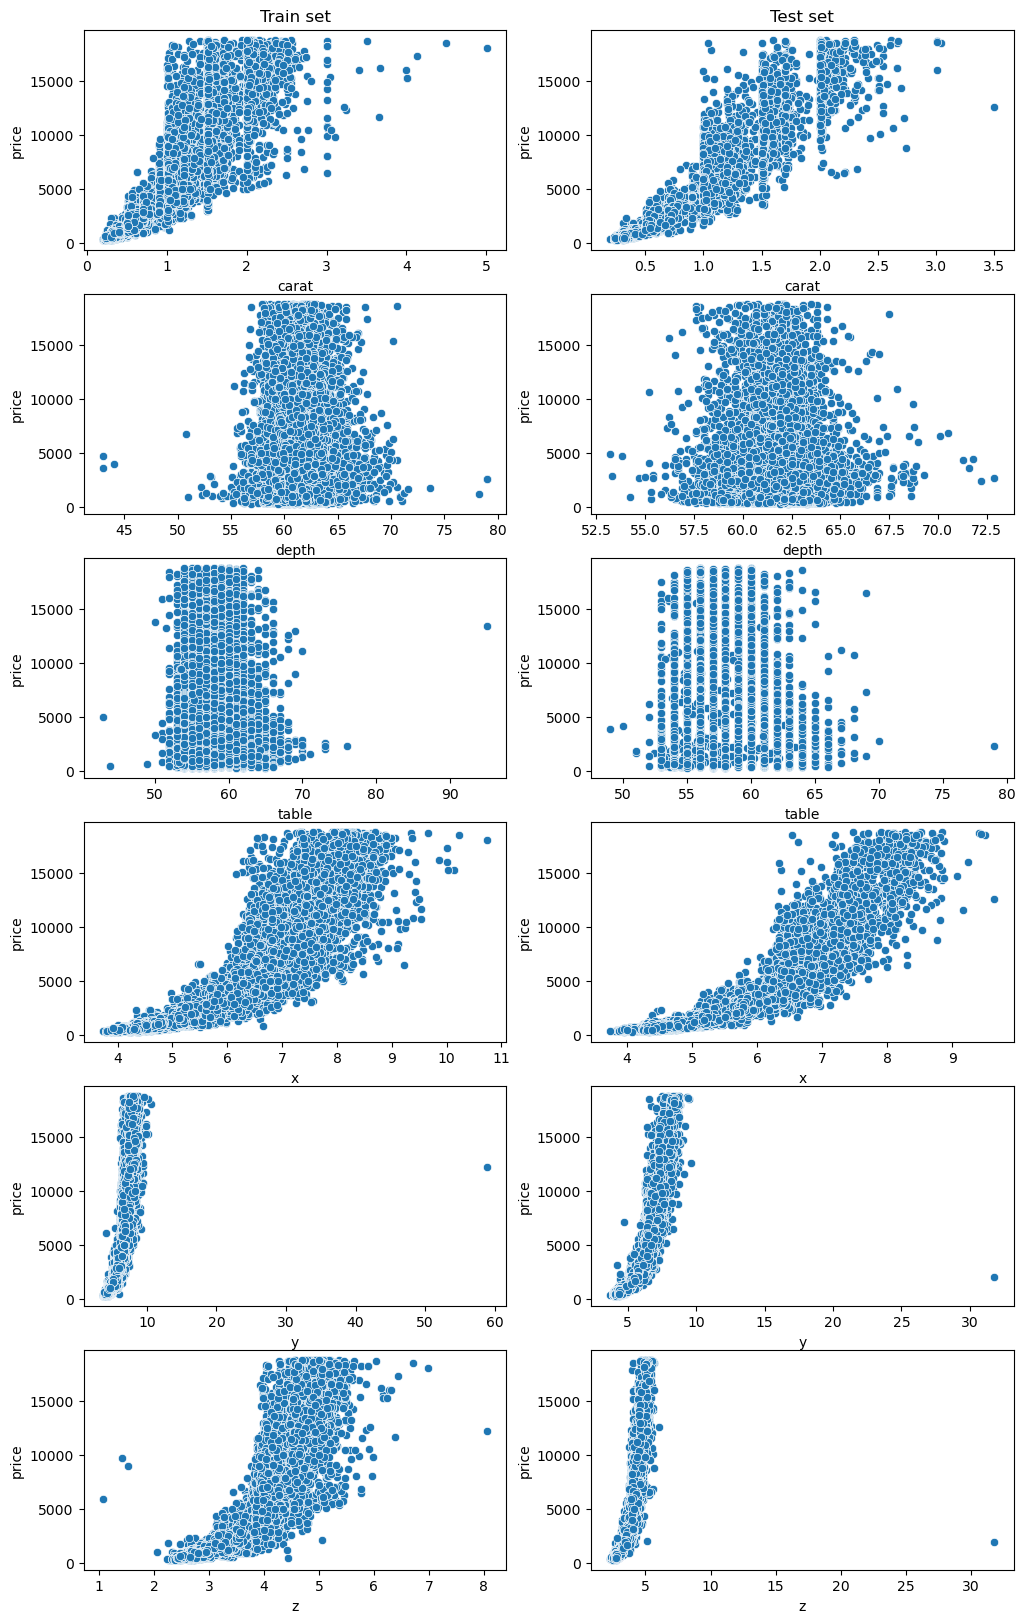

In [458]:
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(df_p, test_size = 0.2, random_state=42)

print('Dimension du train set :', trainset.shape)
print('Dimension du test set :', testset.shape)

plt.figure(figsize=(12, 20))
plt.subplot(621)
sns.scatterplot(x=trainset['carat'], y=trainset['price'])
plt.title("Train set")

plt.subplot(622)
sns.scatterplot(x=testset['carat'], y=testset['price'])
plt.title("Test set")

plt.subplot(623)
sns.scatterplot(x=trainset['depth'], y=trainset['price'])

plt.subplot(624)
sns.scatterplot(x=testset['depth'], y=testset['price'])

plt.subplot(625)
sns.scatterplot(x=trainset['table'], y=trainset['price'])

plt.subplot(626)
sns.scatterplot(x=testset['table'], y=testset['price'])

plt.subplot(627)
sns.scatterplot(x=trainset['x'], y=trainset['price'])

plt.subplot(628)
sns.scatterplot(x=testset['x'], y=testset['price'])

plt.subplot(629)
sns.scatterplot(x=trainset['y'], y=trainset['price'])

plt.subplot(6,2,10)
sns.scatterplot(x=testset['y'], y=testset['price'])

plt.subplot(6,2,11)
sns.scatterplot(x=trainset['z'], y=trainset['price'])

plt.subplot(6,2,12)
sns.scatterplot(x=testset['z'], y=testset['price'])

plt.show()

Linear Regression results for carat vs Price
Slope: 7733.559404115995
Intercept: -2239.474394566709
R-squared: 0.9206454157129048
P_value: 0.0
Standard error: 15.790168748680639
--------------------


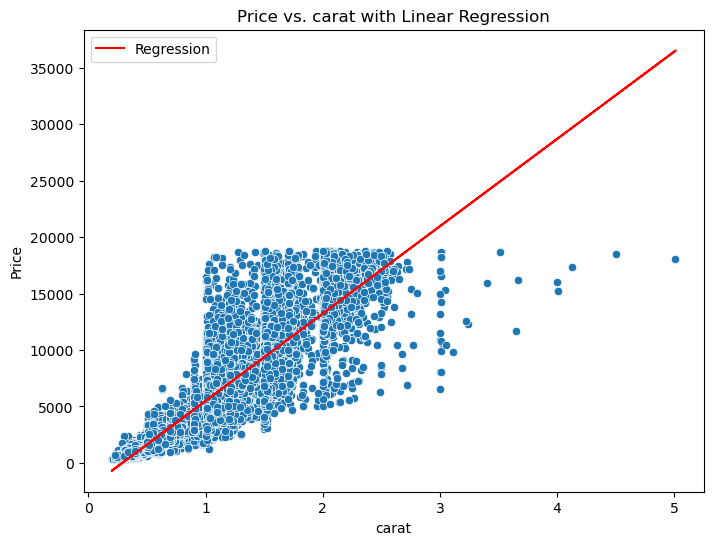

Linear Regression results for depth vs Price
Slope: -26.802648269121555
Intercept: 5581.512038742701
R-squared: -0.009611891772560997
P_value: 0.04590105475294456
Standard error: 13.425760797088833
--------------------


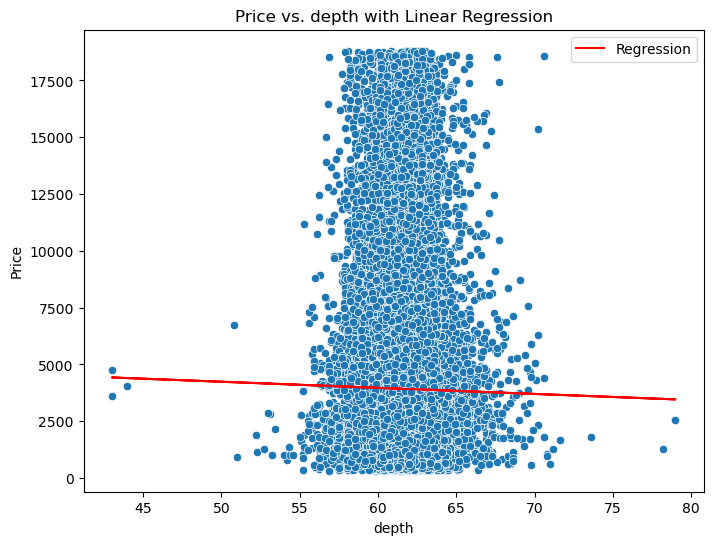

Linear Regression results for table vs Price
Slope: 224.5460804454799
Intercept: -8975.5778435822
R-squared: 0.1255508825123287
P_value: 4.6324114979296225e-151
Standard error: 8.543300456677773
--------------------


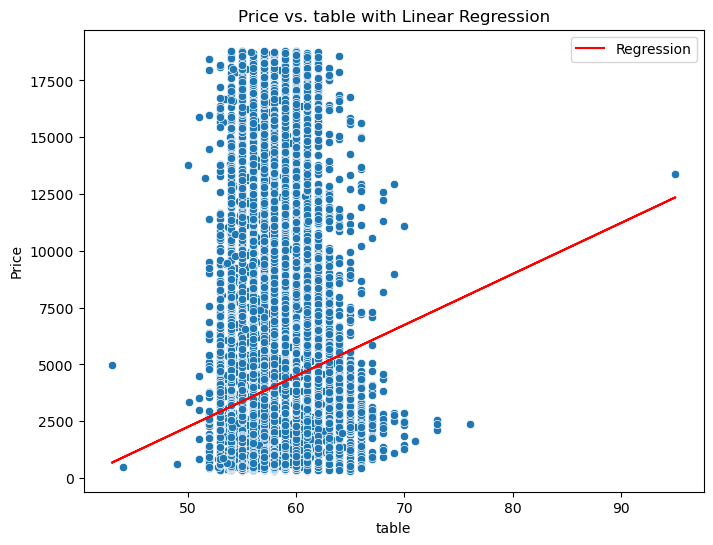

Linear Regression results for x vs Price
Slope: 3153.9789979791653
Intercept: -14147.767952318862
R-squared: 0.8868131830220848
P_value: 0.0
Standard error: 7.913692372101769
--------------------


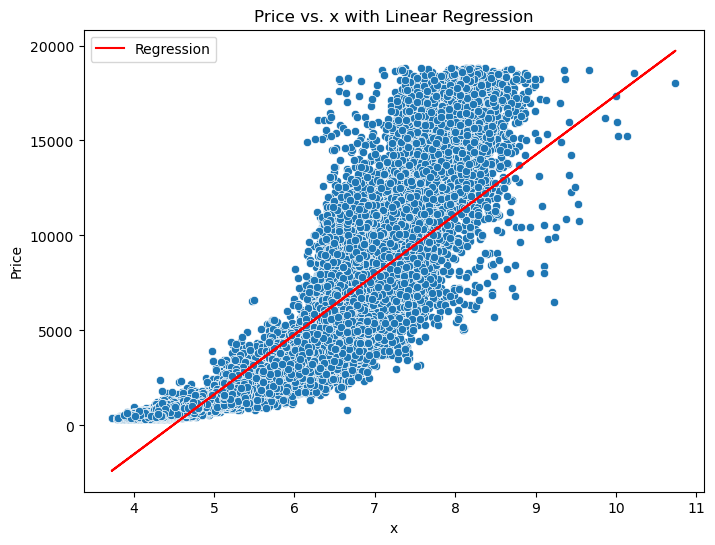

Linear Regression results for y vs Price
Slope: 3030.7502633008826
Intercept: -13450.567037468367
R-squared: 0.8679603596990546
P_value: 0.0
Standard error: 8.349806046751423
--------------------


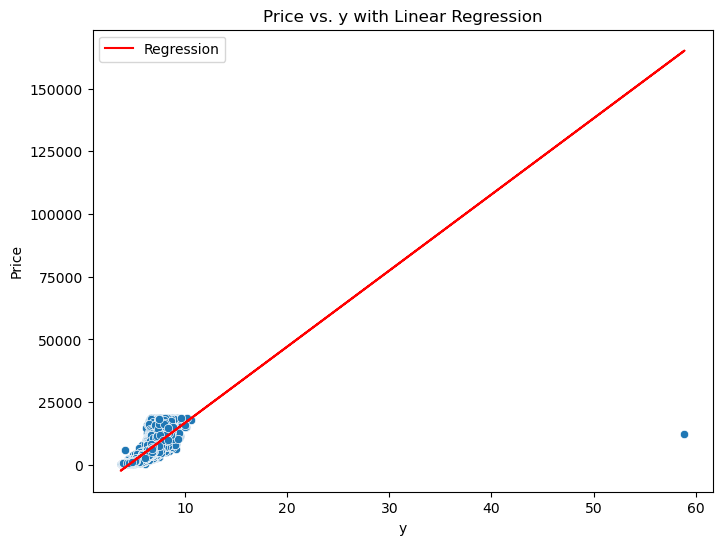

Linear Regression results for z vs Price
Slope: 5070.938440437015
Intercept: -14018.076787534816
R-squared: 0.8815199073727722
P_value: 0.0
Standard error: 13.077461445995088
--------------------


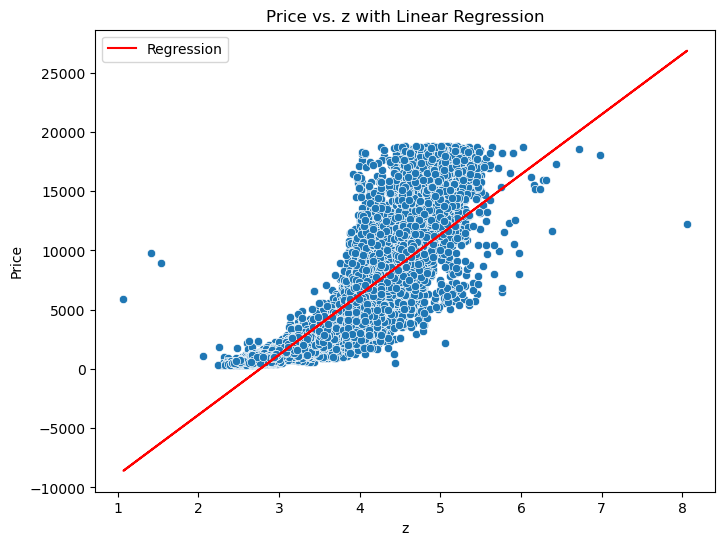

In [459]:
from scipy.stats import linregress

for col in trainset.select_dtypes('float'):
    if (col != 'price') :
        slope, intercept, r_value, p_value, std_err = linregress(trainset[col], trainset['price'])
        
        print(f"Linear Regression results for {col} vs Price")
        print(f"Slope: {slope}")
        print(f"Intercept: {intercept}")
        print(f"R-squared: {r_value}")
        print(f"P_value: {p_value}")
        print(f"Standard error: {std_err}")
        print(f"-" * 20)
        
        plt.figure(figsize=(8,6))
        sns.scatterplot(x=col, y='price', data=trainset)
        plt.plot(trainset[col], slope*trainset[col]+intercept, color='red', label = 'Regression')
        plt.title(f'Price vs. {col} with Linear Regression')
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.legend()
        plt.show()

<Axes: >

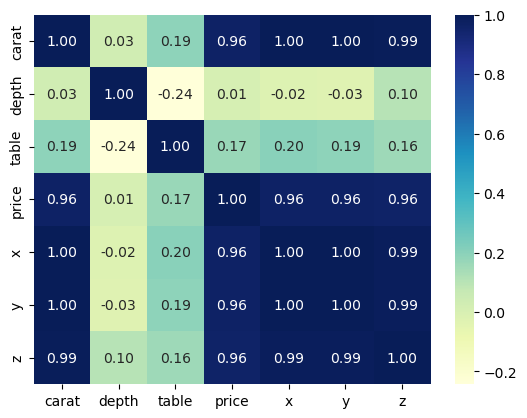

In [203]:
quant_var = ['carat', "depth", "table",'price', 'x','y','z']
#diamond_quant = diamond[quant_var]
sns.heatmap(trainset[quant_var].corr(method='spearman'), annot = True, cmap="YlGnBu", fmt='.2f')

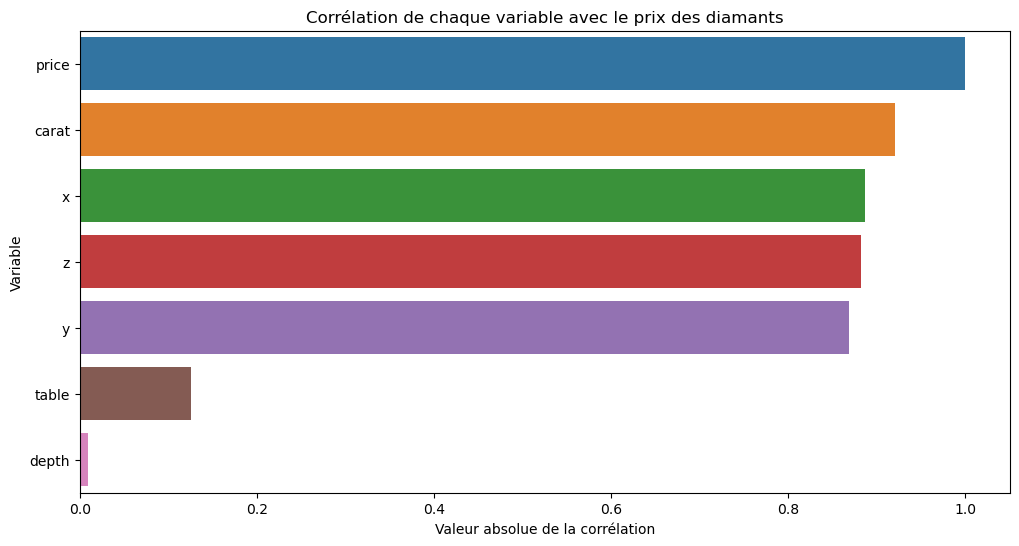

In [204]:
correlations = abs(trainset[quant_var].corr()["price"]).sort_values(ascending=False)

# Représentation graphique des corrélations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.xlabel("Valeur absolue de la corrélation")
plt.ylabel("Variable")
plt.title("Corrélation de chaque variable avec le prix des diamants")
plt.show()


In [934]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

quant_var = ['carat', "depth", "table", 'x','y','z']
df_num = trainset[quant_var]

vif_data = pd.DataFrame()
vif_data['feature'] = df_num.columns
vif_data['VIF'] = [variance_inflation_factor(df_num.values, i) for i in range(len(df_num.columns))]

print(vif_data)

vif_threshold = 10

vif_max = vif_data[vif_data["VIF"] > vif_threshold]["feature"].tolist()

print(f"\nFeatures with VIF > {vif_threshold} : {vif_max}")

  feature          VIF
0   carat    89.747960
1   depth   895.534813
2   table   677.909137
3       x  2606.004623
4       y   576.361508
5       z  3073.530790

Features with VIF > 10 : ['carat', 'depth', 'table', 'x', 'y', 'z']


Avec la base d'apprentissage, **j'arrive aux même conclusions** que lors de l'EDA.

    - x, y, z, et carat sont fortement correlées entre eux de même qu'à la variable prix
    - x, y, z, et carat progressent de facon linéaire avec le prix.
    
Avant de faire un modèle, je dois d'abord travailler sur ces variables afin de ne retenir que celles qui sont vraiament pertinente pour développer un modèle.  **C'EST MON PLUS GROS CHALLENGE**

In [205]:
testset

carat        cut color clarity  depth  table  price     x     y     z
34704   0.31    Premium     F      IF   60.8   59.0    874  4.36  4.39  2.66
21099   1.29      Ideal     H     VS1   61.8   56.0   9273  6.97  7.02  4.32
23685   1.52    Premium     F     SI1   62.6   59.0  11743  7.36  7.27  4.58
39200   0.41       Good     F    VVS2   63.6   56.0   1064  4.72  4.68  2.99
35560   0.35    Premium     G     VS1   61.5   58.0    906  4.54  4.50  2.78
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
6432    1.02      Ideal     D     SI2   62.5   57.0   4044  6.43  6.38  4.00
14694   1.00  Very Good     H    VVS2   60.3   59.0   5929  6.41  6.46  3.88
20508   1.70    Premium     I     VS1   61.5   58.0   8840  7.74  7.64  4.73
49621   0.32  Very Good     F     SI2   63.1   56.0    540  4.38  4.34  2.75
45357   0.67       Good     D     SI2   64.7   55.0   1664  5.50  5.54  3.57

[10784 rows x 10 columns]

In [212]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(df_p, test_size = 0.2, random_state=42)
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

In [213]:
def evaluation(model, X, Y, x, y):
    
    
    model.fit(X, Y)
    y_pred = model.predict(x)
    
    # Les paramètres du modèle
    #print(f'les paramètres sont : {model.intercept_} et {model.coef_}')
    
    # Evaluer le modèle
    mape = mean_absolute_percentage_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    
    print(f"Erreur absolue moyenne (MAPE): {mape}")
    print(f"Erreur quadratique moyenne (MSE): {mse}")
    print(f"Erreur quadratique moyenne (RMSE): {rmse}")
    print(f"Coefficient de détermination (R²): {r2}")
    
    # Créer un DataFrame pour stocker les résultats
    results_df = pd.DataFrame({'Valeur observée': y, 'Valeur prédite': y_pred})

    #
    results_df = results_df.reset_index(drop=True)

    #
    results_df = pd.concat([x.reset_index(drop=True), results_df], axis = 1)

    # Afficher le DataFrame
    return results_df

**2.1. Régression linéaire avec standardisation et feature engineering** : Les performances donnent l'impression que le modèle est bon. Pour le vérifier, on va tracer les courbes d'apprentissage.

In [209]:
from sklearn.linear_model import LinearRegression

model = make_pipeline(StandardScaler(), LinearRegression())
result = evaluation(model, X_train, y_train, X_test, y_test)
result

Erreur absolue moyenne (MAPE): 0.47840515963736086
Erreur quadratique moyenne (MSE): 1423331.021061694
Erreur quadratique moyenne (RMSE): 1193.0343754736048
Coefficient de détermination (R²): 0.911219100351028


carat cut color clarity  depth  table      volume  Valeur observée  \
0       0.31   4     5       8   60.8   59.0   50.913464              874   
1       1.29   5     3       5   61.8   56.0  211.375008             9273   
2       1.52   4     5       3   62.6   59.0  245.062976            11743   
3       0.41   2     5       6   63.6   56.0   66.047904             1064   
4       0.35   4     4       5   61.5   58.0   56.795400              906   
...      ...  ..   ...     ...    ...    ...         ...              ...   
10779   1.02   5     7       2   62.5   57.0  164.093600             4044   
10780   1.00   3     3       6   60.3   59.0  160.665368             5929   
10781   1.70   4     2       5   61.5   58.0  279.701928             8840   
10782   0.32   3     5       2   63.1   56.0   52.275300              540   
10783   0.67   2     7       2   64.7   55.0  108.777900             1664   

       Valeur prédite  
0         1906.080420  
1         8465.069827  
2         9848.035395  
3         1435.955840  
4          375.022593  
...               ...  
10779     5759.615933  
10780     6168.087580  
10781    11581.192117  
10782    -1277.620441  
10783     2254.900346  

[10784 rows x 9 columns]

In [210]:
y = result['Valeur prédite']
y[y<0].value_counts().sum()

1110

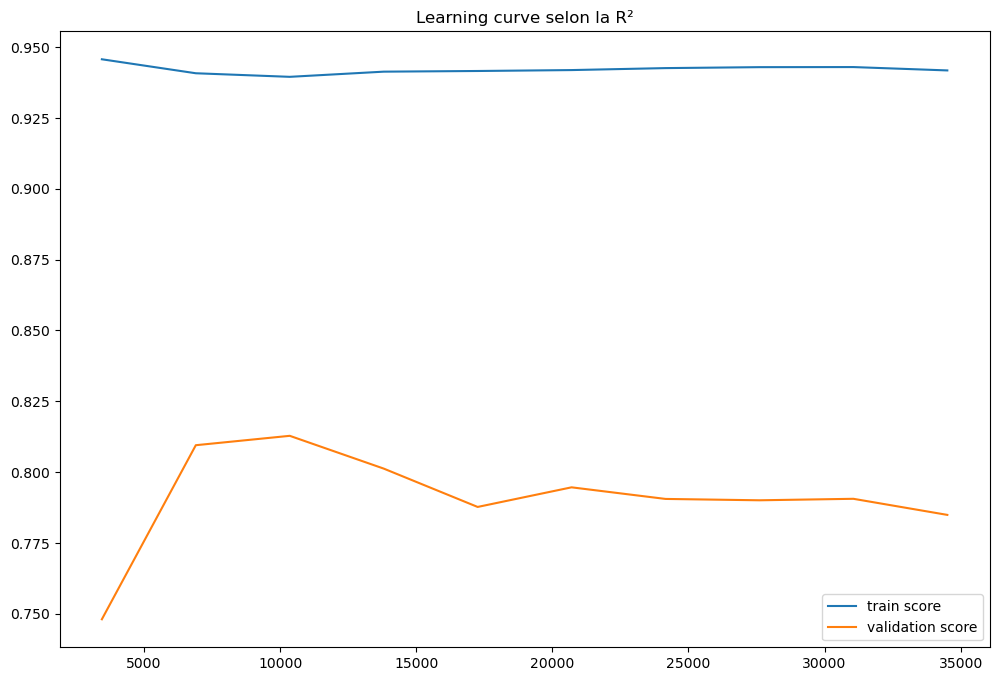

In [208]:
#VERIFICATION DES COURBES D'APPRENTISSAGE
N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                              cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1, 10))


#train_score = -train_scores
#val_score = -val_scores
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.title('Learning curve selon la R²')
plt.legend()

**2.2. Régression linéaire avec standardisation et sans feature engineering**

Avec ou sans standardisation, ce modèle a les mêmes performances. Ces performances donnent l'impression que le modèle est bon. Pour le vérifier, on va tracer les courbes d'apprentissage.

In [221]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
evaluation(model, X_train, y_train, X_test, y_test)
print(f'intercept : {model.intercept_}')        # coefficient intercept du modèle de regression linéaire
print(f'les coefficients : {model.coef_}')         # autres coefficients du modèle de regression linéaire

Erreur absolue moyenne (MAPE): 0.42987226791204325
Erreur quadratique moyenne (MSE): 1443338.784368842
Erreur quadratique moyenne (RMSE): 1201.390354701103
Coefficient de détermination (R²): 0.9099711072980505
intercept : -1146.7832526983607
les coefficients : [10796.44109455   128.29033202   323.02789604   499.478749
   -15.84831109   -24.84049547  -345.94787749   134.9647339
 -1093.66101912]


In [223]:
from sklearn.linear_model import LinearRegression

model = make_pipeline(StandardScaler(), LinearRegression())
result = evaluation(model, X_train, y_train, X_test, y_test)
result

Erreur absolue moyenne (MAPE): 0.4298722679120427
Erreur quadratique moyenne (MSE): 1443338.7843688393
Erreur quadratique moyenne (RMSE): 1201.3903547011018
Coefficient de détermination (R²): 0.9099711072980508


carat cut color clarity  depth  table     x     y     z  \
0       0.31   4     5       8   60.8   59.0  4.36  4.39  2.66   
1       1.29   5     3       5   61.8   56.0  6.97  7.02  4.32   
2       1.52   4     5       3   62.6   59.0  7.36  7.27  4.58   
3       0.41   2     5       6   63.6   56.0  4.72  4.68  2.99   
4       0.35   4     4       5   61.5   58.0  4.54  4.50  2.78   
...      ...  ..   ...     ...    ...    ...   ...   ...   ...   
10779   1.02   5     7       2   62.5   57.0  6.43  6.38  4.00   
10780   1.00   3     3       6   60.3   59.0  6.41  6.46  3.88   
10781   1.70   4     2       5   61.5   58.0  7.74  7.64  4.73   
10782   0.32   3     5       2   63.1   56.0  4.38  4.34  2.75   
10783   0.67   2     7       2   64.7   55.0  5.50  5.54  3.57   

       Valeur observée  Valeur prédite  
0                  874     2070.101865  
1                 9273     8329.641604  
2                11743     9858.900529  
3                 1064     1478.044429  
4                  906      515.578224  
...                ...             ...  
10779             4044     5622.749483  
10780             5929     5990.184161  
10781             8840    11628.834979  
10782              540    -1021.122865  
10783             1664     2152.574198  

[10784 rows x 11 columns]

In [224]:
y = result['Valeur prédite']
y[y<0].value_counts().sum()

878

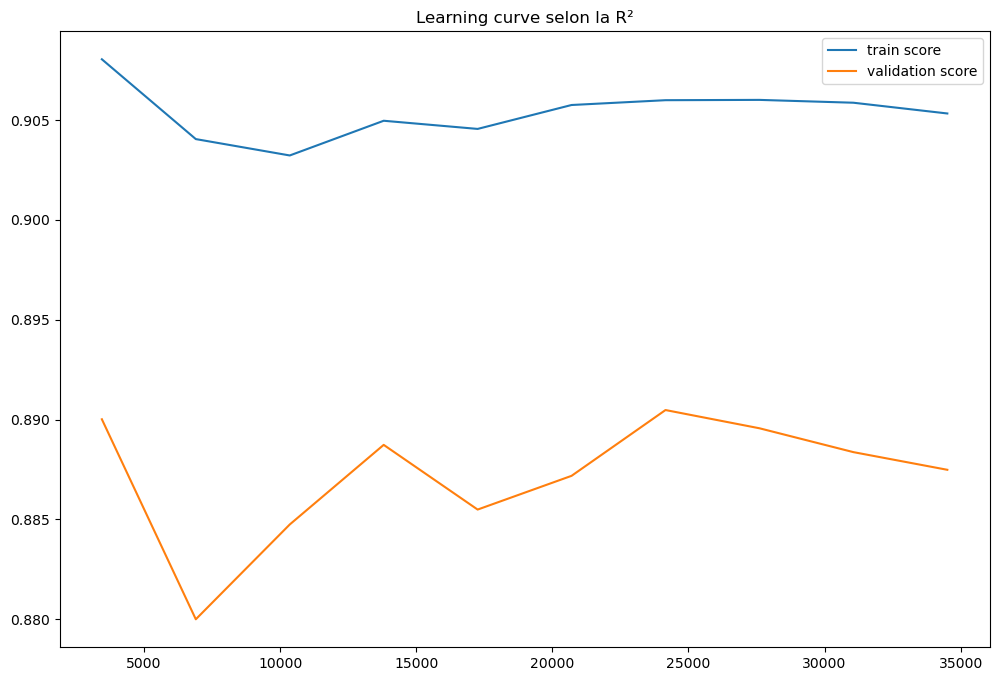

In [225]:
#VERIFICATION DES COURBES D'APPRENTISSAGE
N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                              cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1, 10))


#train_score = -train_scores
#val_score = -val_scores
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.title('Learning curve selon la R²')
plt.legend()

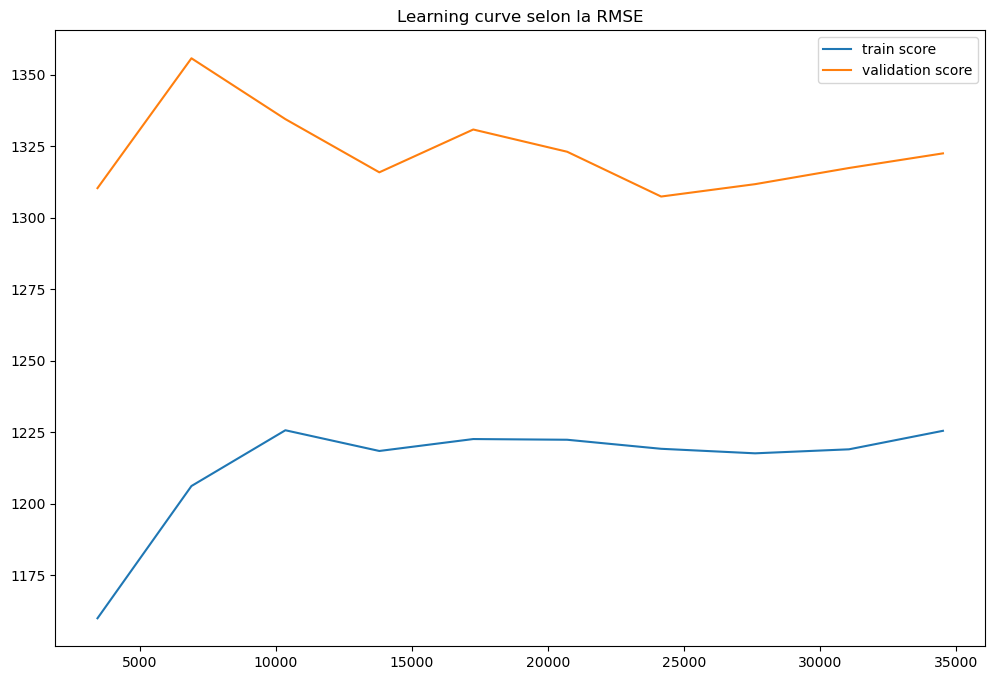

In [226]:
#VERIFICATION DES COURBES D'APPRENTISSAGE du modèle avec feature engineering
N, train_scores, val_scores = learning_curve(model, X_train, y_train, 
                                              cv=5, scoring='neg_mean_squared_error', 
                                             train_sizes=np.linspace(0.1, 1, 10))

train_score = np.sqrt(-train_scores)
val_score = np.sqrt(-val_scores)
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.title('Learning curve selon la RMSE')
plt.legend()

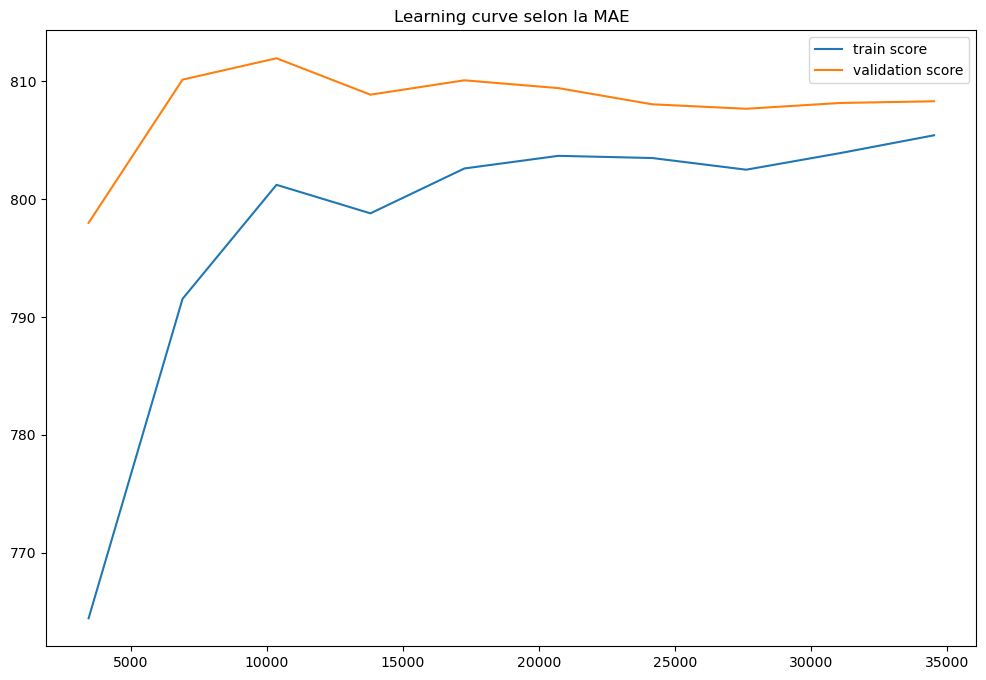

In [227]:
#VERIFICATION DES COURBES D'APPRENTISSAGE
N, train_scores, val_scores = learning_curve(model, X_train, y_train, 
                                              cv=5, scoring='neg_mean_absolute_error', 
                                             train_sizes=np.linspace(0.1, 1, 10))

train_score = -train_scores
val_score = -val_scores
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.title('Learning curve selon la MAE')
plt.legend()

Les courbes d'apprentissage montrent que les deux modèles sont en overfitting. Mais celui qui overfit le moins est **le modèle sans feature engineering avec/sans standardisation**.

Pour réduire l'overfitting je vais utiliser les méthodes suivantes :

    - Augmenter le nombre de données
    - réduire les erreurs et retirer les outliers
    - Régulariser ce modèle avec lasso pour faire de la feature selection

**REDUCTION DE L'OVERFITTING**

A. *Augmentation des données*

In [229]:
trainset, testset = train_test_split(df_p, test_size = 0.05, random_state=42)
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

model = make_pipeline(StandardScaler(), LinearRegression())
result = evaluation(model, X_train, y_train, X_test, y_test)
result

Erreur absolue moyenne (MAPE): 0.4261783805524632
Erreur quadratique moyenne (MSE): 1243726.0718182777
Erreur quadratique moyenne (RMSE): 1115.2246732467308
Coefficient de détermination (R²): 0.9191624108407561


carat cut color clarity  depth  table     x     y     z  \
0      0.31   4     5       8   60.8   59.0  4.36  4.39  2.66   
1      1.29   5     3       5   61.8   56.0  6.97  7.02  4.32   
2      1.52   4     5       3   62.6   59.0  7.36  7.27  4.58   
3      0.41   2     5       6   63.6   56.0  4.72  4.68  2.99   
4      0.35   4     4       5   61.5   58.0  4.54  4.50  2.78   
...     ...  ..   ...     ...    ...    ...   ...   ...   ...   
2691   0.91   3     4       5   63.4   54.0  6.24  6.07  3.90   
2692   0.43   5     5       7   61.0   56.0  4.90  4.87  2.98   
2693   1.28   4     3       3   62.1   62.0  6.88  6.83  4.26   
2694   0.55   3     7       3   60.7   58.0  5.24  5.30  3.20   
2695   0.74   5     3       3   62.1   56.0  5.77  5.83  3.60   

      Valeur observée  Valeur prédite  
0                 874     2099.903065  
1                9273     8343.639978  
2               11743     9861.976366  
3                1064     1453.821900  
4                 906      509.143572  
...               ...             ...  
2691             4209     4860.429388  
2692             1422     2589.292122  
2693             6210     7006.574047  
2694             1692     1965.749014  
2695             2870     2427.213214  

[2696 rows x 11 columns]

In [230]:
y = result['Valeur prédite']
y[y<0].value_counts().sum()

222

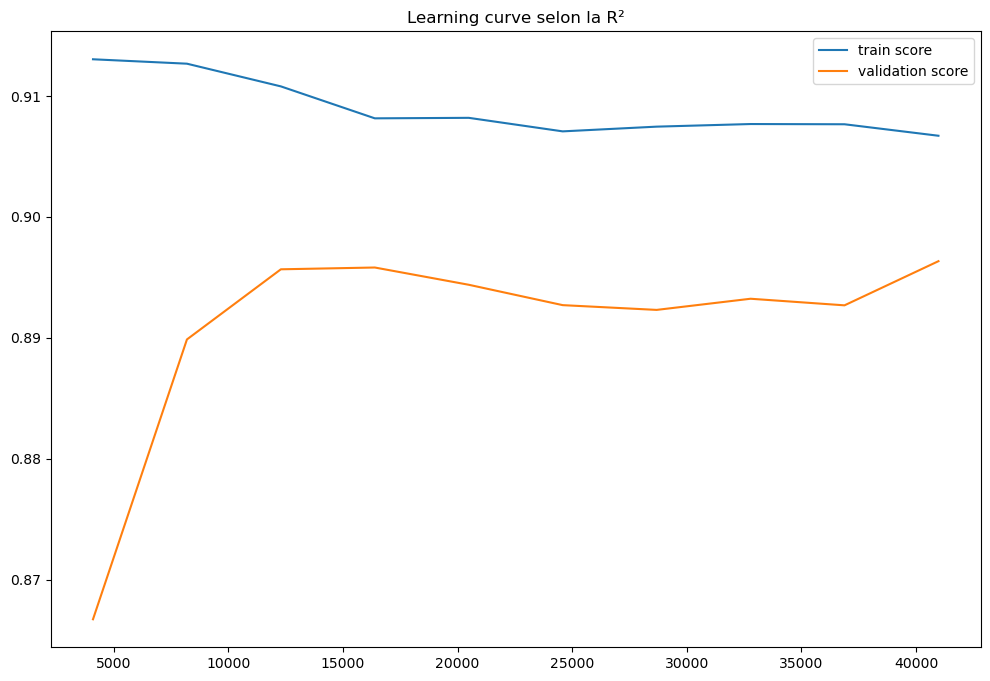

In [231]:
#VERIFICATION DES COURBES D'APPRENTISSAGE
N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                              cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1, 10))


#train_score = -train_scores
#val_score = -val_scores
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.title('Learning curve selon la R²')
plt.legend()

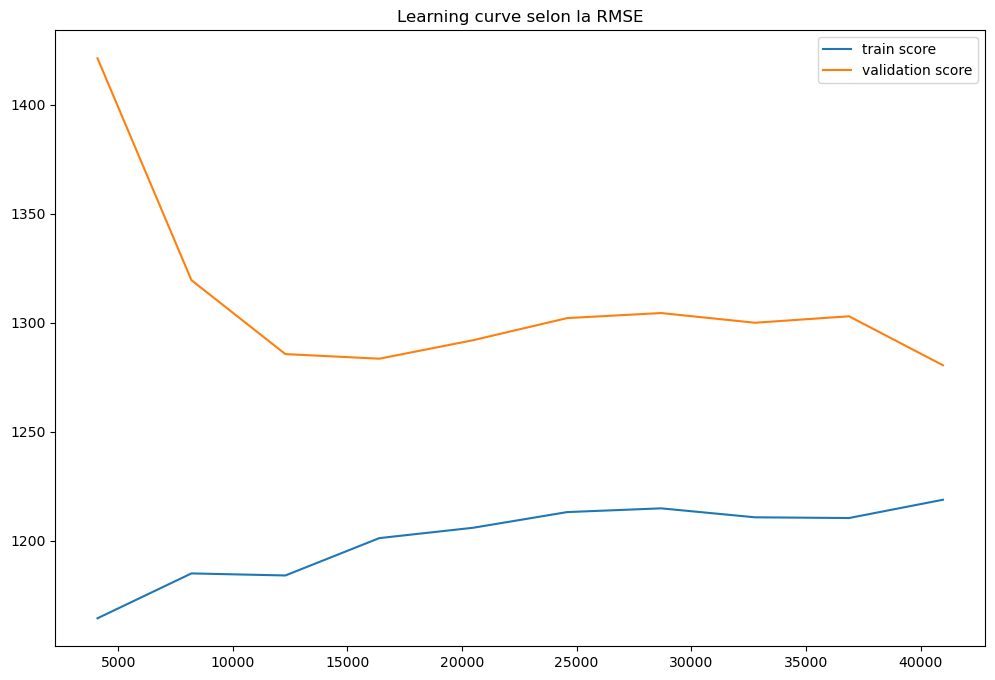

In [232]:
#VERIFICATION DES COURBES D'APPRENTISSAGE du modèle avec feature engineering
N, train_scores, val_scores = learning_curve(model, X_train, y_train, 
                                              cv=5, scoring='neg_mean_squared_error', 
                                             train_sizes=np.linspace(0.1, 1, 10))

train_score = np.sqrt(-train_scores)
val_score = np.sqrt(-val_scores)
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.title('Learning curve selon la RMSE')
plt.legend()

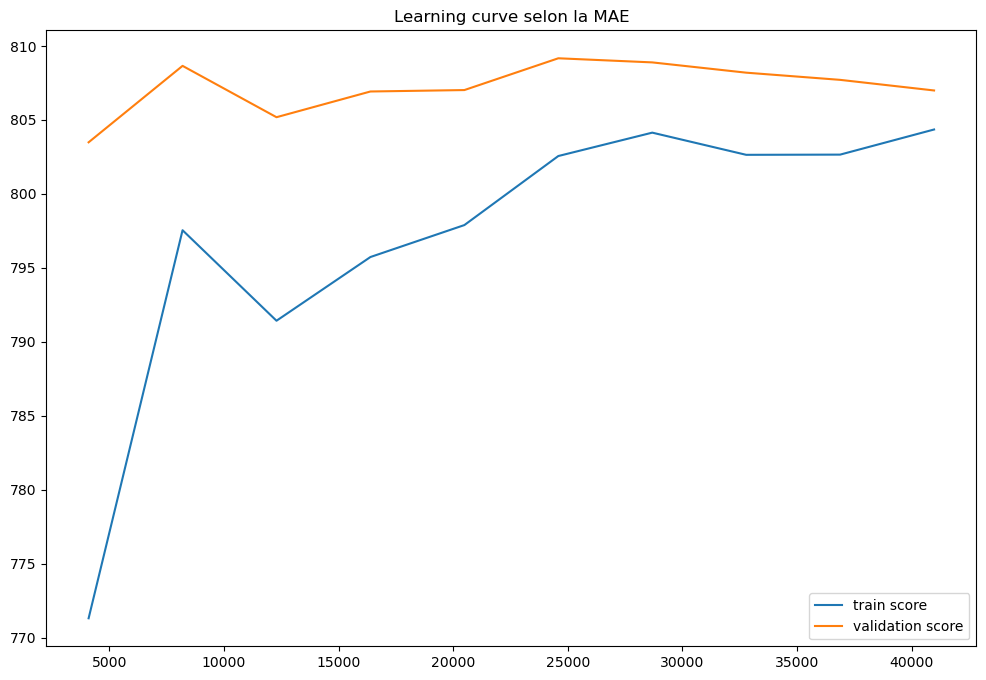

In [233]:
#VERIFICATION DES COURBES D'APPRENTISSAGE
N, train_scores, val_scores = learning_curve(model, X_train, y_train, 
                                              cv=5, scoring='neg_mean_absolute_error', 
                                             train_sizes=np.linspace(0.1, 1, 10))

train_score = -train_scores
val_score = -val_scores
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.title('Learning curve selon la MAE')
plt.legend()

**Augmenter le nombre de données ne reduit pas l'overfitting**

b. *Régulariser le modèle avec Lasso*

In [255]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

trainset, testset = train_test_split(df_p, test_size = 0.2, random_state=42)
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

lasso_s = Lasso(alpha=1)
lasso_s.fit(X_train, y_train)

selector = SelectFromModel(lasso_s, prefit=True)

#
X_tain_r = selector.transform(X_train)
selected_feature = X_train.columns[lasso_s.coef_ !=0]
selected_feature

C:\Users\SOP TELECOM\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.335e+08, tolerance: 6.843e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\SOP TELECOM\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [250]:
df_p_reduced = df_p[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'price']]  # très bonne performances r2=92%

trainset, testset = train_test_split(df_p_reduced, test_size = 0.2, random_state=42)
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

model = make_pipeline(StandardScaler(), LinearRegression())
result = evaluation(model, X_train, y_train, X_test, y_test)
result

Erreur absolue moyenne (MAPE): 0.4299148915513285
Erreur quadratique moyenne (MSE): 1356518.7279667787
Erreur quadratique moyenne (RMSE): 1164.6968395109427
Coefficient de détermination (R²): 0.9153865465745725


carat cut color clarity  depth  table     x  Valeur observée  \
0       0.31   4     5       8   60.8   59.0  4.36              874   
1       1.29   5     3       5   61.8   56.0  6.97             9273   
2       1.52   4     5       3   62.6   59.0  7.36            11743   
3       0.41   2     5       6   63.6   56.0  4.72             1064   
4       0.35   4     4       5   61.5   58.0  4.54              906   
...      ...  ..   ...     ...    ...    ...   ...              ...   
10779   1.02   5     7       2   62.5   57.0  6.43             4044   
10780   1.00   3     3       6   60.3   59.0  6.41             5929   
10781   1.70   4     2       5   61.5   58.0  7.74             8840   
10782   0.32   3     5       2   63.1   56.0  4.38              540   
10783   0.67   2     7       2   64.7   55.0  5.50             1664   

       Valeur prédite  
0         2084.322013  
1         8340.580173  
2         9859.813163  
3         1440.213450  
4          507.548040  
...               ...  
10779     5620.264362  
10780     5993.113979  
10781    11606.247499  
10782    -1058.694822  
10783     2146.828766  

[10784 rows x 9 columns]

In [251]:
y = result['Valeur prédite']
y[y<0].value_counts().sum()

878

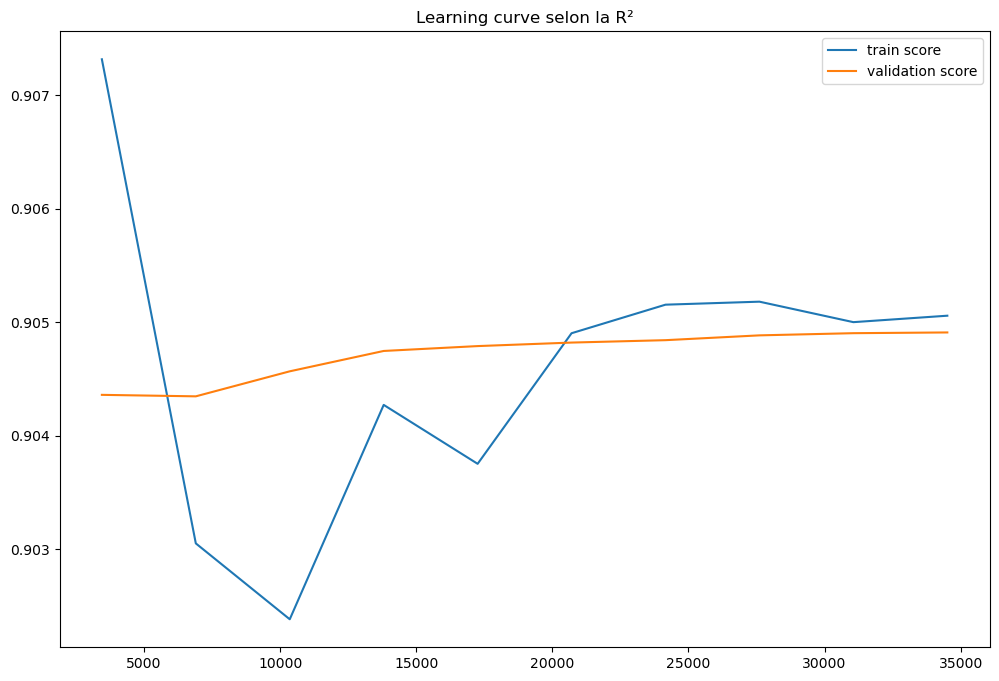

In [252]:
#VERIFICATION DES COURBES D'APPRENTISSAGE
N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                              cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1, 10))


#train_score = -train_scores
#val_score = -val_scores
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.title('Learning curve selon la R²')
plt.legend()

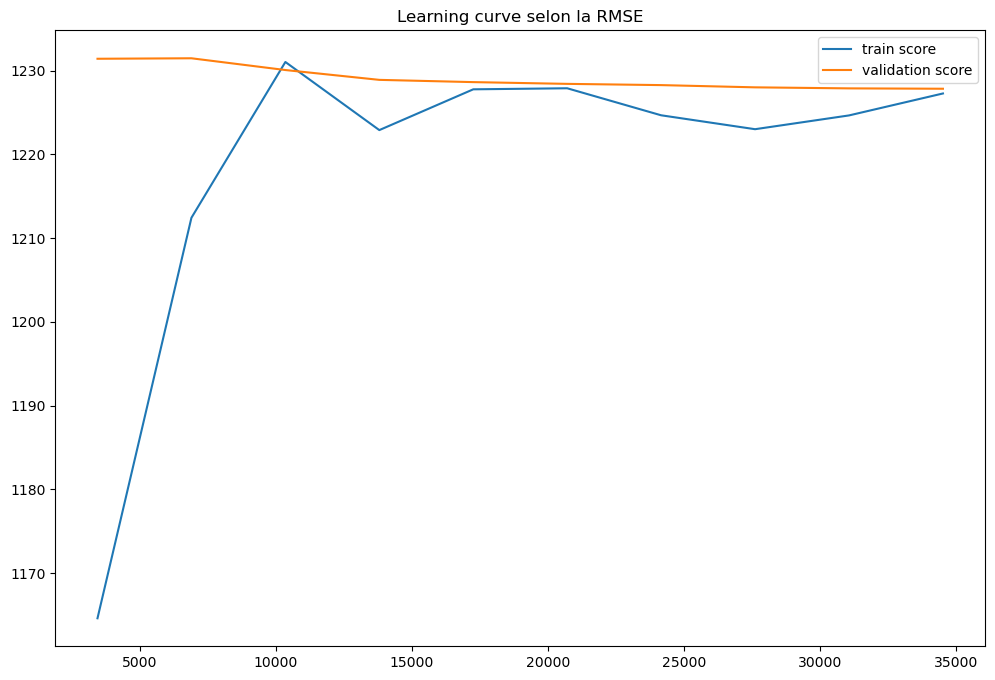

In [253]:
#VERIFICATION DES COURBES D'APPRENTISSAGE du modèle avec feature engineering
N, train_scores, val_scores = learning_curve(model, X_train, y_train, 
                                              cv=5, scoring='neg_mean_squared_error', 
                                             train_sizes=np.linspace(0.1, 1, 10))

train_score = np.sqrt(-train_scores)
val_score = np.sqrt(-val_scores)
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.title('Learning curve selon la RMSE')
plt.legend()

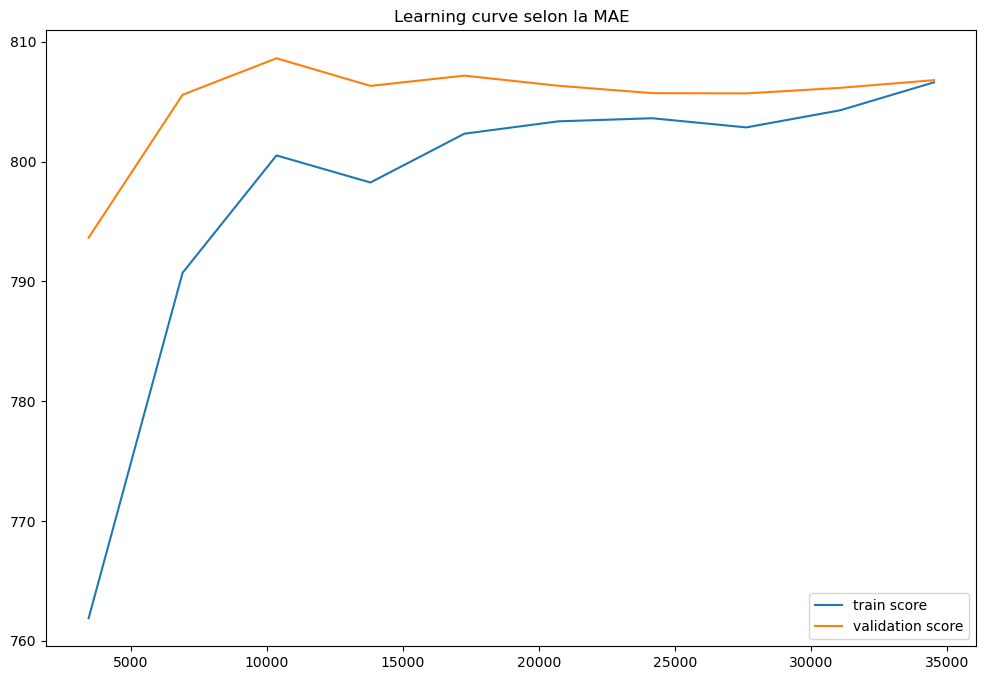

In [254]:
#VERIFICATION DES COURBES D'APPRENTISSAGE
N, train_scores, val_scores = learning_curve(model, X_train, y_train, 
                                              cv=5, scoring='neg_mean_absolute_error', 
                                             train_sizes=np.linspace(0.1, 1, 10))

train_score = -train_scores
val_score = -val_scores
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.title('Learning curve selon la MAE')
plt.legend()

**J'obtiens des performances intéressantes, très intéressantes**

c. *Suppression des outliers par la méthode IQR*

In [256]:
def suppression_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] <= upper_bound) & (data[column] >= lower_bound)]


In [257]:
df_po = suppression_outliers_iqr(df_p, 'price')
df_po

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[50388 rows x 10 columns]

In [258]:
trainset, testset = train_test_split(df_po, test_size = 0.2, random_state=42)
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

In [260]:
model = make_pipeline(StandardScaler(), LinearRegression())
result = evaluation(model, X_train, y_train, X_test, y_test)
result

Erreur absolue moyenne (MAPE): 0.3481614105959618
Erreur quadratique moyenne (MSE): 764505.6407661106
Erreur quadratique moyenne (RMSE): 874.3601321915991
Coefficient de détermination (R²): 0.8987073054461047


carat cut color clarity  depth  table     x     y     z  \
0       0.92   2     6       3   63.7   57.0  6.14  6.11  3.90   
1       1.01   5     4       2   61.5   57.0  6.50  6.42  3.97   
2       0.60   5     4       4   62.1   57.0  5.43  5.36  3.35   
3       0.27   5     2       6   61.6   55.0  4.17  4.21  2.58   
4       0.25   4     6       7   60.7   60.0  4.09  4.11  2.49   
...      ...  ..   ...     ...    ...    ...   ...   ...   ...   
10073   1.20   2     2       3   65.0   59.0  6.51  6.57  4.25   
10074   1.02   4     7       2   61.5   56.0  6.51  6.47  3.99   
10075   1.34   4     3       3   62.4   57.0  7.07  6.96  4.38   
10076   0.38   5     6       8   62.7   55.0  4.61  4.67  2.91   
10077   0.33   5     5       7   62.1   56.0  4.43  4.46  2.76   

       Valeur observée  Valeur prédite  
0                 4183     4312.548598  
1                 4299     4481.891921  
2                 1746     2144.167841  
3                  480      117.382484  
4                  576     1138.567010  
...                ...             ...  
10073             5040     5510.553901  
10074             4718     5179.237024  
10075             6814     7058.833671  
10076             1433     2591.350128  
10077              828     1600.663983  

[10078 rows x 11 columns]

In [261]:
y = result['Valeur prédite']
y[y<0].value_counts().sum()

614

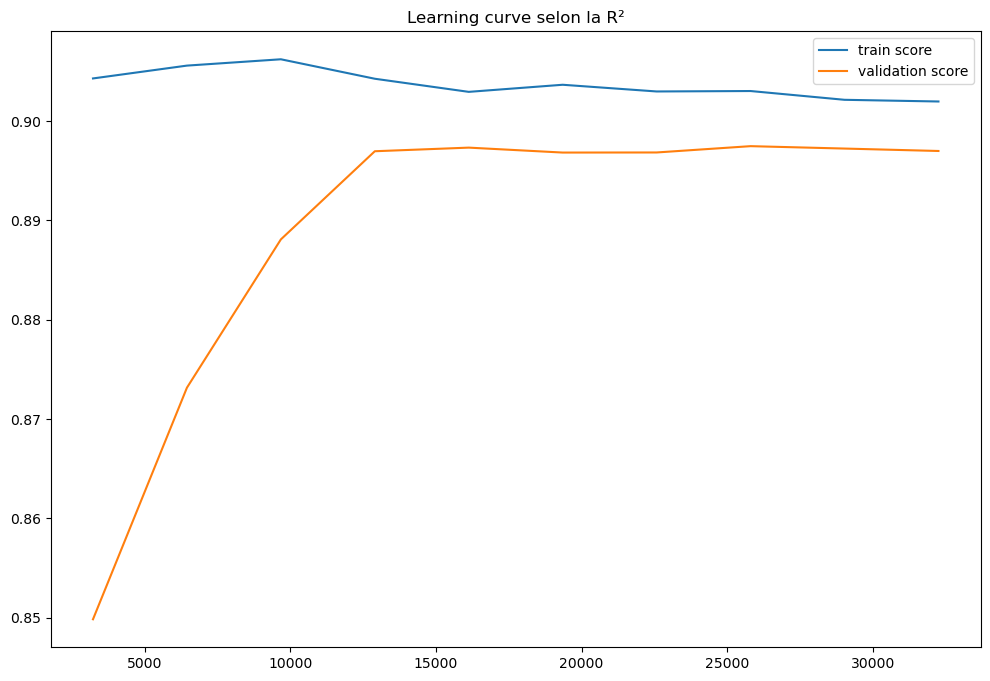

In [262]:
#VERIFICATION DES COURBES D'APPRENTISSAGE
N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                              cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1, 10))


#train_score = -train_scores
#val_score = -val_scores
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.title('Learning curve selon la R²')
plt.legend()

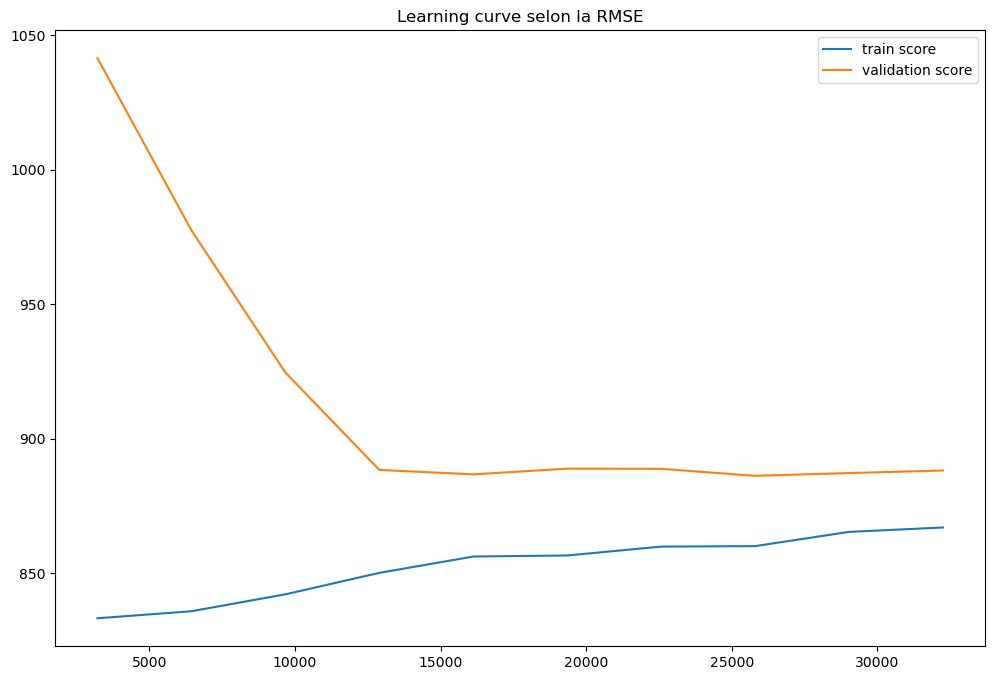

In [263]:
#VERIFICATION DES COURBES D'APPRENTISSAGE du modèle avec feature engineering
N, train_scores, val_scores = learning_curve(model, X_train, y_train, 
                                              cv=5, scoring='neg_mean_squared_error', 
                                             train_sizes=np.linspace(0.1, 1, 10))

train_score = np.sqrt(-train_scores)
val_score = np.sqrt(-val_scores)
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.title('Learning curve selon la RMSE')
plt.legend()

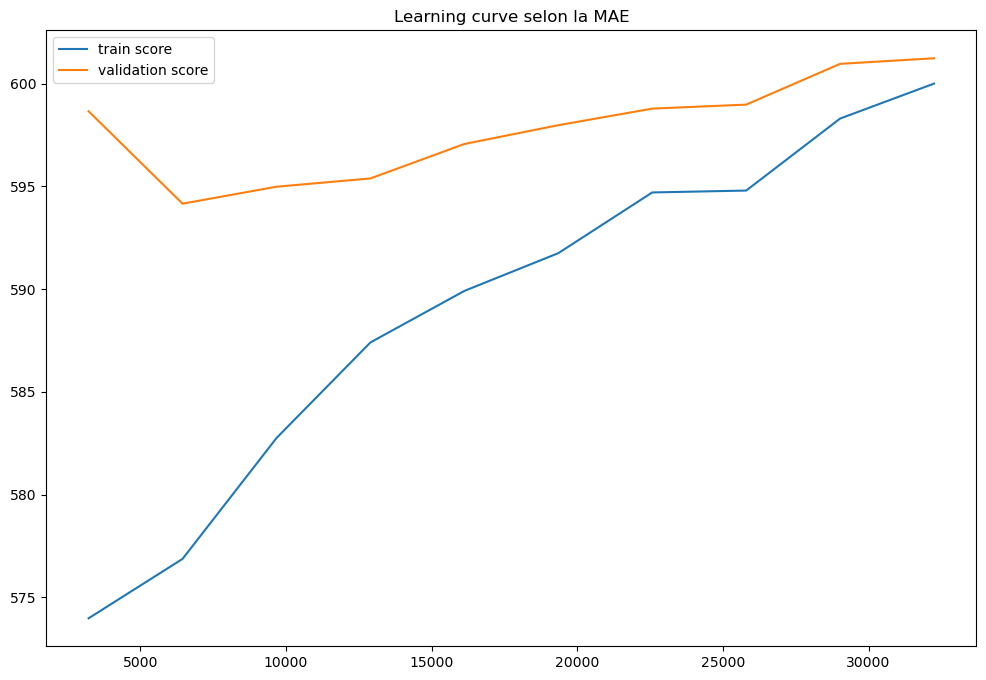

In [264]:
#VERIFICATION DES COURBES D'APPRENTISSAGE
N, train_scores, val_scores = learning_curve(model, X_train, y_train, 
                                              cv=5, scoring='neg_mean_absolute_error', 
                                             train_sizes=np.linspace(0.1, 1, 10))

train_score = -train_scores
val_score = -val_scores
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.title('Learning curve selon la MAE')
plt.legend()

**L'overfitting a considérablement diminué**

In [268]:
# Avec le dataset sans outliers et diminué de quelques variables

df_po_reduced = df_po[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'price']] 
trainset, testset = train_test_split(df_po_reduced, test_size = 0.2, random_state=42)
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

model = make_pipeline(StandardScaler(), LinearRegression())
result = evaluation(model, X_train, y_train, X_test, y_test)
result

Erreur absolue moyenne (MAPE): 0.34816432088392113
Erreur quadratique moyenne (MSE): 765880.6097243171
Erreur quadratique moyenne (RMSE): 875.1460505106088
Coefficient de détermination (R²): 0.898525129797845


carat cut color clarity  depth  table     x  Valeur observée  \
0       0.92   2     6       3   63.7   57.0  6.14             4183   
1       1.01   5     4       2   61.5   57.0  6.50             4299   
2       0.60   5     4       4   62.1   57.0  5.43             1746   
3       0.27   5     2       6   61.6   55.0  4.17              480   
4       0.25   4     6       7   60.7   60.0  4.09              576   
...      ...  ..   ...     ...    ...    ...   ...              ...   
10073   1.20   2     2       3   65.0   59.0  6.51             5040   
10074   1.02   4     7       2   61.5   56.0  6.51             4718   
10075   1.34   4     3       3   62.4   57.0  7.07             6814   
10076   0.38   5     6       8   62.7   55.0  4.61             1433   
10077   0.33   5     5       7   62.1   56.0  4.43              828   

       Valeur prédite  
0         4317.413763  
1         4492.470700  
2         2154.630328  
3          115.253156  
4         1139.165402  
...               ...  
10073     5498.565140  
10074     5185.600158  
10075     7075.832094  
10076     2585.051713  
10077     1598.887532  

[10078 rows x 9 columns]

In [269]:
y = result['Valeur prédite']
y[y<0].value_counts().sum()

613

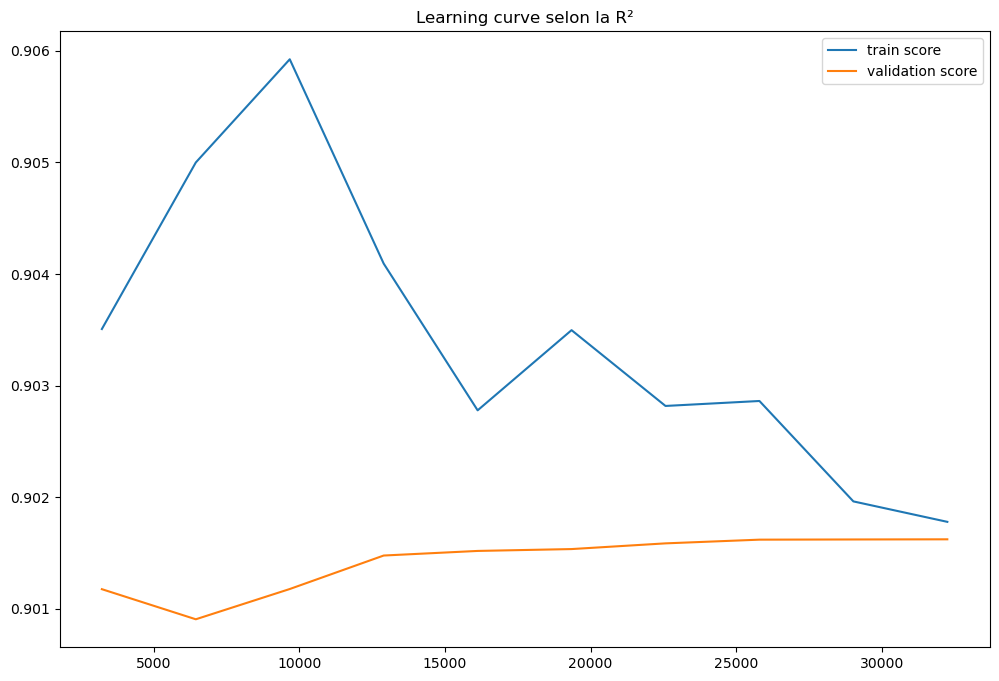

In [270]:
#VERIFICATION DES COURBES D'APPRENTISSAGE
N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                              cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1, 10))


#train_score = -train_scores
#val_score = -val_scores
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.title('Learning curve selon la R²')
plt.legend()

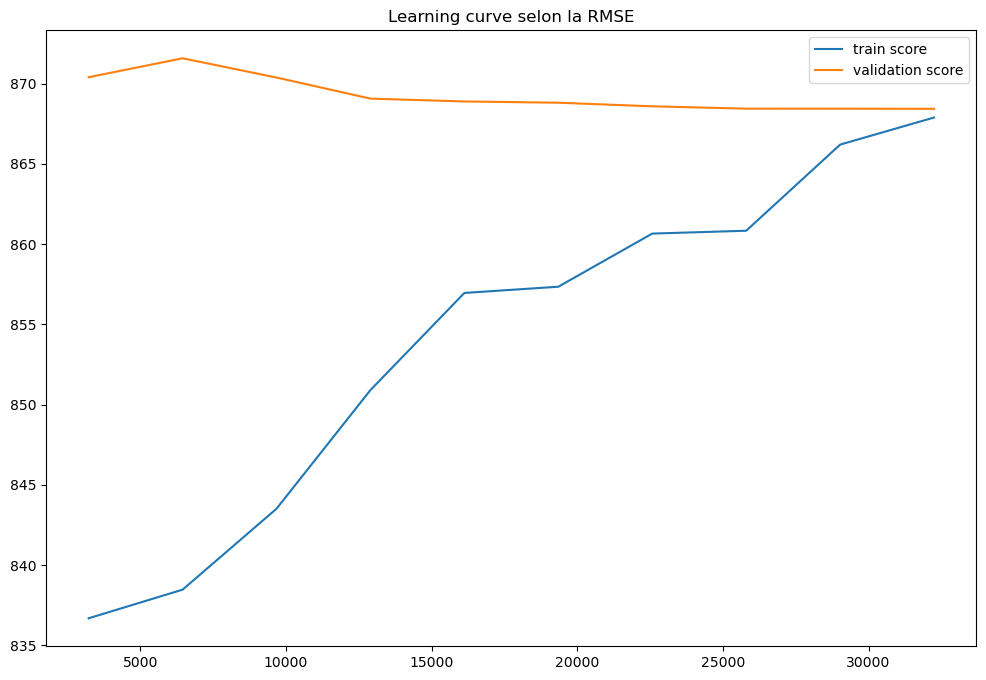

In [271]:
#VERIFICATION DES COURBES D'APPRENTISSAGE du modèle avec feature engineering
N, train_scores, val_scores = learning_curve(model, X_train, y_train, 
                                              cv=5, scoring='neg_mean_squared_error', 
                                             train_sizes=np.linspace(0.1, 1, 10))

train_score = np.sqrt(-train_scores)
val_score = np.sqrt(-val_scores)
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.title('Learning curve selon la RMSE')
plt.legend()

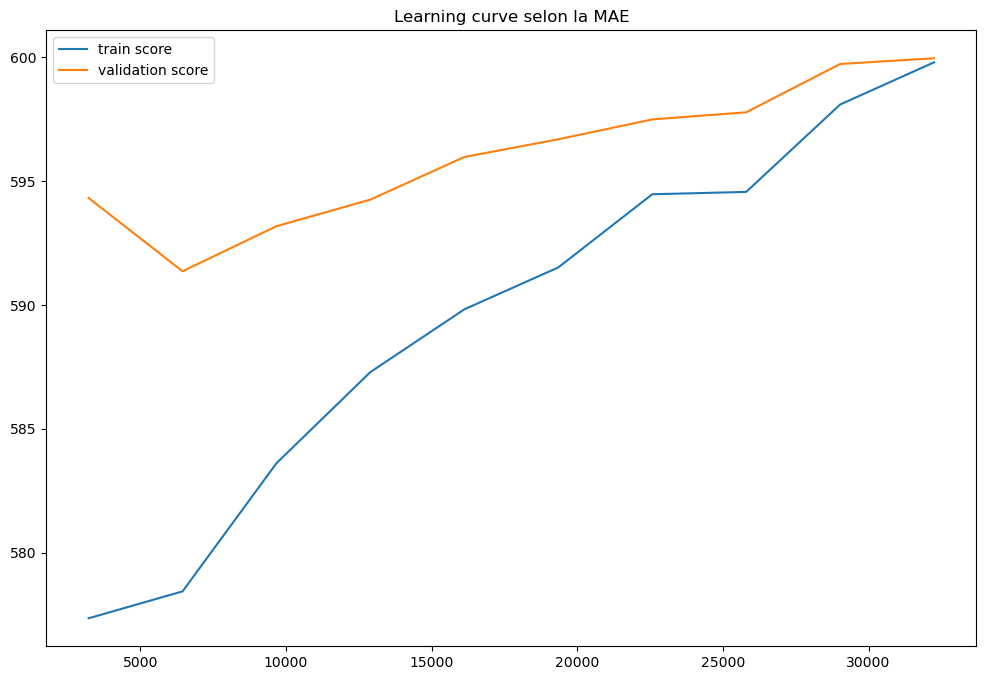

In [272]:
#VERIFICATION DES COURBES D'APPRENTISSAGE
N, train_scores, val_scores = learning_curve(model, X_train, y_train, 
                                              cv=5, scoring='neg_mean_absolute_error', 
                                             train_sizes=np.linspace(0.1, 1, 10))

train_score = -train_scores
val_score = -val_scores
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.title('Learning curve selon la MAE')
plt.legend()

Les performances de ce modèle sont plus intéressantes lorsqu'on travailler avec les features : *'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x'*. **Le risque d'overfitting diminue considérablement**. Mais c'est avec la suppression des outliers que le modèle performe mieux

**TEST D'HOMOSCEDASTICITE**

In [288]:
# Avec le dataset sans outliers et diminué de quelques variables

df_po_reduced = df_po[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'price']] 
trainset, testset = train_test_split(df_po_reduced, test_size = 0.2, random_state=42)
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

model = make_pipeline(StandardScaler(), LinearRegression())

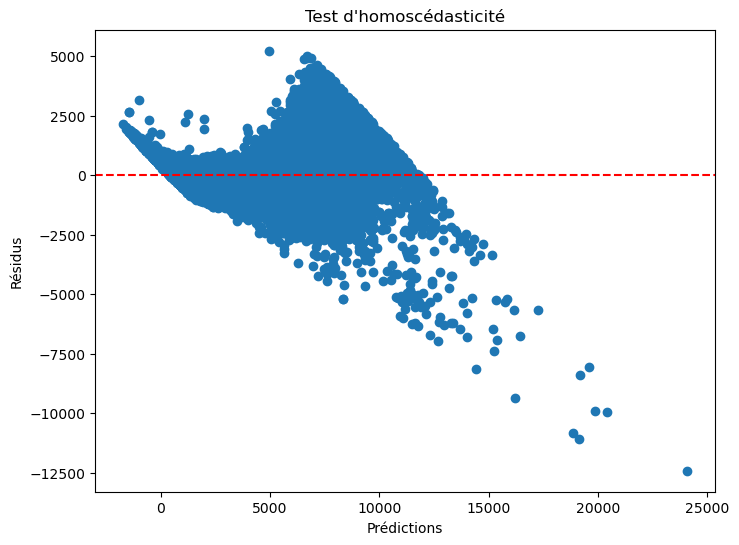

In [289]:
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
residuals = y_train - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Test d\'homoscédasticité')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.show()

Les résidus forment un cône. Le test d'homoscedasticité n'est pas vérifiée car le graphe fait resortir un cône bien visible

d. *Feature engineering : avec polynomial features*

Avec feature engineering sans supprimer les outliers, les performances du modèles étaient médiocres

In [303]:
trainset, testset = train_test_split(df_po, test_size = 0.2, random_state=42)
#trainset = feature_engineering(trainset)
#testset = feature_engineering(testset)

X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False),
                      LinearRegression())
result = evaluation(model, X_train, y_train, X_test, y_test)
result

Erreur absolue moyenne (MAPE): 0.15745289875699803
Erreur quadratique moyenne (MSE): 274766.01594468934
Erreur quadratique moyenne (RMSE): 524.1812815664914
Coefficient de détermination (R²): 0.9635950493458937


carat cut color clarity  depth  table     x     y     z  \
0       0.92   2     6       3   63.7   57.0  6.14  6.11  3.90   
1       1.01   5     4       2   61.5   57.0  6.50  6.42  3.97   
2       0.60   5     4       4   62.1   57.0  5.43  5.36  3.35   
3       0.27   5     2       6   61.6   55.0  4.17  4.21  2.58   
4       0.25   4     6       7   60.7   60.0  4.09  4.11  2.49   
...      ...  ..   ...     ...    ...    ...   ...   ...   ...   
10073   1.20   2     2       3   65.0   59.0  6.51  6.57  4.25   
10074   1.02   4     7       2   61.5   56.0  6.51  6.47  3.99   
10075   1.34   4     3       3   62.4   57.0  7.07  6.96  4.38   
10076   0.38   5     6       8   62.7   55.0  4.61  4.67  2.91   
10077   0.33   5     5       7   62.1   56.0  4.43  4.46  2.76   

       Valeur observée  Valeur prédite  
0                 4183     4211.455246  
1                 4299     4090.907684  
2                 1746     2079.509092  
3                  480      210.271810  
4                  576      770.214536  
...                ...             ...  
10073             5040     5015.501856  
10074             4718     4765.730197  
10075             6814     6869.624910  
10076             1433     1665.693748  
10077              828      988.644610  

[10078 rows x 11 columns]

In [304]:
y = result['Valeur prédite']
y[y<0].value_counts().sum()

52

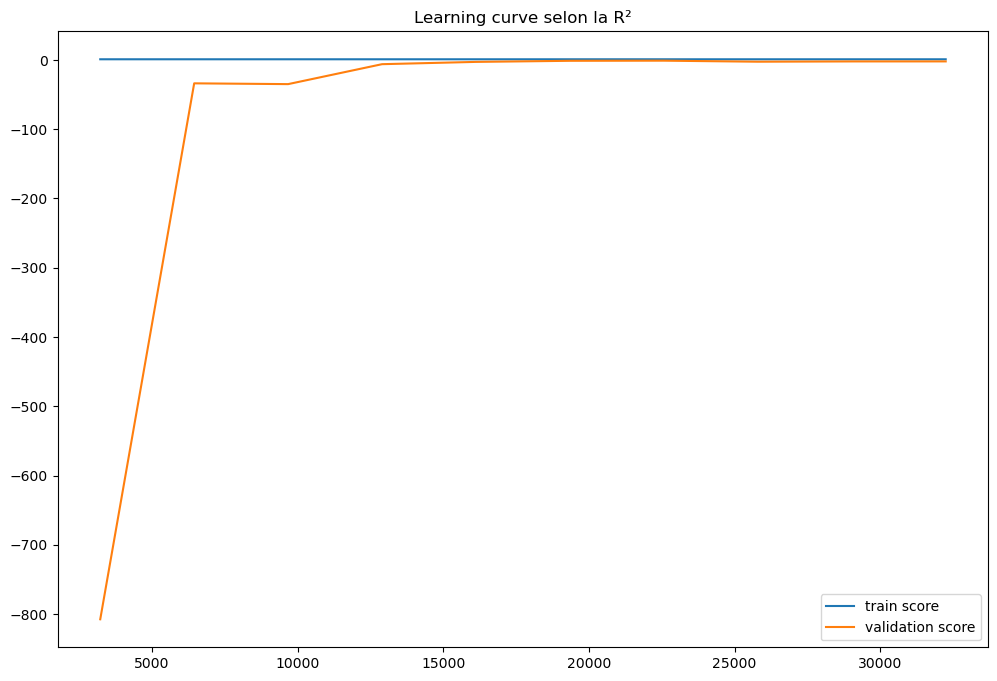

In [305]:
#VERIFICATION DES COURBES D'APPRENTISSAGE
N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                              cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1, 10))

plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.title('Learning curve selon la R²')
plt.legend()

In [306]:
# Avec le dataset sans outliers et diminué de quelques variables

df_po_reduced = df_po[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'price']] 
trainset, testset = train_test_split(df_po_reduced, test_size = 0.2, random_state=42)
#trainset = feature_engineering(trainset)
#testset = feature_engineering(testset)

X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)


model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False),
                      LinearRegression())
result = evaluation(model, X_train, y_train, X_test, y_test)
result

Erreur absolue moyenne (MAPE): 0.16948624244880175
Erreur quadratique moyenne (MSE): 286725.99686220003
Erreur quadratique moyenne (RMSE): 535.4680166566441
Coefficient de détermination (R²): 0.9620104191883794


carat cut color clarity  depth  table     x  Valeur observée  \
0       0.92   2     6       3   63.7   57.0  6.14             4183   
1       1.01   5     4       2   61.5   57.0  6.50             4299   
2       0.60   5     4       4   62.1   57.0  5.43             1746   
3       0.27   5     2       6   61.6   55.0  4.17              480   
4       0.25   4     6       7   60.7   60.0  4.09              576   
...      ...  ..   ...     ...    ...    ...   ...              ...   
10073   1.20   2     2       3   65.0   59.0  6.51             5040   
10074   1.02   4     7       2   61.5   56.0  6.51             4718   
10075   1.34   4     3       3   62.4   57.0  7.07             6814   
10076   0.38   5     6       8   62.7   55.0  4.61             1433   
10077   0.33   5     5       7   62.1   56.0  4.43              828   

       Valeur prédite  
0         4288.914508  
1         4152.191431  
2         1967.221650  
3          332.048182  
4          766.263450  
...               ...  
10073     5009.519807  
10074     4862.003658  
10075     7164.901112  
10076     1790.695493  
10077     1044.957557  

[10078 rows x 9 columns]

In [307]:
y = result['Valeur prédite']
y[y<0].value_counts().sum()

50

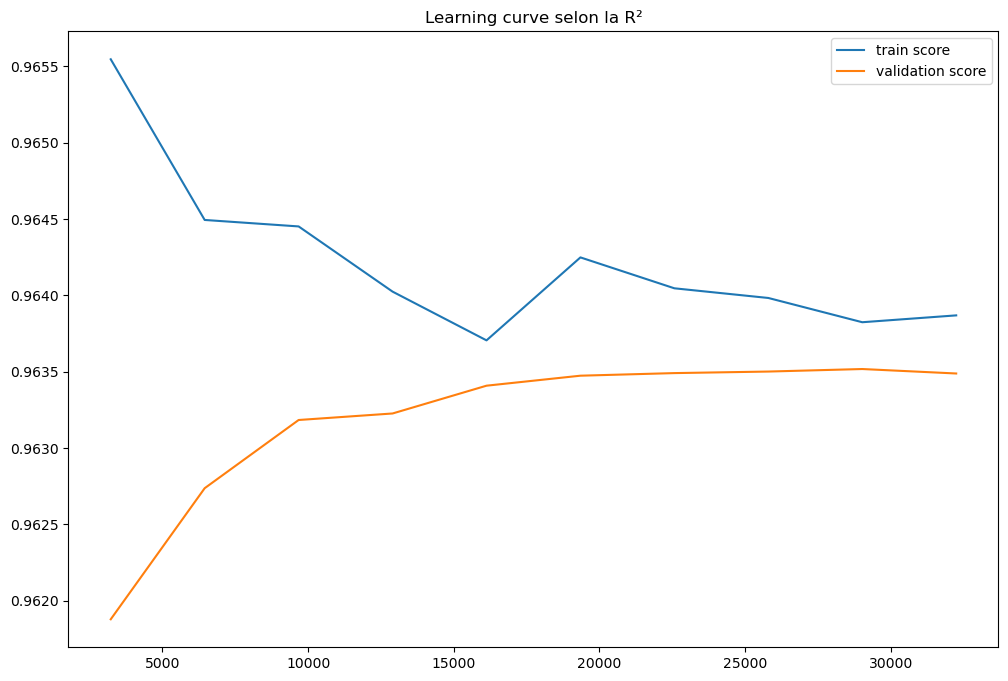

In [308]:
#VERIFICATION DES COURBES D'APPRENTISSAGE
N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                              cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1, 10))

plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.title('Learning curve selon la R²')
plt.legend()

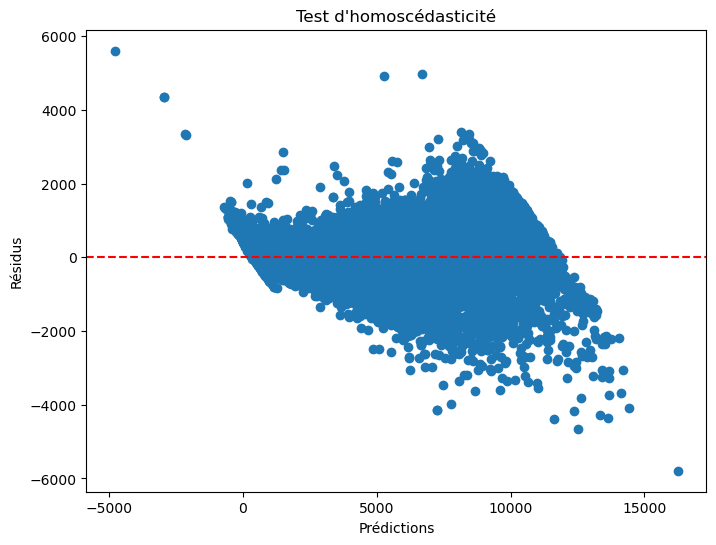

In [309]:
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
residuals = y_train - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Test d\'homoscédasticité')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.show()

**J'ai amélioré le modèle précédent avec polynomial features** et le résultat est stupéfiant. Je continue le travail. **Score r2 = 96%**

**2.3. REGRESSION LINEAIRE AVEC SCIPY**

In [310]:
X_train

carat cut color clarity  depth  table     x
12890   1.37   4     1       5   60.0   62.0  7.24
9117    1.01   4     5       2   61.7   60.0  6.36
12147   1.00   2     7       4   62.1   64.0  6.38
33941   0.29   5     3       5   62.4   54.0  4.23
27047   0.32   5     3       6   61.8   55.0  4.38
...      ...  ..   ...     ...    ...    ...   ...
11290   1.29   3     5       2   63.4   57.0  6.92
48281   0.53   5     7       4   61.4   56.0  5.23
41707   0.53   4     5       2   62.5   57.0  5.17
860     0.90   4     1       3   62.8   59.0  6.13
15803   1.21   3     6       3   62.9   58.0  6.78

[40310 rows x 7 columns]

In [276]:
import statsmodels.api as sm

# Fit du modèle linéaire
lr_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()   # méthode des moindres carres ordinaires (ordinary least squared)

# Obtention du tableau de résultats
results_table = lr_model.summary2().tables[1]
results_table

Coef.    Std.Err.           t         P>|t|       [0.025  \
const   -1272.524594  360.533534   -3.529560  4.167156e-04 -1979.178558   
carat    8093.528425   65.334503  123.878320  0.000000e+00  7965.471307   
cut        97.690540    4.715409   20.717299  7.562761e-95    88.448230   
color     231.624778    2.702971   85.692656  0.000000e+00   226.326893   
clarity   392.123408    2.927996  133.922128  0.000000e+00   386.384470   
depth     -37.521040    3.681606  -10.191487  2.316784e-24   -44.737072   
table     -17.054979    2.445767   -6.973265  3.144281e-12   -21.848737   
x        -204.459897   25.221579   -8.106546  5.353459e-16  -253.894767   

              0.975]  
const    -565.870629  
carat    8221.585543  
cut       106.932849  
color     236.922663  
clarity   397.862347  
depth     -30.305007  
table     -12.261220  
x        -155.025026

In [277]:
lr_model.summary2().tables[0]

0                 1                    2            3
0               Model:               OLS      Adj. R-squared:        0.902
1  Dependent Variable:             price                 AIC:  659898.1930
2                Date:  2025-03-30 01:35                 BIC:  659967.0278
3    No. Observations:             40310      Log-Likelihood:  -3.2994e+05
4            Df Model:                 7         F-statistic:    5.285e+04
5        Df Residuals:             40302  Prob (F-statistic):         0.00
6           R-squared:             0.902               Scale:   7.5352e+05

In [278]:
# Obtention des prédictions et des métriques d'évaluation
y_train_pred = lr_model.predict(sm.add_constant(X_train))
y_test_pred = lr_model.predict(sm.add_constant(X_test))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


In [279]:
# Construction du tableau de résultats

df_metrics = pd.DataFrame({
    'Métrique': ['R2', 'MSE', 'RMSE'],
    'Train': [r2_train, mse_train, rmse_train],
    'Test': [r2_test, mse_test, rmse_test]
})

print(df_metrics)



  Métrique          Train           Test
0       R2       0.901764       0.898525
1      MSE  753367.787684  765880.609724
2     RMSE     867.967619     875.146051


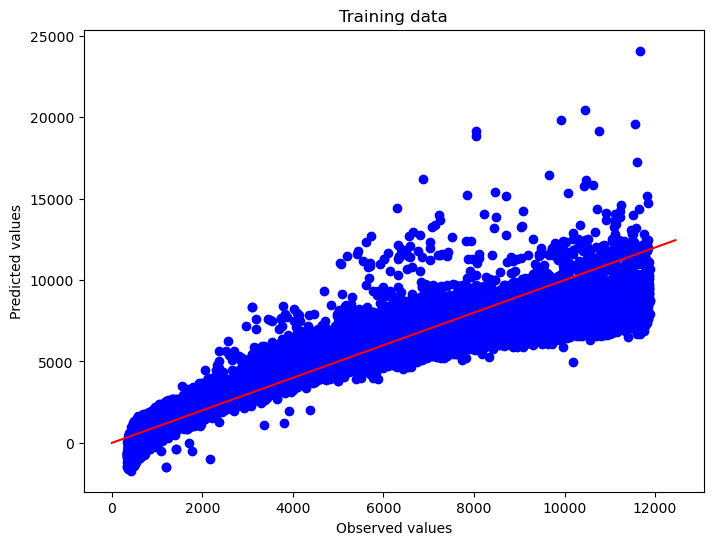

In [283]:
# Tracer les valeurs observées en fonction des valeurs prédites sur les données d'entraînement
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue')
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.title('Training data')
plt.plot(np.arange(0, 12500, 50), np.arange(0, 12500, 50), color='red')
plt.show()

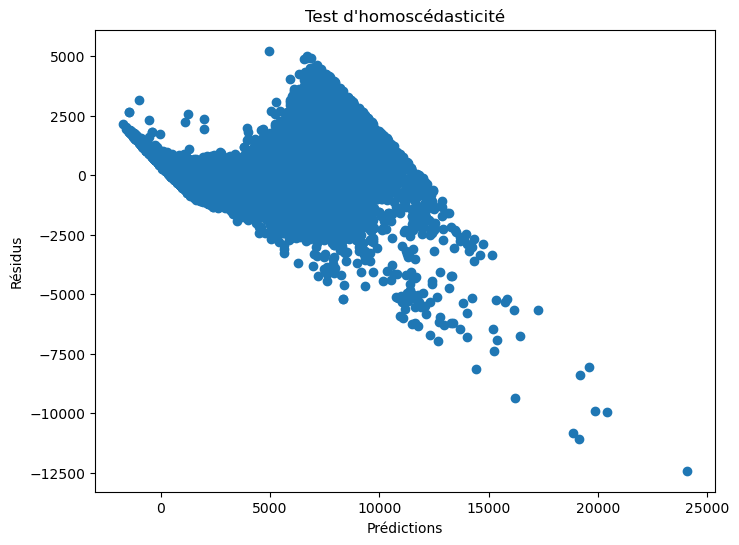

In [287]:
# Test d'homoscédasticité
y_train_pred = lr_model.predict(sm.add_constant(X_train))
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, residuals)
plt.title('Test d\'homoscédasticité')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.show()

e. *SUPPRESSION DES VALEURS ABERRANTES AVEC ISOLATION FOREST :* Cette méthode de suppression des valeurs aberrantes permet d'avoir de meilleures performances lorsqu'on utilise le modèle le plus performant qu'on a pu trouver jusqu'ici.

In [312]:
from sklearn.ensemble import IsolationForest

df_iso = encodage(df_p)
# Appliquer l'Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outlier_labels = iso_forest.fit_predict(df_iso)

# Ajouter les labels d'anomalie au DataFrame
df_iso['Outlier'] = outlier_labels

# Afficher les outliers
outliers = df_iso[df_iso['Outlier'] == -1]
print("Outliers détectés:")
print(outliers)

Outliers détectés:
       carat cut color clarity  depth  table  price     x     y     z  Outlier
0       0.23   5     6       2   61.5   55.0    326  3.95  3.98  2.43       -1
1       0.21   4     6       3   59.8   61.0    326  3.89  3.84  2.31       -1
2       0.23   2     6       5   56.9   65.0    327  4.05  4.07  2.31       -1
4       0.31   2     1       2   63.3   58.0    335  4.34  4.35  2.75       -1
5       0.24   3     1       6   62.8   57.0    336  3.94  3.96  2.48       -1
...      ...  ..   ...     ...    ...    ...    ...   ...   ...   ...      ...
53756   0.84   1     4       5   55.6   64.0   2724  6.42  6.32  3.54       -1
53757   0.72   1     5       4   55.4   64.0   2724  6.06  5.97  3.34       -1
53800   0.90   1     2       5   68.7   62.0   2732  5.83  5.79  3.99       -1
53863   1.00   1     2       2   66.8   56.0   2743  6.22  6.12  4.13       -1
53882   0.71   1     7       5   65.4   59.0   2747  5.62  5.58  3.66       -1

[5392 rows x 11 columns]


In [313]:
# Supprimer les outliers
df_clean_iso = df_iso[df_iso['Outlier'] == 1].drop(columns=['Outlier'])
df_clean_iso

carat cut color clarity  depth  table  price     x     y     z
3       0.29   4     2       4   62.4   58.0    334  4.20  4.23  2.63
7       0.26   3     3       3   61.9   55.0    337  4.07  4.11  2.53
13      0.31   5     1       2   62.2   54.0    344  4.35  4.37  2.71
15      0.32   4     6       1   60.9   58.0    345  4.38  4.42  2.68
16      0.30   5     2       2   62.0   54.0    348  4.31  4.34  2.68
...      ...  ..   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72   5     7       3   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72   2     7       3   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70   3     7       3   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86   4     3       2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75   5     7       2   62.2   55.0   2757  5.83  5.87  3.64

[48528 rows x 10 columns]

In [316]:
trainset, testset = train_test_split(df_clean_iso, test_size = 0.2, random_state=42)

X_train = trainset.drop('price', axis=1)
y_train = trainset['price']

#X_train, y_train
X_test = testset.drop('price', axis=1)
y_test = testset['price']

#X_test, y_test

model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False),
                      LinearRegression())
result = evaluation(model, X_train, y_train, X_test, y_test)
result

Erreur absolue moyenne (MAPE): 0.1938213538565706
Erreur quadratique moyenne (MSE): 64351879.8961119
Erreur quadratique moyenne (RMSE): 8021.962346964233
Coefficient de détermination (R²): -5.821351443981566


carat cut color clarity  depth  table     x     y     z  \
0      1.02   4     3       4   61.2   58.0  6.50  6.47  3.97   
1      0.32   5     7       4   61.0   57.0  4.46  4.42  2.71   
2      1.00   4     6       2   60.4   60.0  6.49  6.46  3.91   
3      0.25   3     5       5   59.7   57.0  4.13  4.21  2.49   
4      0.71   1     2       4   64.7   60.0  5.54  5.46  3.56   
...     ...  ..   ...     ...    ...    ...   ...   ...   ...   
9701   0.40   4     7       3   61.7   58.0  4.70  4.74  2.91   
9702   0.70   3     5       4   61.6   58.0  5.70  5.72  3.52   
9703   0.30   4     7       3   62.4   60.0  4.23  4.26  2.65   
9704   0.45   5     5       3   60.8   56.0  4.97  4.93  3.01   
9705   0.31   4     5       4   61.5   56.0  4.41  4.34  2.69   

      Valeur observée  Valeur prédite  
0                5312     5041.349074  
1                 972      695.350449  
2                4648     4357.348895  
3                 436      431.330259  
4                2208     2038.482808  
...               ...             ...  
9701              772      524.145130  
9702             2362     2805.707628  
9703              552      282.964468  
9704              930     1106.166346  
9705              802      826.924266  

[9706 rows x 11 columns]

In [318]:
y = result['Valeur prédite']
y[y<0].value_counts().sum()

47

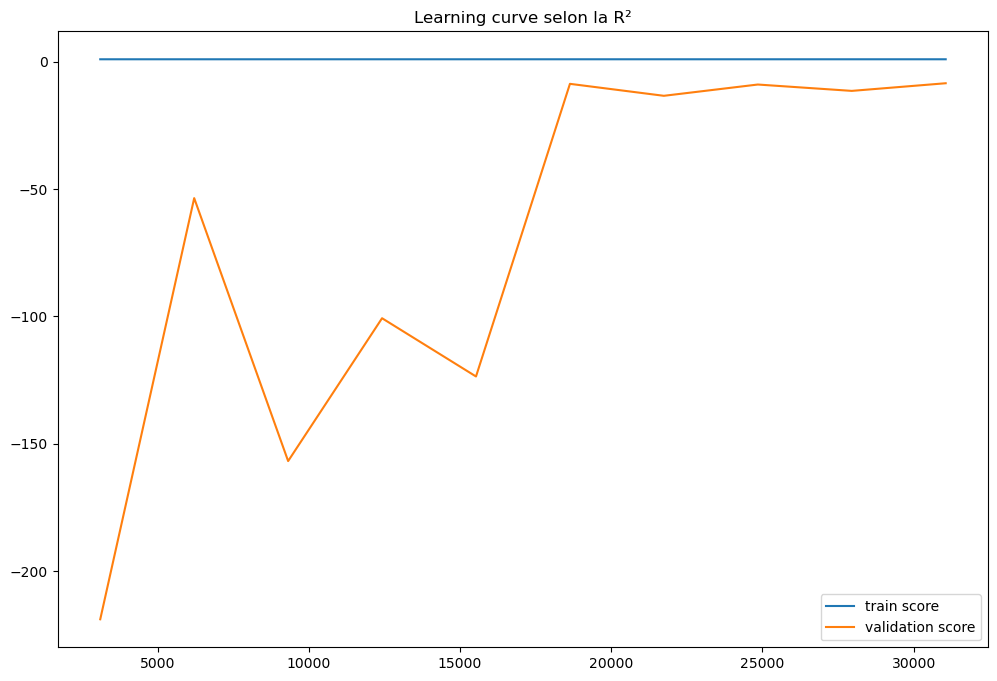

In [319]:
#VERIFICATION DES COURBES D'APPRENTISSAGE
N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                              cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1, 10))

plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.title('Learning curve selon la R²')
plt.legend()

In [320]:
df_clean_iso_reduced = df_clean_iso[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'price']] 
trainset, testset = train_test_split(df_clean_iso_reduced, test_size = 0.2, random_state=42)

X_train = trainset.drop('price', axis=1)
y_train = trainset['price']

#X_train, y_train
X_test = testset.drop('price', axis=1)
y_test = testset['price']

#X_test, y_test

model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False),
                      LinearRegression())
result = evaluation(model, X_train, y_train, X_test, y_test)
result

Erreur absolue moyenne (MAPE): 0.16327065680624184
Erreur quadratique moyenne (MSE): 283634.184437614
Erreur quadratique moyenne (RMSE): 532.5731728482143
Coefficient de détermination (R²): 0.9699345464856739


carat cut color clarity  depth  table     x  Valeur observée  \
0      1.02   4     3       4   61.2   58.0  6.50             5312   
1      0.32   5     7       4   61.0   57.0  4.46              972   
2      1.00   4     6       2   60.4   60.0  6.49             4648   
3      0.25   3     5       5   59.7   57.0  4.13              436   
4      0.71   1     2       4   64.7   60.0  5.54             2208   
...     ...  ..   ...     ...    ...    ...   ...              ...   
9701   0.40   4     7       3   61.7   58.0  4.70              772   
9702   0.70   3     5       4   61.6   58.0  5.70             2362   
9703   0.30   4     7       3   62.4   60.0  4.23              552   
9704   0.45   5     5       3   60.8   56.0  4.97              930   
9705   0.31   4     5       4   61.5   56.0  4.41              802   

      Valeur prédite  
0        5047.723973  
1         550.537386  
2        4344.677248  
3         551.040617  
4        2034.102302  
...              ...  
9701      647.698428  
9702     2820.260373  
9703      368.505348  
9704     1054.975050  
9705      608.343097  

[9706 rows x 9 columns]

In [321]:
y = result['Valeur prédite']
y[y<0].value_counts().sum()

43

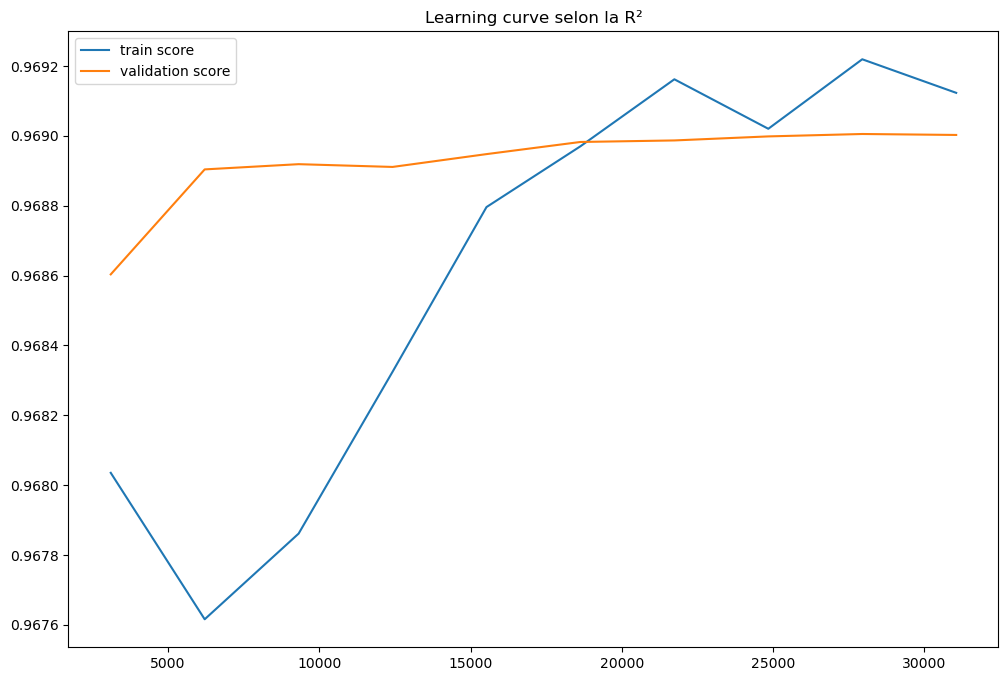

In [322]:
#VERIFICATION DES COURBES D'APPRENTISSAGE
N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                              cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1, 10))

plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.title('Learning curve selon la R²')
plt.legend()

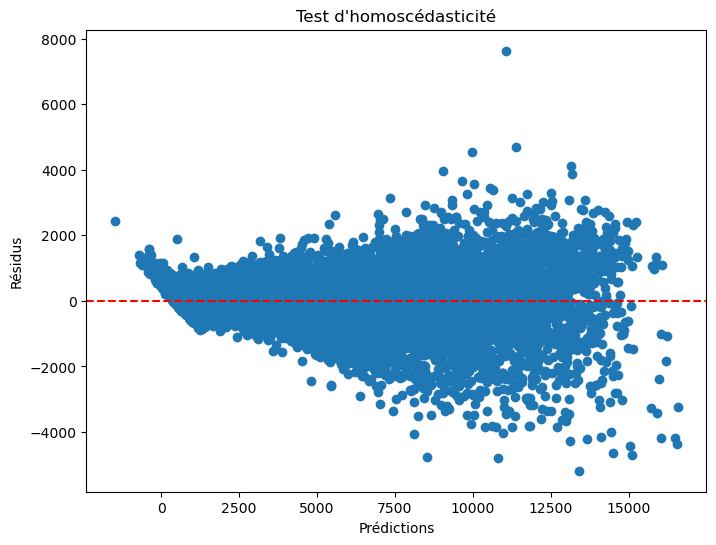

In [327]:
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
residuals = y_train - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Test d\'homoscédasticité')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.show()

**J'ai amélioré le modèle précédent avec polynomial features et isolation forest** et le résultat est stupéfiant. Je continue le travail. **Score r2 = 97%**

In [328]:
df_clean_iso_reduced = df_clean_iso[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'price']] 
trainset, testset = train_test_split(df_clean_iso_reduced, test_size = 0.2, random_state=42)

X_train = trainset.drop('price', axis=1)
y_train = trainset['price']

#X_train, y_train
X_test = testset.drop('price', axis=1)
y_test = testset['price']

#X_test, y_test

model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), 
                      StandardScaler(), LinearRegression())
result = evaluation(model, X_train, y_train, X_test, y_test)
result

Erreur absolue moyenne (MAPE): 0.16327065680623337
Erreur quadratique moyenne (MSE): 283634.1844376145
Erreur quadratique moyenne (RMSE): 532.5731728482149
Coefficient de détermination (R²): 0.9699345464856738


carat cut color clarity  depth  table     x  Valeur observée  \
0      1.02   4     3       4   61.2   58.0  6.50             5312   
1      0.32   5     7       4   61.0   57.0  4.46              972   
2      1.00   4     6       2   60.4   60.0  6.49             4648   
3      0.25   3     5       5   59.7   57.0  4.13              436   
4      0.71   1     2       4   64.7   60.0  5.54             2208   
...     ...  ..   ...     ...    ...    ...   ...              ...   
9701   0.40   4     7       3   61.7   58.0  4.70              772   
9702   0.70   3     5       4   61.6   58.0  5.70             2362   
9703   0.30   4     7       3   62.4   60.0  4.23              552   
9704   0.45   5     5       3   60.8   56.0  4.97              930   
9705   0.31   4     5       4   61.5   56.0  4.41              802   

      Valeur prédite  
0        5047.723973  
1         550.537386  
2        4344.677248  
3         551.040617  
4        2034.102302  
...              ...  
9701      647.698428  
9702     2820.260373  
9703      368.505348  
9704     1054.975050  
9705      608.343097  

[9706 rows x 9 columns]

Avec ou sans standardscaler les performances sont les mêmes

Pour la suite, je vais travailler avec :

    - le dataset nettoyée ou non des valeurs aberrantes avec isolation forest
    - linear regression + polynomial features
    - les autres modèles

## 3. MODELISATION

#### 3.1. AVEC LE DATASET ORIGINAL

In [343]:
df_m = diamond.copy()

# Rétirer les valeurs aberrantes
df_m = df_m.drop(df_m[df_m["z"]==0].index)

df_m = df_m[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'price']]
df_m

carat        cut color clarity  depth  table     x  price
0       0.23      Ideal     E     SI2   61.5   55.0  3.95    326
1       0.21    Premium     E     SI1   59.8   61.0  3.89    326
2       0.23       Good     E     VS1   56.9   65.0  4.05    327
3       0.29    Premium     I     VS2   62.4   58.0  4.20    334
4       0.31       Good     J     SI2   63.3   58.0  4.34    335
...      ...        ...   ...     ...    ...    ...   ...    ...
53935   0.72      Ideal     D     SI1   60.8   57.0  5.75   2757
53936   0.72       Good     D     SI1   63.1   55.0  5.69   2757
53937   0.70  Very Good     D     SI1   62.8   60.0  5.66   2757
53938   0.86    Premium     H     SI2   61.0   58.0  6.15   2757
53939   0.75      Ideal     D     SI2   62.2   55.0  5.83   2757

[53920 rows x 8 columns]

In [344]:
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(df_m, test_size = 0.2, random_state=42)
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

In [332]:
preprocessor = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), StandardScaler())

In [346]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
#from sklearn.model_selection import cross_val_score

alphas = np.linspace(0.1, 1, 10)
ridge_cv = RidgeCV(alphas=alphas, cv=4)
ridge_cv.fit(X_train, y_train)
print(f'Best alpha for Ridge : {ridge_cv.alpha_}')


Best alpha for Ridge : 0.8


In [347]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

alphas = np.linspace(0.1, 1, 10)
lasso_cv = LassoCV(alphas=alphas, cv=4, max_iter=2000)
lasso_cv.fit(X_train, y_train)
print(f'Best alpha for Lasso : {lasso_cv.alpha_}')

## Le modèle ne converge pas sur ces données pour 0.1 mais pour la valeur 1

Best alpha for Lasso : 0.1


In [348]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNetCV

alphas = np.linspace(0.1, 1, 10)
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=4)
elasticnet_cv.fit(X_train, y_train)
print(f'Best alpha for ElasticNet : {elasticnet_cv.alpha_}')

## Le modèle ne converge pas sur ces données pour 0.1 mais pour la valeur 1

Best alpha for ElasticNet : 0.1


In [354]:
#help(SGDRegressor)

Je travaille avec standard scaler car le dataset contient encore des outliers. et polynomial est très mauvais lorsqu'il y a les outliers

In [355]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet

lin_reg = make_pipeline(StandardScaler(), LinearRegression())
sgdregressor = make_pipeline(StandardScaler(), SGDRegressor(fit_intercept = True, penalty= None, eta0=0.001, 
                                                        alpha=0.01,max_iter = 2000, random_state=42))
ridge = make_pipeline(StandardScaler(), Ridge(alpha=0.8,random_state = 42))
lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.1, random_state = 42))
elasticnet = make_pipeline(StandardScaler(), ElasticNet(alpha=0.1, l1_ratio=0.5, random_state = 42, max_iter = 2000))

1_LinearRegression
Erreur absolue moyenne (MAPE): 0.4299148915513285
Erreur quadratique moyenne (MSE): 1356518.7279667787
Erreur quadratique moyenne (RMSE): 1164.6968395109427
Coefficient de détermination (R²): 0.9153865465745725
2_SGDRegressor
Erreur absolue moyenne (MAPE): 0.4338496662704378
Erreur quadratique moyenne (MSE): 1360294.5570993598
Erreur quadratique moyenne (RMSE): 1166.3166624460785
Coefficient de détermination (R²): 0.9151510275685572
3_Ridge_Regressor
Erreur absolue moyenne (MAPE): 0.4299814635301264
Erreur quadratique moyenne (MSE): 1356617.484524694
Erreur quadratique moyenne (RMSE): 1164.7392345605492
Coefficient de détermination (R²): 0.9153803865907542
4_Lasso_Regressor
Erreur absolue moyenne (MAPE): 0.4300124312107878
Erreur quadratique moyenne (MSE): 1356700.1026302278
Erreur quadratique moyenne (RMSE): 1164.774700373522
Coefficient de détermination (R²): 0.9153752332500147
5_ElasticNet
Erreur absolue moyenne (MAPE): 0.4856712914151905
Erreur quadratique moyenn

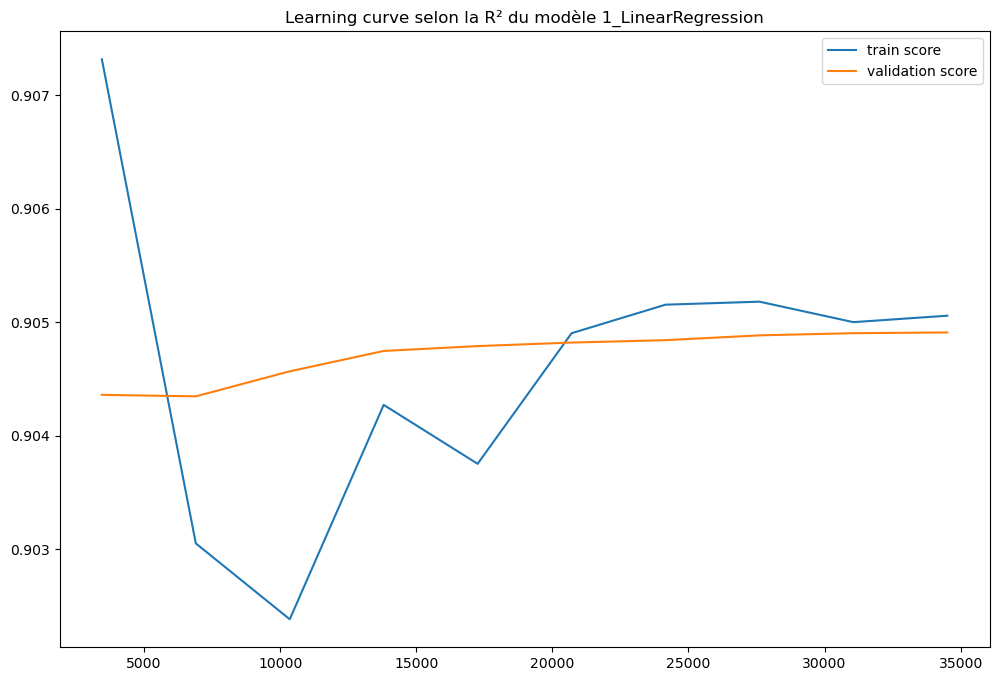

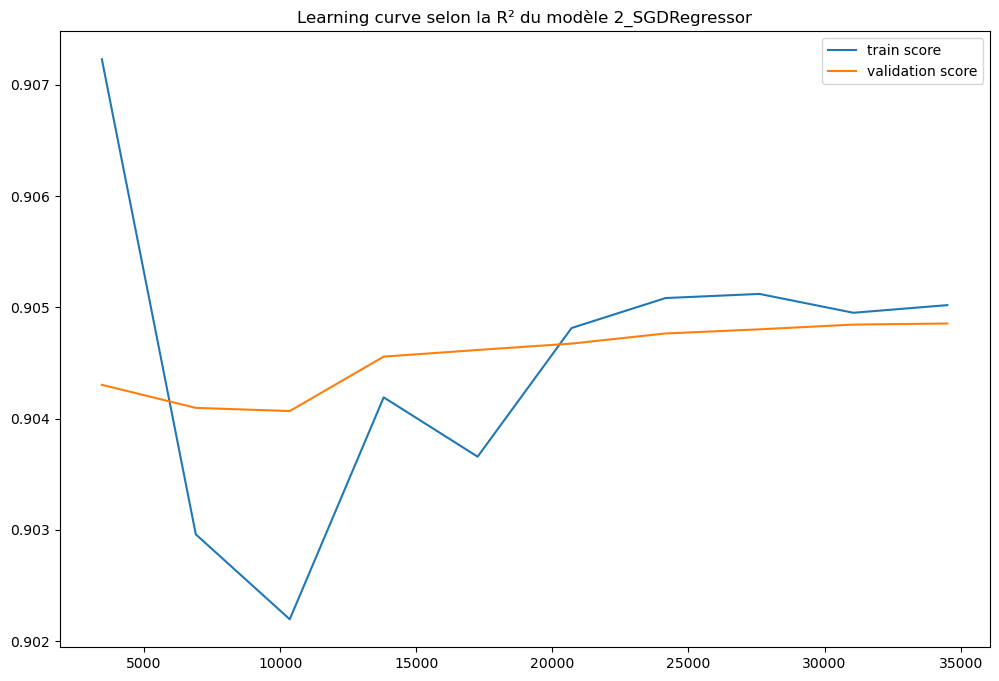

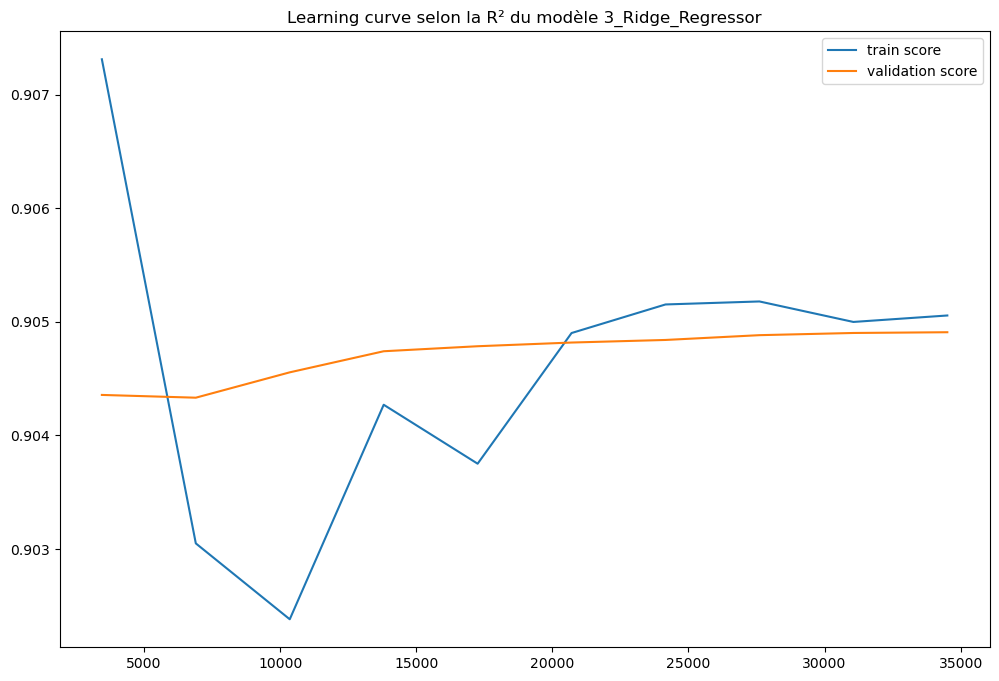

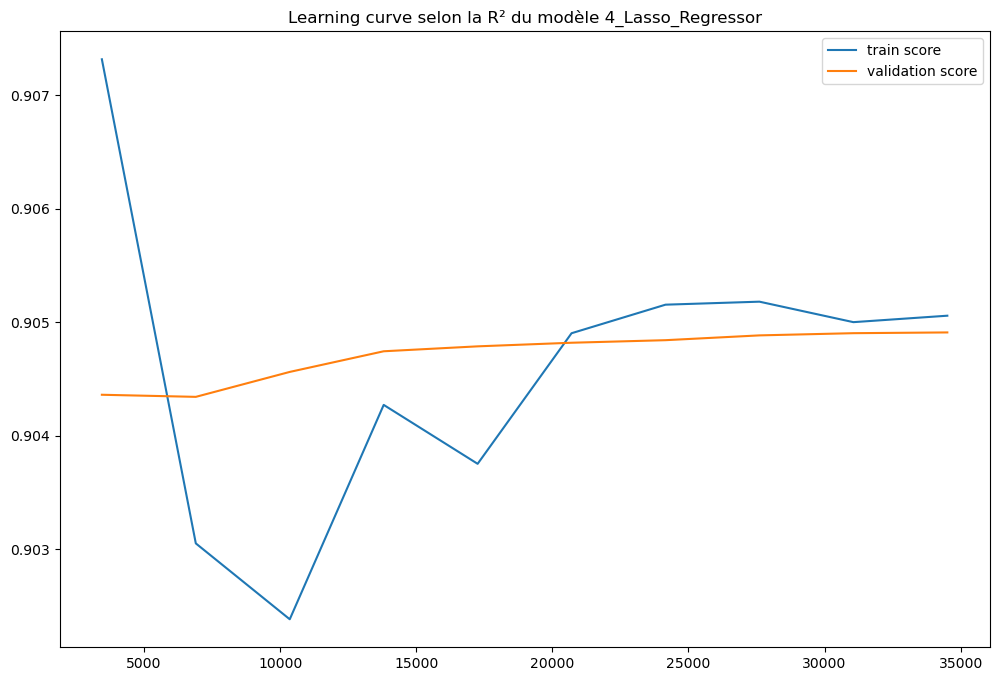

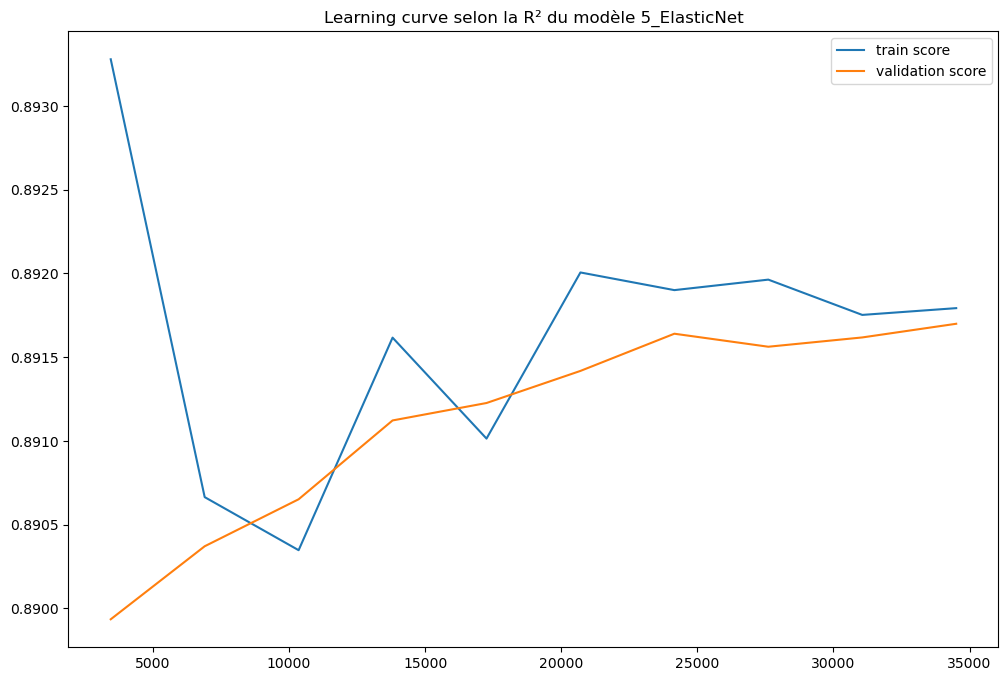

In [356]:
dict_of_models = {
    '1_LinearRegression' : lin_reg,
    '2_SGDRegressor' : sgdregressor,
    '3_Ridge_Regressor' : ridge,
    '4_Lasso_Regressor' : lasso,
    '5_ElasticNet' : elasticnet
}

for name, model in dict_of_models.items():
    print(name)
    evaluation(model, X_train, y_train, X_test, y_test)
    N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                              cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1, 10))

    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.title(f'Learning curve selon la R² du modèle {name}')
    plt.legend()

Maintenant je peux nettoyer le dataset et utiliser le utiliser le polynome

## MODELES AVEC LE DATASET SANS OUTLIERS

    - Linear Regression : avec polynôme de dégré 4 et réduction des features. Score R2 = 98%
    - SGDRegressor : 'alpha': 0.01, 'eta0': 0.01, 'fit_intercept': True, 'max_iter': 1000, 'penalty': 'l1', et réduction des features. Score R2 = 97%
    
Mais l'hypothèse de **multicolinéarité** montre que les features utilisés sont trop corrélés entre eux. Ce qui rend ces deux modèles ininterprétables. Il va falloir refaire le travail.

In [423]:
df_clean_iso_reduced = df_clean_iso[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'price']] 
trainset, testset = train_test_split(df_clean_iso_reduced, test_size = 0.2, random_state=42)

X_train = trainset.drop('price', axis=1)
y_train = trainset['price']

#X_train, y_train
X_test = testset.drop('price', axis=1)
y_test = testset['price']

#X_test, y_test

In [424]:
X_test

carat cut color clarity  depth  table     x
12722   1.02   4     3       4   61.2   58.0  6.50
37155   0.32   5     7       4   61.0   57.0  4.46
9675    1.00   4     6       2   60.4   60.0  6.49
29280   0.25   3     5       5   59.7   57.0  4.13
50103   0.71   1     2       4   64.7   60.0  5.54
...      ...  ..   ...     ...    ...    ...   ...
31757   0.40   4     7       3   61.7   58.0  4.70
51331   0.70   3     5       4   61.6   58.0  5.70
53284   0.30   4     7       3   62.4   60.0  4.23
36179   0.45   5     5       3   60.8   56.0  4.97
32704   0.31   4     5       4   61.5   56.0  4.41

[9706 rows x 7 columns]

In [367]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet

lin_reg = make_pipeline(preprocessor, LinearRegression())
sgdregressor = make_pipeline(preprocessor, SGDRegressor(fit_intercept = True, penalty= None, eta0=0.001, 
                                                        alpha=0.01, max_iter = 2000, random_state=42))
ridge = make_pipeline(preprocessor, Ridge(alpha=0.8,random_state = 42))
lasso = make_pipeline(preprocessor, Lasso(alpha=0.1, max_iter = 2000, random_state = 42))
elasticnet = make_pipeline(preprocessor, ElasticNet(alpha=0.1, l1_ratio=0.5, random_state = 42, max_iter = 2000))

1_LinearRegression
Erreur absolue moyenne (MAPE): 0.16327065680623337
Erreur quadratique moyenne (MSE): 283634.1844376145
Erreur quadratique moyenne (RMSE): 532.5731728482149
Coefficient de détermination (R²): 0.9699345464856738
2_SGDRegressor
Erreur absolue moyenne (MAPE): 0.17619189628378065
Erreur quadratique moyenne (MSE): 301090.47433695936
Erreur quadratique moyenne (RMSE): 548.7171168616479
Coefficient de détermination (R²): 0.9680841656031931
3_Ridge_Regressor
Erreur absolue moyenne (MAPE): 0.1653468061683439
Erreur quadratique moyenne (MSE): 283673.69657528336
Erreur quadratique moyenne (RMSE): 532.6102670577083
Coefficient de détermination (R²): 0.9699303581670454
4_Lasso_Regressor


C:\Users\SOP TELECOM\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.506e+09, tolerance: 3.653e+07
  model = cd_fast.enet_coordinate_descent(


Erreur absolue moyenne (MAPE): 0.16872615000807475
Erreur quadratique moyenne (MSE): 288475.6446668535
Erreur quadratique moyenne (RMSE): 537.099287531508
Coefficient de détermination (R²): 0.9694213477760322


C:\Users\SOP TELECOM\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.319e+08, tolerance: 2.860e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\SOP TELECOM\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.917e+08, tolerance: 5.798e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\SOP TELECOM\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\SOP TELECOM\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.422e+09, tolerance: 1.148e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\SOP TELECOM\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.780e+09, tolerance: 1.452e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\SOP TELECOM\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\SOP TELECOM\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.520e+09, tolerance: 2.035e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\SOP TELECOM\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.899e+09, tolerance: 2.324e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\SOP TELECOM\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

5_ElasticNet
Erreur absolue moyenne (MAPE): 0.20413184117122304
Erreur quadratique moyenne (MSE): 413284.51875870785
Erreur quadratique moyenne (RMSE): 642.8720858450052
Coefficient de détermination (R²): 0.9561915059301901


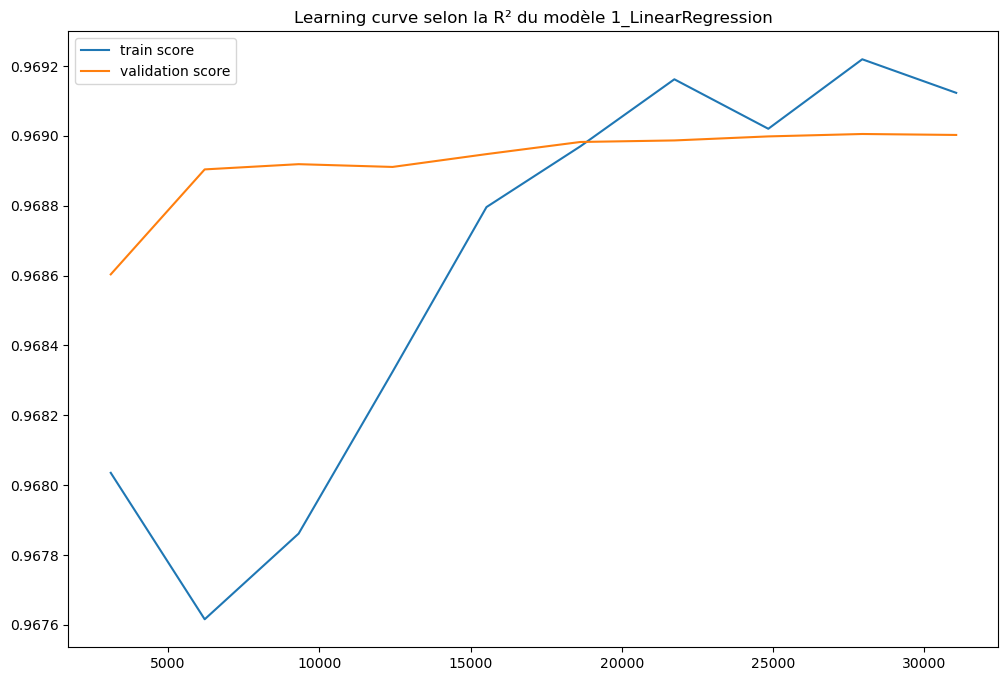

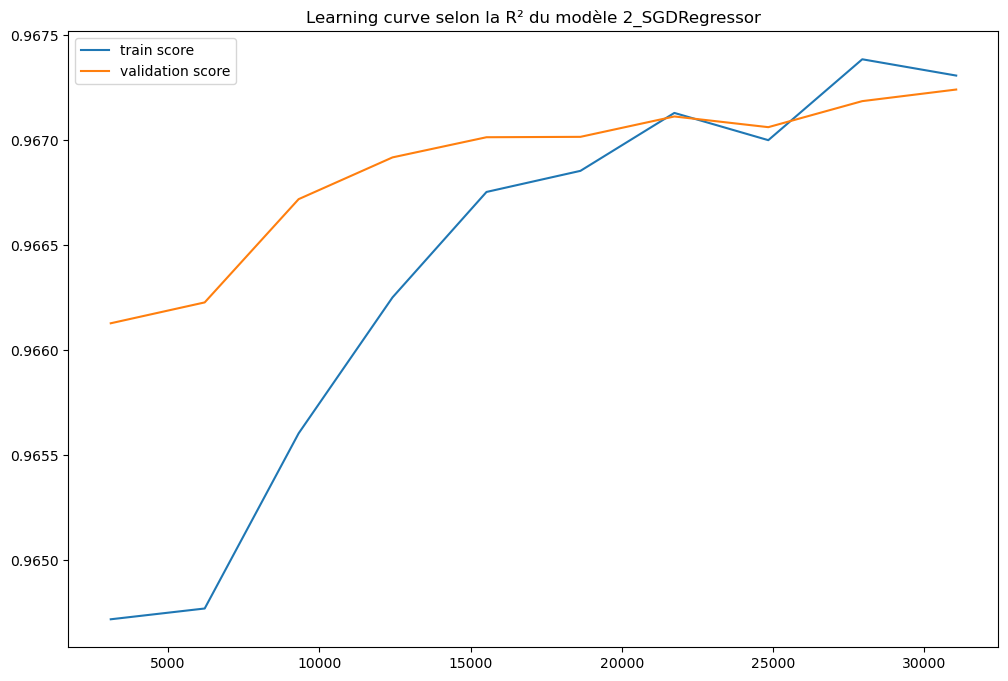

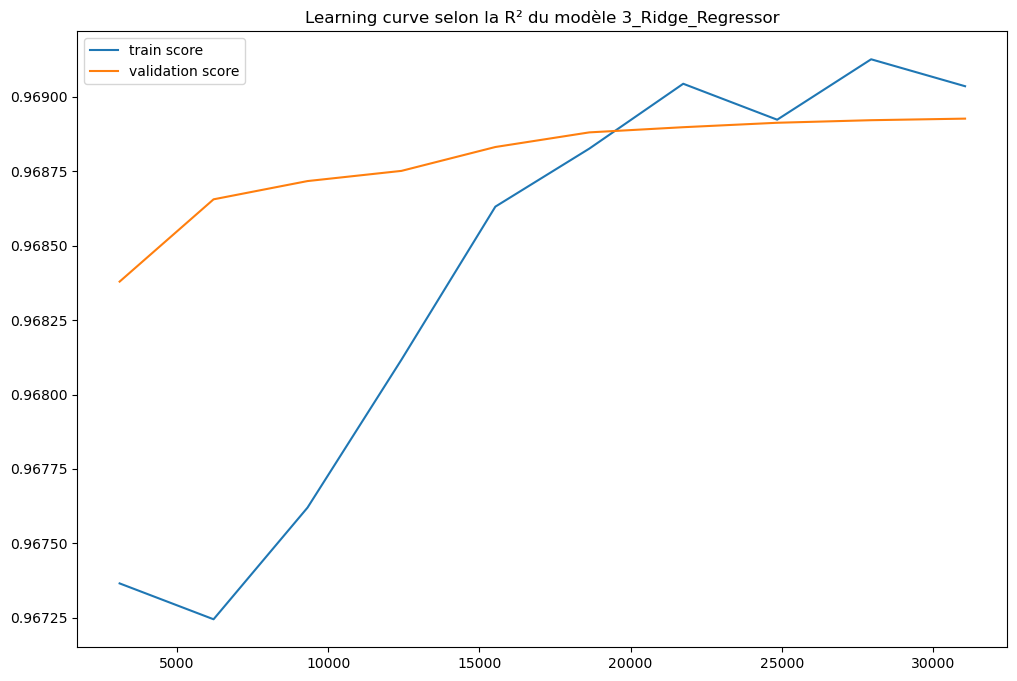

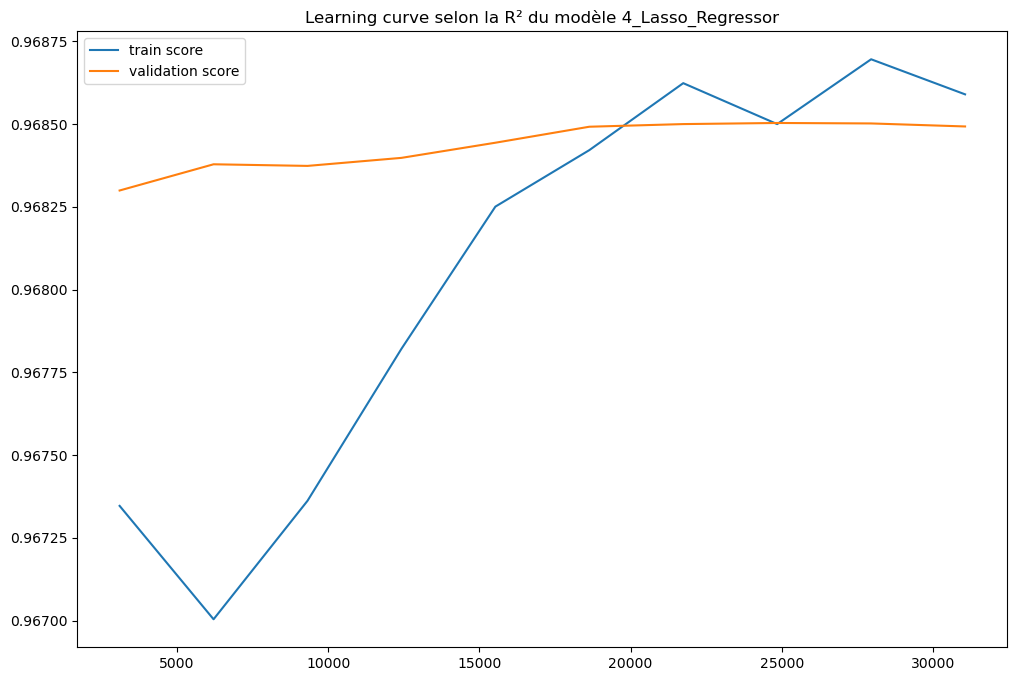

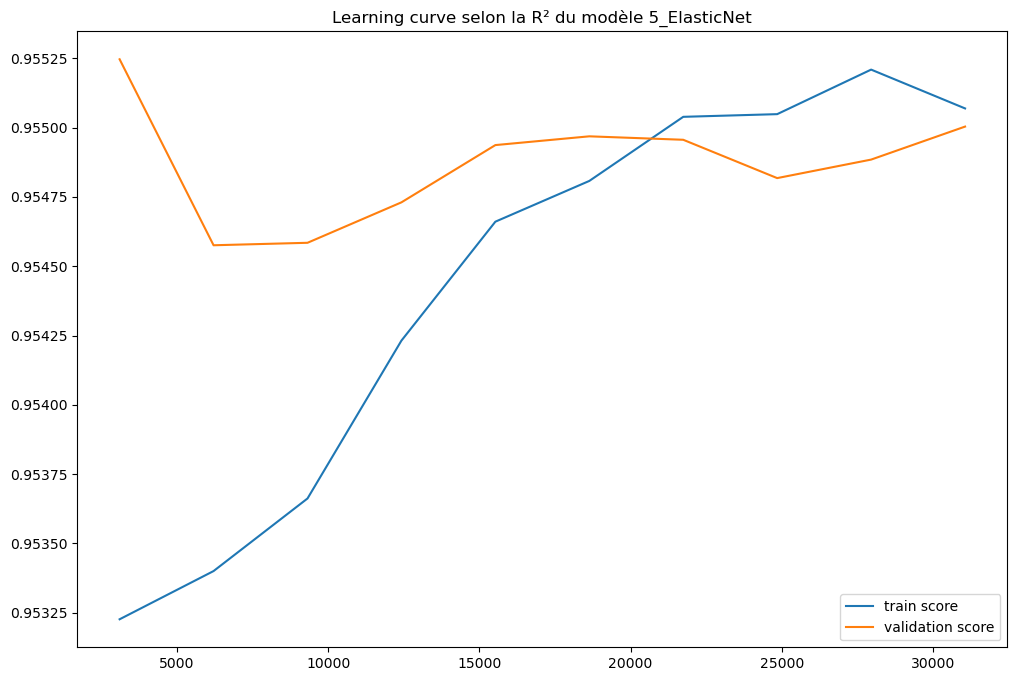

In [368]:
dict_of_models = {
    '1_LinearRegression' : lin_reg,
    '2_SGDRegressor' : sgdregressor,
    '3_Ridge_Regressor' : ridge,
    '4_Lasso_Regressor' : lasso,
    '5_ElasticNet' : elasticnet
}

for name, model in dict_of_models.items():
    print(name)
    evaluation(model, X_train, y_train, X_test, y_test)
    N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                              cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1, 10))

    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.title(f'Learning curve selon la R² du modèle {name}')
    plt.legend()

#### 3.4. Le modèle que je vais optimiser est le SDGRregressor

In [365]:
grid

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('polynomialfeatures',
                                                         PolynomialFeatures(include_bias=False)),
                                                        ('standardscaler',
                                                         StandardScaler())])),
                                       ('sgdregressor',
                                        SGDRegressor(alpha=0.01, eta0=0.001,
                                                     max_iter=2000,
                                                     penalty=None,
                                                     random_state=42))]),
             param_grid={'pipeline__polynomialfeatures__degree': [2, 3, 4],
                         'pipeline__polynomialfeatures__include_bias': [True,
                                                                        False]},
             scoring='neg_mean_squared_error')

In [437]:
from sklearn.model_selection import GridSearchCV

sgdregressor = make_pipeline(preprocessor, SGDRegressor( random_state=42))
param_grid = {
    'sgdregressor__penalty' : [None, 'l1', 'l2'],
    'sgdregressor__alpha' : [0.01, 0.1, 0.8, 1],
    'sgdregressor__max_iter' : [1000, 2000],
    'sgdregressor__fit_intercept' : [True, False],
    'sgdregressor__eta0' : [0.001, 0.01, 0.1]
    
}

grid = GridSearchCV(sgdregressor, param_grid, scoring = 'neg_mean_squared_error', cv=4)

grid.fit(X_train, y_train)
print(grid.best_params_)

{'sgdregressor__alpha': 0.01, 'sgdregressor__eta0': 0.01, 'sgdregressor__fit_intercept': True, 'sgdregressor__max_iter': 1000, 'sgdregressor__penalty': 'l1'}


In [438]:
y_pred = grid.best_estimator_.predict(X_test)
print(r2_score(y_test, y_pred ))

0.9689724191409987


In [439]:
model = grid.best_estimator_

In [440]:
model.score(X_test, y_test)

0.9689724191409987

In [441]:
y_train_pred = model.predict(X_train)

In [443]:
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

In [444]:
mape_test = mean_absolute_percentage_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred)

In [445]:
df_metrics = pd.DataFrame({
    'Métrique': ['R2', 'MSE', 'RMSE', 'MAPE'],
    'Train': [r2_train, mse_train, rmse_train, mape_train],
    'Test': [r2_test, mse_test, rmse_test, mape_test]
})

print(df_metrics)

  Métrique          Train           Test
0       R2       0.968209       0.968972
1      MSE  299105.939569  292710.788075
2     RMSE     546.905787     541.027530
3     MAPE       0.173367       0.173272


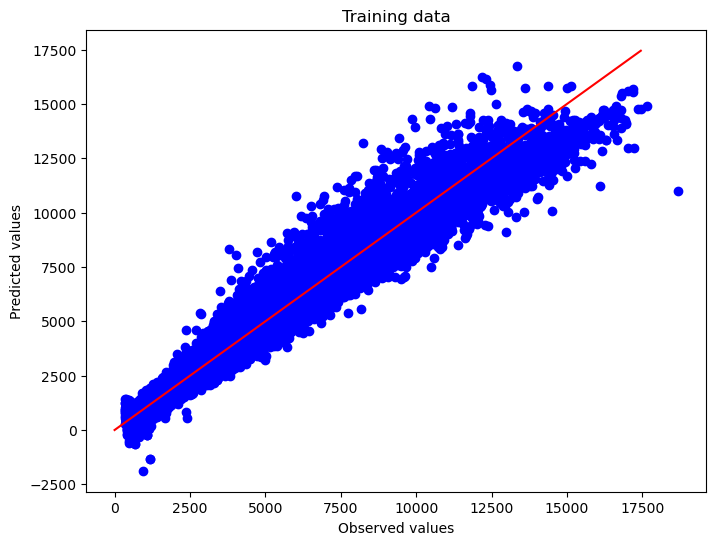

In [447]:
# Tracer les valeurs observées en fonction des valeurs prédites sur les données d'entraînement
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue')
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.title('Training data')
plt.plot(np.arange(0, 17500, 50), np.arange(0, 17500, 50), color='red')
plt.show()

**Vérification des hypothèses**

1. LINEARITE ENTRE FEATURES/TAGUET

Les courbes tracées plus haut ont montré une linéarité pour les variables sauf depht et table

2. HOMOSCEDASTICITE

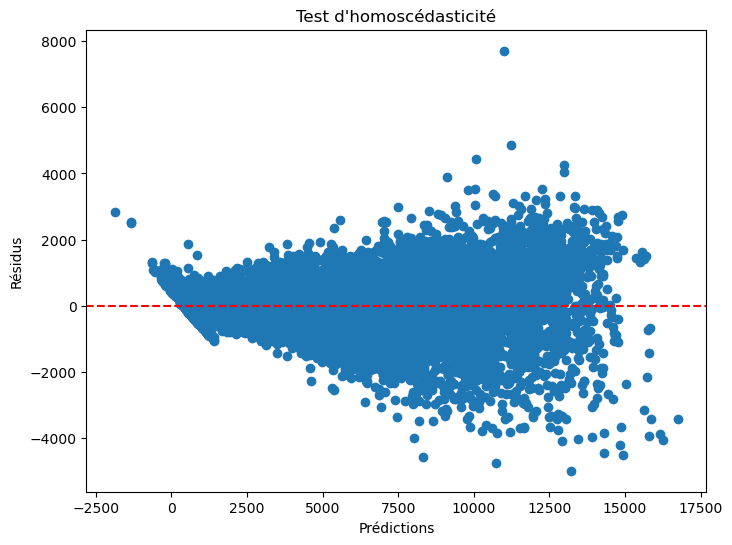

In [448]:
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
residuals = y_train - y_train_pred

plt.figure(figsize=(8,6))
plt.scatter(y_train_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Test d\'homoscédasticité')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.show()

2. LA MULTICOLINEARITE

In [449]:
# Test de multicollinéarité
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
print(vif)

    VIF Factor features
0   154.206172    carat
1    18.115862      cut
2     9.007221    color
3     8.807845  clarity
4   669.791707    depth
5   643.402342    table
6  1091.503068        x


Il va falloir retirer les variable dont le vif est supérieur à 10 et refaire le modèle car il n'est plus interprétable

3. LA NORMALITE

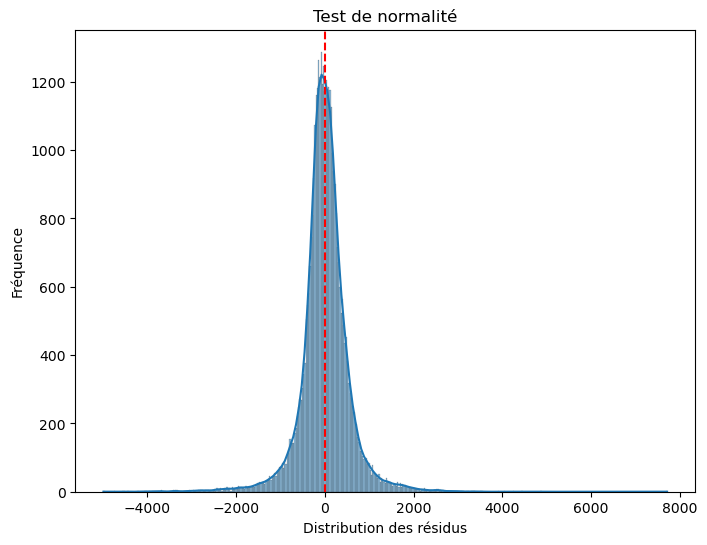

In [450]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.axvline(x=0, color='red', linestyle='dashed')
plt.title('Test de normalité')
plt.xlabel('Distribution des résidus')
plt.ylabel('Fréquence')
plt.show()

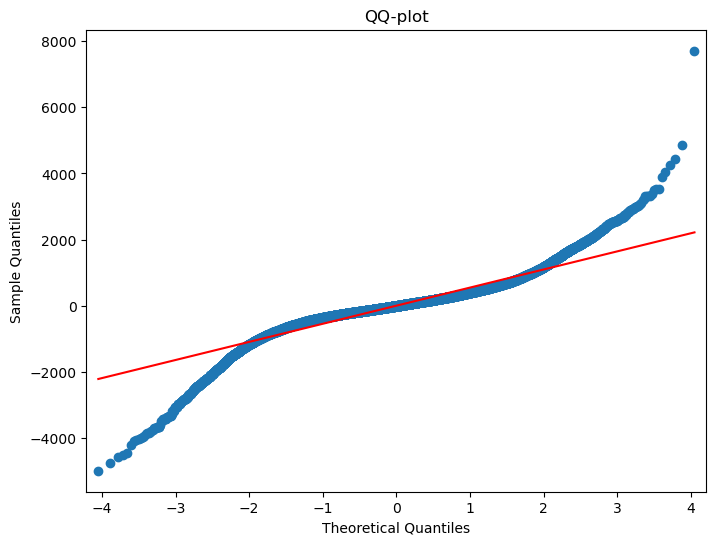

In [451]:
# QQ-plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(residuals, line='s', ax=ax)
ax.set_title('QQ-plot')
plt.show()

5. MOYENNE DES ERREURS

In [453]:
residuals.mean()

6.477580188991618

In [452]:
X_train

carat cut color clarity  depth  table     x
11251   1.21   5     1       4   59.6   57.0  6.98
6964    1.01   2     3       2   64.8   58.0  6.24
22736   1.15   5     5       6   62.7   57.0  6.69
14343   1.22   5     2       3   60.2   57.0  6.99
41178   0.40   4     4       7   61.7   58.0  4.71
...      ...  ..   ...     ...    ...    ...   ...
11886   1.00   3     6       3   63.3   57.0  6.28
49937   0.70   5     2       3   62.6   56.0  5.66
43063   0.45   5     4       8   62.0   53.0  4.94
958     0.80   2     5       3   63.8   59.0  5.87
16640   1.20   2     6       3   59.9   64.0  6.84

[38822 rows x 7 columns]

#### 3.4. Le modèle que je vais optimiser est le modèle de régression linéaire

In [428]:
from sklearn.model_selection import GridSearchCV

lin_reg = make_pipeline(preprocessor, LinearRegression())

param_grid = {
    'pipeline__polynomialfeatures__degree': [2, 3, 4], 
    'pipeline__polynomialfeatures__include_bias' : [True, False]
}

grid = GridSearchCV(lin_reg, param_grid, scoring = 'r2', cv=4)

grid.fit(X_train, y_train)
print(grid.best_params_)


{'pipeline__polynomialfeatures__degree': 4, 'pipeline__polynomialfeatures__include_bias': True}


In [429]:
y_pred = grid.best_estimator_.predict(X_test)
print(r2_score(y_test, y_pred ))

0.9797428829929266


In [430]:
model = grid.best_estimator_

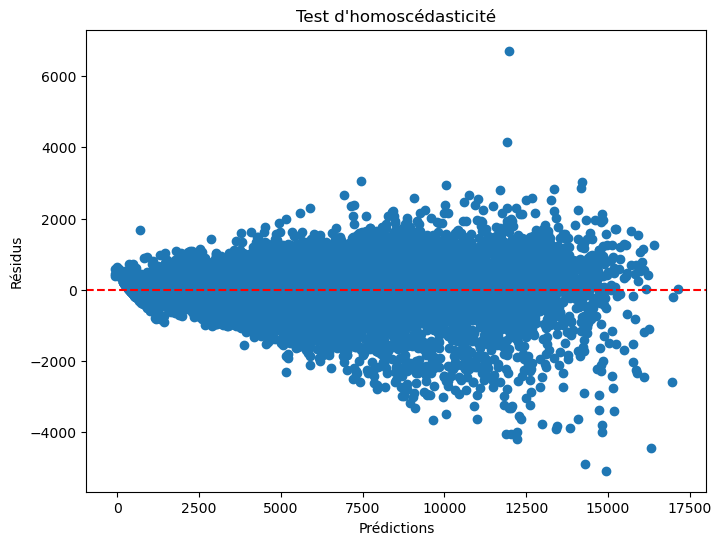

In [431]:
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
residuals = y_train - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Test d\'homoscédasticité')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.show()

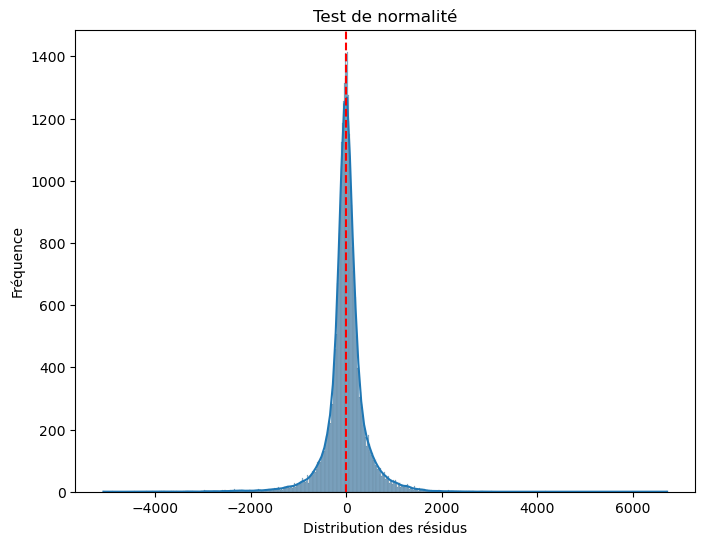

In [432]:
# Test de normalité

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.axvline(x=0, color='red', linestyle='dashed')
plt.title('Test de normalité')
plt.xlabel('Distribution des résidus')
plt.ylabel('Fréquence')
plt.show()

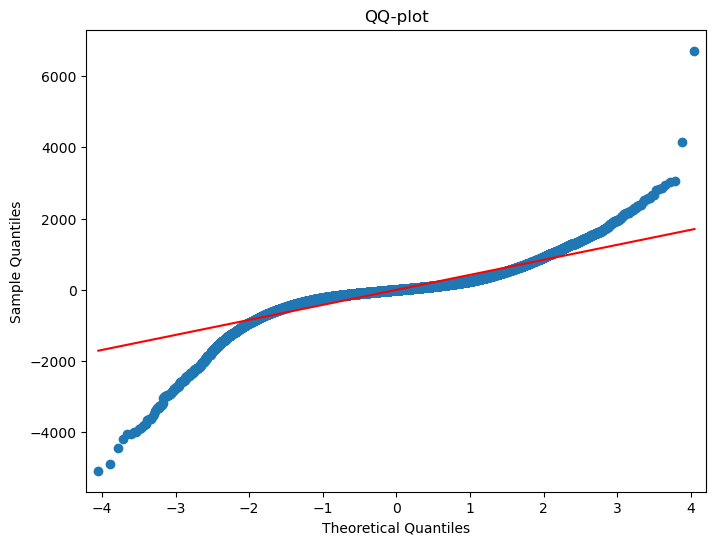

In [433]:
# QQ-plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(residuals, line='s', ax=ax)
ax.set_title('QQ-plot')
plt.show()

**Moyenne des termes d'erreurs**

In [436]:
residuals.mean()

-3.657591792561389e-09

In [387]:
#model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False),LinearRegression())

result = evaluation(model, X_train, y_train, X_test, y_test)
result

Erreur absolue moyenne (MAPE): 0.09412213188057873
Erreur quadratique moyenne (MSE): 191103.41570669514
Erreur quadratique moyenne (RMSE): 437.1537666619094
Coefficient de détermination (R²): 0.9797428829929266


carat cut color clarity  depth  table     x  Valeur observée  \
0      1.02   4     3       4   61.2   58.0  6.50             5312   
1      0.32   5     7       4   61.0   57.0  4.46              972   
2      1.00   4     6       2   60.4   60.0  6.49             4648   
3      0.25   3     5       5   59.7   57.0  4.13              436   
4      0.71   1     2       4   64.7   60.0  5.54             2208   
...     ...  ..   ...     ...    ...    ...   ...              ...   
9701   0.40   4     7       3   61.7   58.0  4.70              772   
9702   0.70   3     5       4   61.6   58.0  5.70             2362   
9703   0.30   4     7       3   62.4   60.0  4.23              552   
9704   0.45   5     5       3   60.8   56.0  4.97              930   
9705   0.31   4     5       4   61.5   56.0  4.41              802   

      Valeur prédite  
0        5036.505597  
1         898.471181  
2        4100.865038  
3         433.806715  
4        1958.145090  
...              ...  
9701      923.242028  
9702     2705.348890  
9703      593.894612  
9704     1052.090875  
9705      743.844286  

[9706 rows x 9 columns]

In [388]:
y = result['Valeur prédite']
y[y<0].value_counts().sum()

3

Le meilleur modèle que j'ai trouvé est le modèle **LINEAR REGRESSION** avec les paramètres suivants :

    - feature scaling : avec standardscaler
    - polynomial feature : avec la création d'un polynôme de dégré **4** pour mieux s'adapter aux données
    - suppression des outliers avec isolation forest
    - feature selection avec Lasso qui m'a donné les variables : 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x'
Cela me permet d'atteindre une performance sur le score **R²** de **98%**

## OBJECTIF ATTEINT

In [411]:
df = diamond.copy()

In [412]:
trainset, testset = train_test_split(df, test_size = 0.2, random_state=0)
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

In [413]:
result = evaluation(model, X_train, y_train, X_test, y_test)
result

Erreur absolue moyenne (MAPE): 0.17600204218140553
Erreur quadratique moyenne (MSE): 334164510.5343888
Erreur quadratique moyenne (RMSE): 18280.16713639098
Coefficient de détermination (R²): -20.08069954089228


carat cut color clarity  depth  table     x     y     z  \
0       1.10   5     3       2   62.0   55.0  6.61  6.65  4.11   
1       1.29   5     3       3   62.6   56.0  6.96  6.93  4.35   
2       1.20   4     2       3   61.1   58.0  6.88  6.80  4.18   
3       1.50   5     5       3   60.9   56.0  7.43  7.36  4.50   
4       0.90   3     5       4   61.7   57.0  6.17  6.21  3.82   
...      ...  ..   ...     ...    ...    ...   ...   ...   ...   
10783   0.52   2     3       4   63.6   57.0  5.05  5.10  3.23   
10784   0.91   3     4       2   60.4   61.0  6.21  6.28  3.77   
10785   1.08   3     5       2   63.4   55.0  6.53  6.50  4.13   
10786   1.02   5     4       7   61.5   57.0  6.44  6.47  3.97   
10787   0.50   2     6       6   64.8   58.0  4.97  5.00  3.23   

       Valeur observée  Valeur prédite  
0                 4733     4816.005486  
1                 6424     7108.765827  
2                 5510     5254.199044  
3                 8770    10992.925768  
4                 4493     4757.249722  
...                ...             ...  
10783             1289     1216.888920  
10784             3435     3358.228978  
10785             3847     4544.648374  
10786             8168     8024.276014  
10787             1917     1504.023668  

[10788 rows x 11 columns]

In [414]:
y = result['Valeur prédite']
y[y<0].value_counts()

Valeur prédite
-153.555927       1
-67798.456968     1
-438034.746119    1
-134623.566327    1
-11117.311375     1
-242.440294       1
-423141.270046    1
-13.606049        1
-75.517048        1
-122.991544       1
-1977.653468      1
-57319.198026     1
-14212.697872     1
-577.026924       1
Name: count, dtype: int64

In [415]:
yy = result['Valeur observée']
yy[y<0].value_counts()

Valeur observée
490      1
13387    1
15562    1
4032     1
17329    1
688      1
2180     1
421      1
630      1
646      1
474      1
7083     1
18574    1
549      1
Name: count, dtype: int64

In [422]:
y[yy==13387].value_counts()

Valeur prédite
-67798.456968    1
 14886.961600    1
Name: count, dtype: int64

In [398]:
#df_clean_iso_1 = df_iso[df_iso['Outlier'] == 1].drop(columns=['Outlier'])
trainset, testset = train_test_split(df_clean_iso, test_size = 0.2, random_state=32)

X_train = trainset.drop('price', axis=1)
y_train = trainset['price']

#X_train, y_train
X_test = testset.drop('price', axis=1)
y_test = testset['price']

#X_test, y_test

In [404]:
result = evaluation(model, X_train, y_train, X_test, y_test)
result

Erreur absolue moyenne (MAPE): 0.285680222473583
Erreur quadratique moyenne (MSE): 1300218825.7580504
Erreur quadratique moyenne (RMSE): 36058.547194223596
Coefficient de détermination (R²): -138.90276107462037


carat cut color clarity  depth  table     x     y     z  \
0      0.50   2     7       5   64.3   54.0  5.02  5.06  3.24   
1      0.32   2     6       3   63.1   54.0  4.37  4.41  2.77   
2      0.34   5     6       5   61.2   57.0  4.45  4.51  2.74   
3      0.31   4     6       5   61.1   58.0  4.37  4.34  2.66   
4      1.02   3     3       2   62.6   57.0  6.42  6.46  4.03   
...     ...  ..   ...     ...    ...    ...   ...   ...   ...   
9701   0.34   5     5       6   61.3   56.0  4.52  4.56  2.78   
9702   0.31   5     7       7   60.4   56.0  4.38  4.43  2.66   
9703   0.51   2     6       4   63.8   57.0  5.07  5.05  3.23   
9704   0.73   5     5       5   61.4   55.0  5.81  5.84  3.57   
9705   0.46   4     5       5   60.5   58.0  4.97  5.02  3.02   

      Valeur observée  Valeur prédite  
0                1795     1523.781247  
1                 524      472.839226  
2                 805      750.524173  
3                 942      846.767975  
4                4341     4022.289069  
...               ...             ...  
9701              848      927.489294  
9702              984      982.853466  
9703             1662     1346.049629  
9704             3493     3777.113710  
9705             1367     1305.225400  

[9706 rows x 11 columns]

In [405]:
result.describe()

carat        depth        table            x            y  \
count  9706.000000  9706.000000  9706.000000  9706.000000  9706.000000   
mean      0.723215    61.742932    57.309036     5.593519     5.596883   
std       0.368554     1.187455     2.065770     0.968419     0.962178   
min       0.230000    56.600000    44.000000     3.920000     3.880000   
25%       0.400000    61.100000    56.000000     4.702500     4.710000   
50%       0.700000    61.800000    57.000000     5.620000     5.610000   
75%       1.010000    62.500000    59.000000     6.430000     6.430000   
max       2.000000    66.200000    70.000000     8.070000     8.010000   

                 z  Valeur observée  Valeur prédite  
count  9706.000000      9706.000000    9.706000e+03  
mean      3.454330      3300.420152    3.030711e+03  
std       0.597006      3048.719410    3.619232e+04  
min       2.420000       365.000000   -3.433499e+06  
25%       2.900000       931.000000    9.583448e+02  
50%       3.450000      2215.500000    2.198362e+03  
75%       3.980000      4739.750000    4.803144e+03  
max       5.060000     18691.000000    9.054432e+05

In [406]:
y = result['Valeur prédite']
y[y<0].value_counts()

Valeur prédite
-2.954158e+03    1
-8.263489e+02    1
-8.207815e+01    1
-1.004069e+04    1
-3.433499e+06    1
-7.320596e+01    1
-4.858147e+03    1
Name: count, dtype: int64

In [407]:
yy = result['Valeur observée']
yy[y<0].value_counts()

Valeur observée
1739    1
474     1
495     1
2396    1
2180    1
497     1
3293    1
Name: count, dtype: int64

In [410]:
y[yy==1739].value_counts()

Valeur prédite
-2954.158476    1
Name: count, dtype: int64